# Repeating Data Wrangling with more metrics and add new features
* Adding 2017-2019 for 4 REGIONS of the us (NE, Mid_atlantic, SE, Mid_West)
* want to look at least 300 or more counties
* want to combine more datasets
* ask do we want to look at specific pollutant

Repeat Data_Wrangling process on all EAST_MID_WEST counties

# Data wrangling: pollution in one state
Plan to explore a single state and then venture out to work on regions
# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib

from IPython.core.display import display

# pd.set_option('max_columns', None)
# pd.reset_optio('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

# Load data and constants

In [2]:
MA, CT, ME, NY, NH, NJ, PA, VT, DE, MD  = [25, 9, 23, 36, 33, 34, 42, 50, 10 , 24]
NORTH_EAST = [MA, CT, ME, NY, NH, NJ, PA, VT, DE, MD]
RI, FL,GA, NC, SC = [44, 12, 13, 37, 45] # midatlantic
AL, KY, MS, TN, WV = [1, 21, 29, 47, 45] # south east
IL, IN, IA, KS, MI,MN = [17, 18, 19, 20, 26, 27] # mid_west
daily_aqi_by_county_2017 = pd.read_csv('../../data/raw/daily_aqi_by_county_2017.csv')
daily_aqi_by_county_2018 = pd.read_csv('../../data/raw/daily_aqi_by_county_2018.csv')
daily_aqi_by_county_2019 = pd.read_csv('../../data/raw/daily_aqi_by_county_2019.csv')

county_demographic = pd.read_csv('../../data/raw/county_cc-est2019-alldata.csv', encoding='latin-1')


def remove_col(df, col_name):
    '''Returns a dataframe with removed column or columns from old dataframe'''
    new_df = df.copy()

    if(type(col_name) != str and len(col_name) > 1):
        for index in col_name:
            new_df = new_df.drop(str(index), axis=1)
    else:
        new_df = new_df.drop(str(col_name), axis=1)
    return new_df


* 810 counties in the US
* Working with 4 regions of US we should have 396 counties to work with
* also looking at 3 yr span data we will have around 1000 receords which is a good size

In [3]:
print(daily_aqi_by_county_2019.columns)

daily_aqi_by_county_2017_2019 = pd.concat([daily_aqi_by_county_2017, daily_aqi_by_county_2018, daily_aqi_by_county_2019], axis=0)

def get_EAST_MID_WEST_States(df, col):
    '''Method used to return North Eastern US states'''
    EAST_MID_WEST_States = (df[col] == MA) | \
                (df[col] == CT) | \
                (df[col] == ME) | \
                (df[col] == NY) | \
                (df[col] == NH) | \
                (df[col] == NJ) | \
                (df[col] == PA) | \
                (df[col] == VT) | \
                (df[col] == DE) | \
                (df[col] == MD) | \
                (df[col] == RI) | \
                (df[col] == FL) | \
                (df[col] == GA) | \
                (df[col] == NC) | \
                (df[col] == SC) | \
                (df[col] == AL) | \
                (df[col] == KY) | \
                (df[col] == MS) | \
                (df[col] == TN) | \
                (df[col] == WV) | \
                (df[col] == IL) | \
                (df[col] == IN) | \
                (df[col] == IA) | \
                (df[col] == KS) | \
                (df[col] == MI) | \
                (df[col] == MN)
    return EAST_MID_WEST_States
EAST_MID_WEST_States_17 = get_EAST_MID_WEST_States(daily_aqi_by_county_2017, 'State Code')
EAST_MID_WEST_States_18 = get_EAST_MID_WEST_States(daily_aqi_by_county_2018, 'State Code')
EAST_MID_WEST_States_19 = get_EAST_MID_WEST_States(daily_aqi_by_county_2019, 'State Code')

EAST_MID_WEST_State_17_19 = get_EAST_MID_WEST_States(daily_aqi_by_county_2017_2019, 'State Code')

EAST_MID_WEST_aqi_2017 = daily_aqi_by_county_2017.loc[EAST_MID_WEST_States_17]
EAST_MID_WEST_aqi_2018 = daily_aqi_by_county_2018.loc[EAST_MID_WEST_States_18]
EAST_MID_WEST_aqi_2019 = daily_aqi_by_county_2019.loc[EAST_MID_WEST_States_19]

EAST_MID_WEST_aqi_2017_2019 = daily_aqi_by_county_2017_2019.loc[EAST_MID_WEST_State_17_19]
display(EAST_MID_WEST_aqi_2019)

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')


State Name county Name  State Code  County Code        Date  AQI  \
0         Alabama     Baldwin           1            3  2019-01-03   18   
1         Alabama     Baldwin           1            3  2019-01-06   35   
2         Alabama     Baldwin           1            3  2019-01-09   14   
3         Alabama     Baldwin           1            3  2019-01-12   36   
4         Alabama     Baldwin           1            3  2019-01-15   38   
...           ...         ...         ...          ...         ...  ...   
301885    Vermont     Windham          50           25  2019-12-14    0   
301886    Vermont     Windham          50           25  2019-12-17    3   
301887    Vermont     Windham          50           25  2019-12-20    5   
301888    Vermont     Windham          50           25  2019-12-23   18   
301889    Vermont     Windham          50           25  2019-12-29   10   

       Category Defining Parameter Defining Site  Number of Sites Reporting  
0          Good              PM2.5   01-003-0010                          1  
1          Good              PM2.5   01-003-0010                          1  
2          Good              PM2.5   01-003-0010                          1  
3          Good              PM2.5   01-003-0010                          1  
4          Good              PM2.5   01-003-0010                          1  
...         ...                ...           ...                        ...  
301885     Good              PM2.5   50-025-9000                          1  
301886     Good              PM2.5   50-025-9000                          1  
301887     Good              PM2.5   50-025-9000                          1  
301888     Good              PM2.5   50-025-9000                          1  
301889     Good              PM2.5   50-025-9000                          1  

[167467 rows x 10 columns]

In [4]:
len(EAST_MID_WEST_aqi_2019['county Name'].unique())
# 396 counties approximately

396

          State Code    County Code            AQI  Number of Sites Reporting
count  167237.000000  167237.000000  167237.000000              167237.000000
mean       26.360423      79.044003      38.049845                   1.766547
std        11.874502      65.618048      16.425217                   1.646691
min         1.000000       1.000000       0.000000                   1.000000
25%        18.000000      25.000000      29.000000                   1.000000
50%        25.000000      71.000000      38.000000                   1.000000
75%        36.000000     117.000000      46.000000                   2.000000
max        50.000000     510.000000     364.000000                  19.000000
          State Code    County Code            AQI  Number of Sites Reporting
count  167581.000000  167581.000000  167581.000000              167581.000000
mean       26.387508      79.106259      37.410524                   1.744291
std        11.917458      65.510524      17.583536              

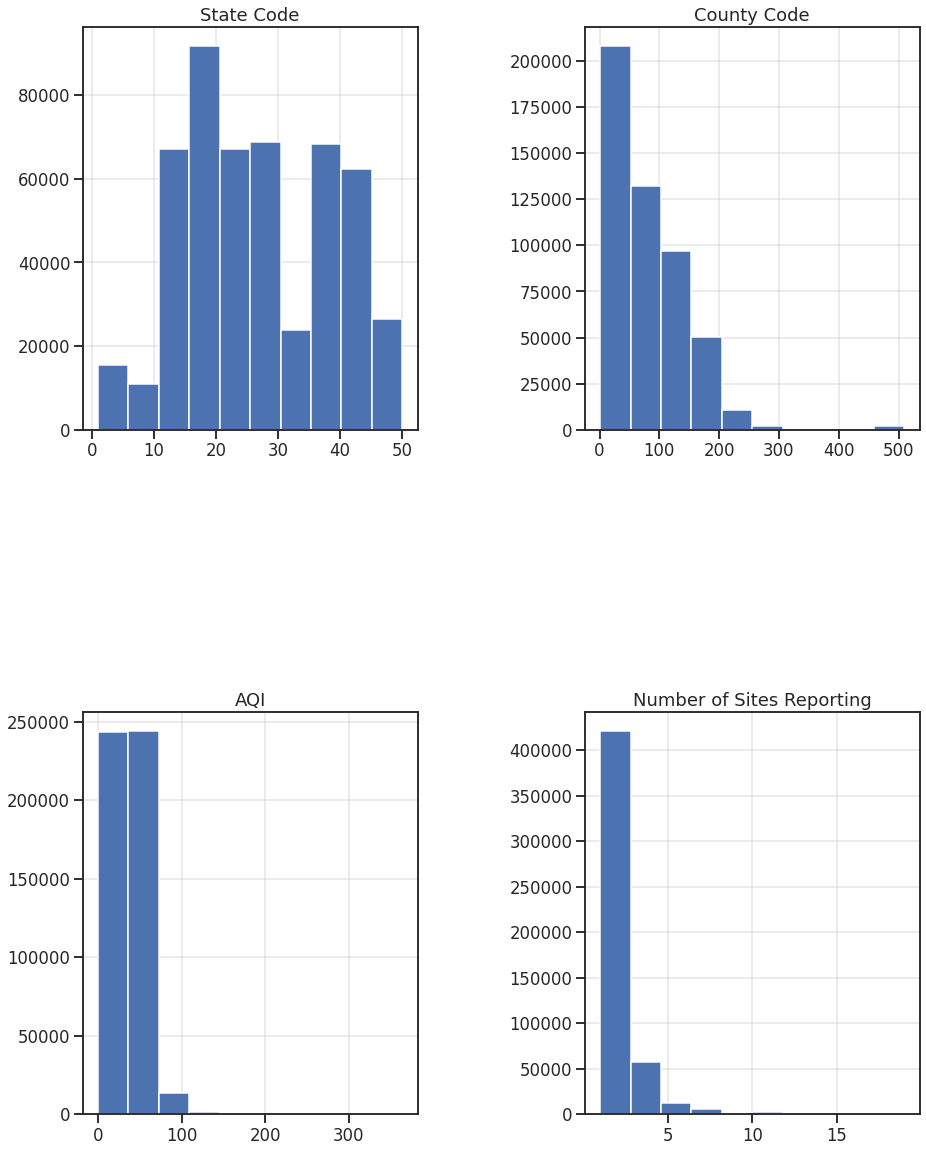

In [5]:
# klib.dist_plot(EAST_MID_WEST_aqi_2019)

print(EAST_MID_WEST_aqi_2017.describe())
print(EAST_MID_WEST_aqi_2018.describe())
print(EAST_MID_WEST_aqi_2019.describe())

print(EAST_MID_WEST_aqi_2017.isna().sum())
print(EAST_MID_WEST_aqi_2018.isna().sum())
print(EAST_MID_WEST_aqi_2019.isna().sum())

print(EAST_MID_WEST_aqi_2017_2019.isna().sum())
print(EAST_MID_WEST_aqi_2017_2019.shape)

EAST_MID_WEST_aqi_2017_2019.hist(figsize=(15,20))
plt.subplots_adjust(hspace=0.7, wspace=0.5)

* aqi of 3 years of EAST_MID_WEST seem to follow a normal distribution which is good
* number of sites reporting seem to be right skewed
* no missing values

<BarContainer object of 502285 artists>

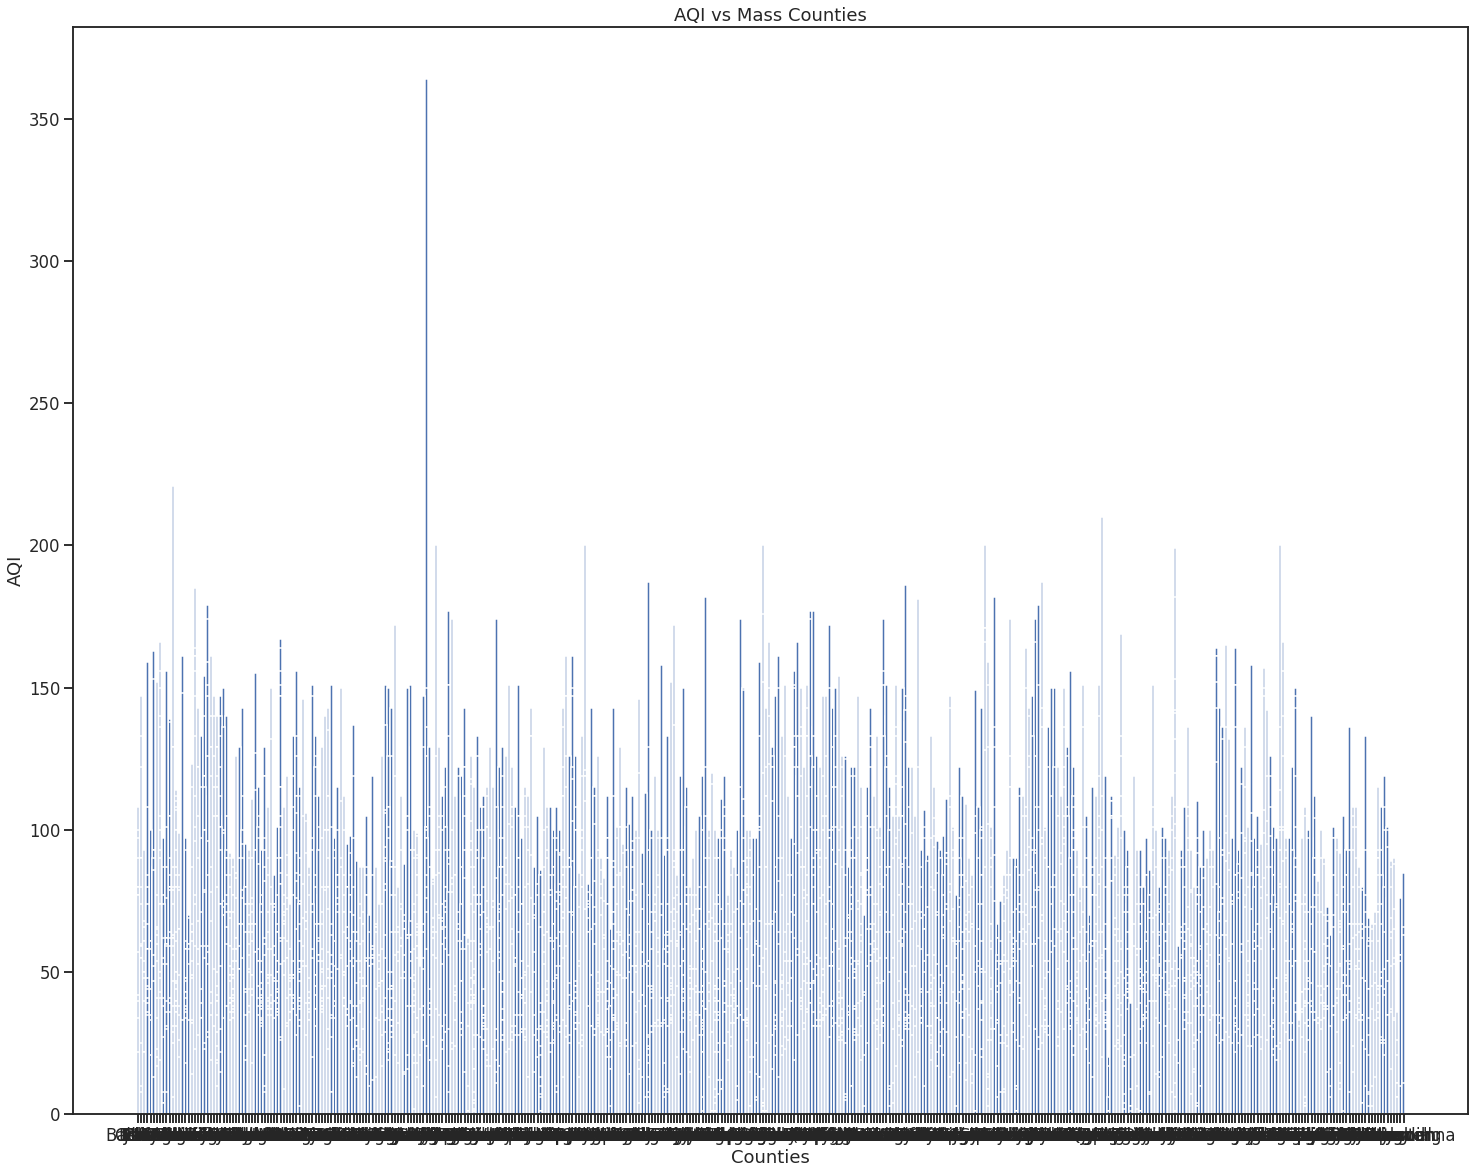

In [6]:
plt.subplots(figsize=(25,20))
plt.xlabel('Counties')
plt.ylabel('AQI')
plt.title('AQI vs Mass Counties')
plt.bar(EAST_MID_WEST_aqi_2017_2019['county Name'], EAST_MID_WEST_aqi_2017_2019['AQI'])

* Lot of row data don't run as it takes matplot long time to generate
* 502285 rows
* low outliers of values 25
* few prominent outliers with values above 200
* But there are no negative values which is good

In [7]:
above_150_aqi = EAST_MID_WEST_aqi_2017_2019.AQI > 150
above_200_aqi = EAST_MID_WEST_aqi_2017_2019.AQI > 200

display(EAST_MID_WEST_aqi_2017_2019.loc[above_150_aqi])
display(EAST_MID_WEST_aqi_2017_2019.loc[above_200_aqi])

below_10_aqi = EAST_MID_WEST_aqi_2017_2019.AQI < 10
display(EAST_MID_WEST_aqi_2017_2019.loc[below_10_aqi])
print(EAST_MID_WEST_aqi_2017_2019.shape)

State Name county Name  State Code  County Code        Date  AQI  \
1426         Alabama      Etowah           1           55  2017-06-23  163   
3251         Alabama  Montgomery           1          101  2017-06-22  221   
43441    Connecticut   Fairfield           9            1  2017-05-18  164   
43466    Connecticut   Fairfield           9            1  2017-06-12  179   
43467    Connecticut   Fairfield           9            1  2017-06-13  156   
...              ...         ...         ...          ...         ...  ...   
244369  Pennsylvania   Allegheny          42            3  2019-02-04  161   
244691  Pennsylvania   Allegheny          42            3  2019-12-23  152   
245596  Pennsylvania       Berks          42           11  2019-06-16  165   
248788  Pennsylvania     Dauphin          42           43  2019-04-23  158   
251938  Pennsylvania   Lancaster          42           71  2019-02-02  157   

              Category Defining Parameter Defining Site  \
1426         Unhealthy              PM2.5   01-055-0010   
3251    Very Unhealthy              PM2.5   01-101-1002   
43441        Unhealthy              Ozone   09-001-3007   
43466        Unhealthy              Ozone   09-001-9003   
43467        Unhealthy              Ozone   09-001-3007   
...                ...                ...           ...   
244369       Unhealthy              PM2.5   42-003-0064   
244691       Unhealthy              PM2.5   42-003-0064   
245596       Unhealthy              PM2.5   42-011-0011   
248788       Unhealthy              PM2.5   42-043-0401   
251938       Unhealthy              PM2.5   42-071-0012   

        Number of Sites Reporting  
1426                            2  
3251                            1  
43441                           5  
43466                           5  
43467                           5  
...                           ...  
244369                         10  
244691                         13  
245596                          1  
248788                          2  
251938                          2  

[294 rows x 10 columns]

State Name county Name  State Code  County Code        Date  AQI  \
3251      Alabama  Montgomery           1          101  2017-06-22  221   
69100     Georgia    Richmond          13          245  2017-01-25  364   
198506   New York    Rockland          36           87  2018-07-02  210   

              Category Defining Parameter Defining Site  \
3251    Very Unhealthy              PM2.5   01-101-1002   
69100        Hazardous               PM10   13-245-0091   
198506  Very Unhealthy              Ozone   36-087-0005   

        Number of Sites Reporting  
3251                            1  
69100                           1  
198506                          1

State Name county Name  State Code  County Code        Date  AQI  \
299       Alabama        Clay           1           27  2017-04-07    9   
1533      Alabama      Etowah           1           55  2017-10-08    0   
2262      Alabama    Lawrence           1           79  2017-01-01    8   
2271      Alabama    Lawrence           1           79  2017-01-28    8   
2294      Alabama    Lawrence           1           79  2017-04-07    9   
...           ...         ...         ...          ...         ...  ...   
301883    Vermont     Windham          50           25  2019-12-08    5   
301884    Vermont     Windham          50           25  2019-12-11    6   
301885    Vermont     Windham          50           25  2019-12-14    0   
301886    Vermont     Windham          50           25  2019-12-17    3   
301887    Vermont     Windham          50           25  2019-12-20    5   

       Category Defining Parameter Defining Site  Number of Sites Reporting  
299        Good              PM2.5   01-027-0001                          1  
1533       Good              PM2.5   01-055-0010                          1  
2262       Good              PM2.5   01-079-0002                          1  
2271       Good              PM2.5   01-079-0002                          1  
2294       Good              PM2.5   01-079-0002                          1  
...         ...                ...           ...                        ...  
301883     Good              PM2.5   50-025-9000                          1  
301884     Good              PM2.5   50-025-9000                          1  
301885     Good              PM2.5   50-025-9000                          1  
301886     Good              PM2.5   50-025-9000                          1  
301887     Good              PM2.5   50-025-9000                          1  

[25472 rows x 10 columns]

(502285, 10)


* 3 records of aqi exceeding 200 with one of them being 364 which is hazardous
* 25000 records of aqi below 10
* Appear to have some counties with very low aqi


In [8]:
# bar plot of average aqi by county

mean_EAST_MID_WEST_AQI_2017 = EAST_MID_WEST_aqi_2017.groupby('county Name')[['AQI']].mean()
mean_EAST_MID_WEST_AQI_2018 = EAST_MID_WEST_aqi_2018.groupby('county Name')[['AQI']].mean()
mean_EAST_MID_WEST_AQI_2019 = EAST_MID_WEST_aqi_2019.groupby('county Name')[['AQI']].mean()

print(mean_EAST_MID_WEST_AQI_2017.shape)
print(mean_EAST_MID_WEST_AQI_2018.shape)
print(mean_EAST_MID_WEST_AQI_2019.shape)

mean_EAST_MID_WEST_AQI_2017_2019 = pd.concat([mean_EAST_MID_WEST_AQI_2017, mean_EAST_MID_WEST_AQI_2018, mean_EAST_MID_WEST_AQI_2019], axis=0)
print(mean_EAST_MID_WEST_AQI_2017_2019.shape)

(397, 1)
(395, 1)
(396, 1)
(1188, 1)


* rather than doing mean of aqi for year 2017-2019 I should be do means of 2017, 2018, 2019 individually
* afterwards I should add them to the row data


<BarContainer object of 1188 artists>

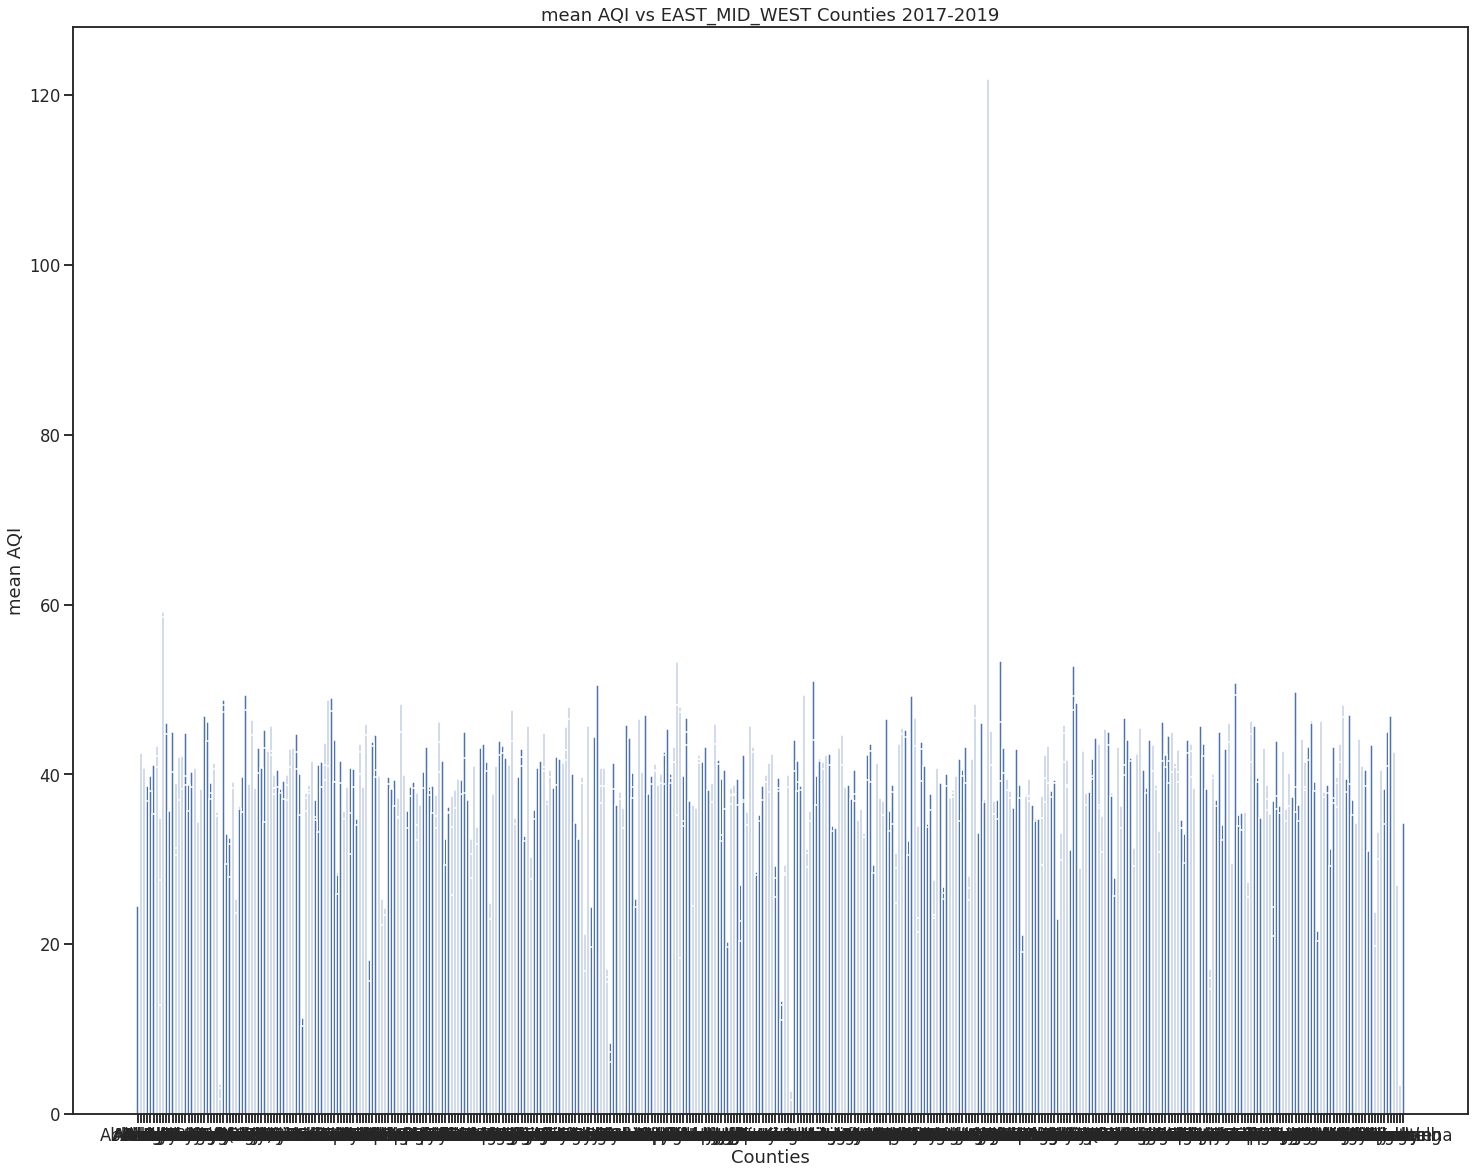

In [9]:
plt.subplots(figsize=(25,20))
plt.xlabel('Counties')
plt.ylabel('mean AQI')
plt.title('mean AQI vs EAST_MID_WEST Counties 2017-2019')
plt.bar(mean_EAST_MID_WEST_AQI_2017_2019.index, mean_EAST_MID_WEST_AQI_2017_2019['AQI'])


* When averaging, we get a remainder of 389 row data as we put county data of 2017, 2018, 2019 individually rather
than the mean of that span of time
* seems that although we added more counties, our number of row data does not increase when average it out

In [10]:
above_40_aqi = mean_EAST_MID_WEST_AQI_2017_2019.AQI > 40
display(mean_EAST_MID_WEST_AQI_2017_2019.loc[above_40_aqi])
below_10_aqi = mean_EAST_MID_WEST_AQI_2017_2019.AQI < 10
display(mean_EAST_MID_WEST_AQI_2017_2019.loc[below_10_aqi])

AQI
county Name           
Adams        42.487685
Allegan      43.387900
Allegheny    59.145205
Allen        43.339726
Andrew       42.905350
...                ...
Winnebago    43.431085
Worcester    40.482192
Wyandotte    41.005479
Yancey       46.877049
York         42.680541

[433 rows x 1 columns]

AQI
county Name          
Beaufort     3.583562
Gibson       8.374656
La Salle     2.772603
New Madrid   3.318560
Seneca       0.277937
Beaufort     3.103679
Brunswick    8.726444
Gibson       7.347107
La Salle     2.743094
Seneca       0.203297
Tazewell     1.978102
Beaufort     1.744318
Gibson       6.139276
La Salle     1.686567
Seneca       0.172222
Tazewell     3.407514

* values above 40 seem to be on the higher end
* Seneca appears to be an outlier county with near 0 average aqi throughout 2017-2019 consistently
* it is the only county with aqi below 10
* Allegheny consistently higher than average but does not appear to much of outlier


In [11]:
max = EAST_MID_WEST_aqi_2017_2019.AQI == EAST_MID_WEST_aqi_2019.AQI.max()
min = EAST_MID_WEST_aqi_2017_2019.AQI == EAST_MID_WEST_aqi_2019.AQI.min()
display(EAST_MID_WEST_aqi_2017_2019.loc[max | min])

# check what are the defining parameters
EAST_MID_WEST_aqi_2017_2019['Defining Parameter'].unique()
display(EAST_MID_WEST_aqi_2017_2019.loc[EAST_MID_WEST_aqi_2017_2019['county Name'] == 'Seneca'])

State Name county Name  State Code  County Code        Date  AQI  \
1533      Alabama      Etowah           1           55  2017-10-08    0   
2760      Alabama      Mobile           1           97  2017-02-11    0   
3039      Alabama      Mobile           1           97  2017-11-19    0   
3058      Alabama      Mobile           1           97  2017-12-08    0   
3429      Alabama      Morgan           1          103  2017-01-02    0   
...           ...         ...         ...          ...         ...  ...   
275620  Tennessee      McMinn          47          107  2019-11-12    0   
275640  Tennessee      McMinn          47          107  2019-12-02    0   
275655  Tennessee      McMinn          47          107  2019-12-17    0   
275668  Tennessee      McMinn          47          107  2019-12-30    0   
301885    Vermont     Windham          50           25  2019-12-14    0   

       Category Defining Parameter Defining Site  Number of Sites Reporting  
1533       Good              PM2.5   01-055-0010                          1  
2760       Good                SO2   01-097-0003                          1  
3039       Good                SO2   01-097-0003                          1  
3058       Good                SO2   01-097-0003                          1  
3429       Good              PM2.5   01-103-0011                          1  
...         ...                ...           ...                        ...  
275620     Good              PM2.5   47-107-1002                          1  
275640     Good              PM2.5   47-107-1002                          1  
275655     Good              PM2.5   47-107-1002                          1  
275668     Good              PM2.5   47-107-1002                          1  
301885     Good              PM2.5   50-025-9000                          1  

[8140 rows x 10 columns]

State Name county Name  State Code  County Code        Date  AQI  \
197579   New York      Seneca          36           99  2017-01-06    0   
197580   New York      Seneca          36           99  2017-01-07    0   
197581   New York      Seneca          36           99  2017-01-08    0   
197582   New York      Seneca          36           99  2017-01-12    0   
197583   New York      Seneca          36           99  2017-01-13    0   
...           ...         ...         ...          ...         ...  ...   
197414   New York      Seneca          36           99  2019-12-27    0   
197415   New York      Seneca          36           99  2019-12-28    0   
197416   New York      Seneca          36           99  2019-12-29    0   
197417   New York      Seneca          36           99  2019-12-30    0   
197418   New York      Seneca          36           99  2019-12-31    0   

       Category Defining Parameter Defining Site  Number of Sites Reporting  
197579     Good                SO2   36-099-0002                          1  
197580     Good                SO2   36-099-0002                          1  
197581     Good                SO2   36-099-0002                          1  
197582     Good                SO2   36-099-0002                          1  
197583     Good                SO2   36-099-0002                          1  
...         ...                ...           ...                        ...  
197414     Good                SO2   36-099-0002                          1  
197415     Good                SO2   36-099-0002                          1  
197416     Good                SO2   36-099-0002                          1  
197417     Good                SO2   36-099-0002                          1  
197418     Good                SO2   36-099-0002                          1  

[1073 rows x 10 columns]

* shows that even when looking year 2017-2019 data hasnt changed much; makes sense; as air quality doesnt fluctuate much over 3 yrs
* Seneca has 1073 rows around 0 aqi with defining parameter, sulfur dioxide
* Seneca has mean of 0.21 aqi
* maybe track a particular pollutant

# Wii not explore income as deem income does not influence AQI from previous wrangling


# Explore and clean demographic data set 2017-2019

In [12]:
print(county_demographic.columns)
print(county_demographic.dtypes)
# seems demographic is all numeric type which is good

print(county_demographic.shape)
# we have 80 columns

display(county_demographic.head())
print(county_demographic.SUMLEV.unique())

EAST_MID_WEST_counties = get_EAST_MID_WEST_States(county_demographic, 'STATE')
EAST_MID_WEST_dems = county_demographic.loc[EAST_MID_WEST_counties]

display(EAST_MID_WEST_dems)

Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'AGEGRP',
       'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE',
       'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE',
       'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE',
       'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE',
       'AAC_FEMALE', 'NAC_MALE', 'NAC_FEMALE', 'NH_MALE', 'NH_FEMALE',
       'NHWA_MALE', 'NHWA_FEMALE', 'NHBA_MALE', 'NHBA_FEMALE', 'NHIA_MALE',
       'NHIA_FEMALE', 'NHAA_MALE', 'NHAA_FEMALE', 'NHNA_MALE', 'NHNA_FEMALE',
       'NHTOM_MALE', 'NHTOM_FEMALE', 'NHWAC_MALE', 'NHWAC_FEMALE',
       'NHBAC_MALE', 'NHBAC_FEMALE', 'NHIAC_MALE', 'NHIAC_FEMALE',
       'NHAAC_MALE', 'NHAAC_FEMALE', 'NHNAC_MALE', 'NHNAC_FEMALE', 'H_MALE',
       'H_FEMALE', 'HWA_MALE', 'HWA_FEMALE', 'HBA_MALE', 'HBA_FEMALE',
       'HIA_MALE', 'HIA_FEMALE', 'HAA_MALE', 'HAA_FEMALE', 'HNA_MALE',
       'HNA_FEMALE', 'HTOM_MALE', 'HTOM_FEMALE

SUMLEV  STATE  COUNTY   STNAME         CTYNAME  YEAR  AGEGRP  TOT_POP  \
0      50      1       1  Alabama  Autauga County     1       0    54571   
1      50      1       1  Alabama  Autauga County     1       1     3579   
2      50      1       1  Alabama  Autauga County     1       2     3991   
3      50      1       1  Alabama  Autauga County     1       3     4290   
4      50      1       1  Alabama  Autauga County     1       4     4290   

   TOT_MALE  TOT_FEMALE  ...  HWAC_MALE  HWAC_FEMALE  HBAC_MALE  HBAC_FEMALE  \
0     26569       28002  ...        607          538         57           48   
1      1866        1713  ...         77           56          9            5   
2      2001        1990  ...         64           66          2            3   
3      2171        2119  ...         51           57         13            7   
4      2213        2077  ...         48           44          7            5   

   HIAC_MALE  HIAC_FEMALE  HAAC_MALE  HAAC_FEMALE  HNAC_MALE  HNAC_FEMALE  
0         26           32          9           11         19           10  
1          4            1          0            0          2            1  
2          2            7          2            3          2            0  
3          5            5          2            1          1            1  
4          0            2          2            1          3            1  

[5 rows x 80 columns]

SUMLEV  STATE  COUNTY   STNAME         CTYNAME  YEAR  AGEGRP  TOT_POP  \
0           50      1       1  Alabama  Autauga County     1       0    54571   
1           50      1       1  Alabama  Autauga County     1       1     3579   
2           50      1       1  Alabama  Autauga County     1       2     3991   
3           50      1       1  Alabama  Autauga County     1       3     4290   
4           50      1       1  Alabama  Autauga County     1       4     4290   
...        ...    ...     ...      ...             ...   ...     ...      ...   
642955      50     50      27  Vermont  Windsor County    12      14     4339   
642956      50     50      27  Vermont  Windsor County    12      15     3548   
642957      50     50      27  Vermont  Windsor County    12      16     2414   
642958      50     50      27  Vermont  Windsor County    12      17     1567   
642959      50     50      27  Vermont  Windsor County    12      18     1465   

        TOT_MALE  TOT_FEMALE  ...  HWAC_MALE  HWAC_FEMALE  HBAC_MALE  \
0          26569       28002  ...        607          538         57   
1           1866        1713  ...         77           56          9   
2           2001        1990  ...         64           66          2   
3           2171        2119  ...         51           57         13   
4           2213        2077  ...         48           44          7   
...          ...         ...  ...        ...          ...        ...   
642955      2124        2215  ...         15           11          0   
642956      1654        1894  ...         16            7          0   
642957      1184        1230  ...          4            0          0   
642958       704         863  ...          4            4          0   
642959       575         890  ...          3            6          0   

        HBAC_FEMALE  HIAC_MALE  HIAC_FEMALE  HAAC_MALE  HAAC_FEMALE  \
0                48         26           32          9           11   
1                 5          4            1          0            0   
2                 3          2            7          2            3   
3                 7          5            5          2            1   
4                 5          0            2          2            1   
...             ...        ...          ...        ...          ...   
642955            0          1            2          0            0   
642956            0          0            3          0            2   
642957            0          0            0          0            0   
642958            0          0            0          0            0   
642959            0          0            0          0            0   

        HNAC_MALE  HNAC_FEMALE  
0              19           10  
1               2            1  
2               2            0  
3               1            1  
4               3            1  
...           ...          ...  
642955          0            0  
642956          0            0  
642957          0            0  
642958          0            0  
642959          0            0  

[360468 rows x 80 columns]

In [13]:
# keep only years 17-19

EAST_MID_WEST_dems = EAST_MID_WEST_dems.loc[EAST_MID_WEST_dems.YEAR > 9]
# keep only totals of dem; disregard ages
EAST_MID_WEST_dems = EAST_MID_WEST_dems.loc[EAST_MID_WEST_dems.AGEGRP == 0]
EAST_MID_WEST_dems

print(EAST_MID_WEST_dems.isna().sum())

SUMLEV         0
STATE          0
COUNTY         0
STNAME         0
CTYNAME        0
              ..
HIAC_FEMALE    0
HAAC_MALE      0
HAAC_FEMALE    0
HNAC_MALE      0
HNAC_FEMALE    0
Length: 80, dtype: int64


In [14]:
print(EAST_MID_WEST_dems.shape)
ethn = EAST_MID_WEST_dems.columns.values[10:]

width = 0.35
# fig, ax = plt.subplots(figsize=(45,20))
#
# # rec1 = ax.bar(EAST_MID_WEST_dems.CTYNAME, EAST_MID_WEST_dems.loc[:,'TOT_POP'], width, label='tot pop')
# for eth in ethn:
#     ax.bar(EAST_MID_WEST_dems.CTYNAME, EAST_MID_WEST_dems[eth], width, label=eth)
#
# ax.legend(bbox_to_anchor=(1.05,1))
# plt.show()


(4743, 80)


* chart is also not as useful as too many columns to display for all the counties
* serWarning: Creating legend with loc="best" can be slow with large amounts of data.
* no need to draw this plot as it takes long for matplot to draw

## Change demographic column into ratio per the county

In [15]:
# need to build ratios and filter out duplicate ethnicities; such as the nots and in combinations or alones
EAST_MID_WEST_dems
# make 3 df yr2017, yr2018, yr2019

demographic = EAST_MID_WEST_dems.columns.values[8:]
EAST_MID_WEST_dem_ratio = EAST_MID_WEST_dems

for dem in demographic:
    EAST_MID_WEST_dem_ratio[dem + '_ratio'] = EAST_MID_WEST_dems[dem] / EAST_MID_WEST_dems['TOT_POP'] * 100
    # print(dem + ' ratio')

In [16]:
EAST_MID_WEST_dem_ratio_2017_2019 = remove_col(EAST_MID_WEST_dem_ratio, demographic)
display(EAST_MID_WEST_dem_ratio_2017_2019.columns)

EAST_MID_WEST_dem_ratio_2017_2019.head(10)

Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'AGEGRP',
       'TOT_POP', 'TOT_MALE_ratio', 'TOT_FEMALE_ratio', 'WA_MALE_ratio',
       'WA_FEMALE_ratio', 'BA_MALE_ratio', 'BA_FEMALE_ratio', 'IA_MALE_ratio',
       'IA_FEMALE_ratio', 'AA_MALE_ratio', 'AA_FEMALE_ratio', 'NA_MALE_ratio',
       'NA_FEMALE_ratio', 'TOM_MALE_ratio', 'TOM_FEMALE_ratio',
       'WAC_MALE_ratio', 'WAC_FEMALE_ratio', 'BAC_MALE_ratio',
       'BAC_FEMALE_ratio', 'IAC_MALE_ratio', 'IAC_FEMALE_ratio',
       'AAC_MALE_ratio', 'AAC_FEMALE_ratio', 'NAC_MALE_ratio',
       'NAC_FEMALE_ratio', 'NH_MALE_ratio', 'NH_FEMALE_ratio',
       'NHWA_MALE_ratio', 'NHWA_FEMALE_ratio', 'NHBA_MALE_ratio',
       'NHBA_FEMALE_ratio', 'NHIA_MALE_ratio', 'NHIA_FEMALE_ratio',
       'NHAA_MALE_ratio', 'NHAA_FEMALE_ratio', 'NHNA_MALE_ratio',
       'NHNA_FEMALE_ratio', 'NHTOM_MALE_ratio', 'NHTOM_FEMALE_ratio',
       'NHWAC_MALE_ratio', 'NHWAC_FEMALE_ratio', 'NHBAC_MALE_ratio',
       'NHBAC_FEMALE_ratio', 'NHIAC_M

SUMLEV  STATE  COUNTY   STNAME         CTYNAME  YEAR  AGEGRP  TOT_POP  \
171      50      1       1  Alabama  Autauga County    10       0    55390   
190      50      1       1  Alabama  Autauga County    11       0    55533   
209      50      1       1  Alabama  Autauga County    12       0    55869   
399      50      1       3  Alabama  Baldwin County    10       0   212521   
418      50      1       3  Alabama  Baldwin County    11       0   217855   
437      50      1       3  Alabama  Baldwin County    12       0   223234   
627      50      1       5  Alabama  Barbour County    10       0    25157   
646      50      1       5  Alabama  Barbour County    11       0    24872   
665      50      1       5  Alabama  Barbour County    12       0    24686   
855      50      1       7  Alabama     Bibb County    10       0    22550   

     TOT_MALE_ratio  TOT_FEMALE_ratio  ...  HWAC_MALE_ratio  \
171       48.763315         51.236685  ...         1.261961   
190       48.630544         51.369456  ...         1.375759   
209       48.492008         51.507992  ...         1.392543   
399       48.568377         51.431623  ...         2.243072   
418       48.519428         51.480572  ...         2.281334   
437       48.490373         51.509627  ...         2.304308   
627       52.589736         47.410264  ...         2.015344   
646       52.862657         47.137343  ...         1.945963   
665       52.920684         47.079316  ...         2.061897   
855       53.463415         46.536585  ...         1.312639   

     HWAC_FEMALE_ratio  HBAC_MALE_ratio  HBAC_FEMALE_ratio  HIAC_MALE_ratio  \
171           1.160859         0.200397           0.140820         0.070410   
190           1.210091         0.162066           0.135055         0.070229   
209           1.229662         0.159301           0.166461         0.071596   
399           2.000743         0.121870           0.127046         0.112930   
418           2.053201         0.120722           0.120722         0.118427   
437           2.081224         0.120053           0.125877         0.118262   
627           1.617840         0.210677           0.190802         0.262352   
646           1.616275         0.237215           0.188968         0.253297   
665           1.652759         0.255205           0.202544         0.247104   
855           0.975610         0.133038           0.075388         0.035477   

     HIAC_FEMALE_ratio  HAAC_MALE_ratio  HAAC_FEMALE_ratio  HNAC_MALE_ratio  \
171           0.074021         0.021665           0.027081         0.030691   
190           0.057623         0.036015           0.028812         0.034214   
209           0.048327         0.026849           0.034008         0.028638   
399           0.076228         0.019763           0.026350         0.020704   
418           0.085378         0.028459           0.025705         0.022951   
437           0.088248         0.030909           0.029117         0.024638   
627           0.111301         0.007950           0.003975         0.059626   
646           0.100515         0.012062           0.004021         0.052268   
665           0.105323         0.004051           0.000000         0.056712   
855           0.053215         0.013304           0.004435         0.075388   

     HNAC_FEMALE_ratio  
171           0.027081  
190           0.023410  
209           0.019689  
399           0.018822  
418           0.014230  
437           0.015679  
627           0.031800  
646           0.032165  
665           0.032407  
855           0.013304  

[10 rows x 80 columns]

* have ratio for years 2017-2019
* maybe need to link the ethnicities correctly

In [17]:
# make a bar chart of all demographs in county 19
# demographic_ratios = EAST_MID_WEST_dem_ratio.columns.values[8:]
#
# fig, ax = plt.subplots(figsize=(45,20))
#
# # rec1 = ax.bar(EAST_MID_WEST_dems.CTYNAME, EAST_MID_WEST_dems.loc[:,'TOT_POP'], width, label='tot pop')
# for dem in demographic_ratios:
#     ax.bar(EAST_MID_WEST_dem_ratio_19.CTYNAME, EAST_MID_WEST_dem_ratio_19[dem], width, label=dem)
#
# ax.legend(bbox_to_anchor=(1.05,1))
# plt.show()
# why are the bar charts not all equal
# maybe do them for every year

* did not run large number of county and row data would be useless to see

In [18]:
# do all counties have at least 40% for wac

EAST_MID_WEST_dem_ratio_2017_2019.columns.values[10:12]
EAST_MID_WEST_counties = EAST_MID_WEST_dem_ratio_2017_2019.CTYNAME.values

below_40_WA = []

for county in EAST_MID_WEST_counties:
   m_ratio = (EAST_MID_WEST_dem_ratio_2017_2019.loc[EAST_MID_WEST_dem_ratio_2017_2019.CTYNAME == county]['WA_MALE_ratio'])
   f_ratio = (EAST_MID_WEST_dem_ratio_2017_2019.loc[EAST_MID_WEST_dem_ratio_2017_2019.CTYNAME == county]['WA_FEMALE_ratio'])
   if((m_ratio < 40).values[0] | (f_ratio < 40).values[0]):
       # print(county, m_ratio.values, f_ratio.values)
       below_40_WA.append(county)

print(len(below_40_WA))

1848


* only 1848 counties over years have less than 40% of white demographic


# combine the data sets
make the foreign key

In [19]:
print(EAST_MID_WEST_aqi_2017_2019.columns)
print(EAST_MID_WEST_dem_ratio_2017_2019.columns)

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')
Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'AGEGRP',
       'TOT_POP', 'TOT_MALE_ratio', 'TOT_FEMALE_ratio', 'WA_MALE_ratio',
       'WA_FEMALE_ratio', 'BA_MALE_ratio', 'BA_FEMALE_ratio', 'IA_MALE_ratio',
       'IA_FEMALE_ratio', 'AA_MALE_ratio', 'AA_FEMALE_ratio', 'NA_MALE_ratio',
       'NA_FEMALE_ratio', 'TOM_MALE_ratio', 'TOM_FEMALE_ratio',
       'WAC_MALE_ratio', 'WAC_FEMALE_ratio', 'BAC_MALE_ratio',
       'BAC_FEMALE_ratio', 'IAC_MALE_ratio', 'IAC_FEMALE_ratio',
       'AAC_MALE_ratio', 'AAC_FEMALE_ratio', 'NAC_MALE_ratio',
       'NAC_FEMALE_ratio', 'NH_MALE_ratio', 'NH_FEMALE_ratio',
       'NHWA_MALE_ratio', 'NHWA_FEMALE_ratio', 'NHBA_MALE_ratio',
       'NHBA_FEMALE_ratio', 'NHIA_MALE_ratio', 'NHIA_FEMALE_ratio',
       'NHAA_MALE_ratio', 'NHAA_FEMALE_ratio'

In [20]:
# add GeoFIPS for mass-dem_ratio_19

state_dem = EAST_MID_WEST_dem_ratio_2017_2019.STATE.astype(str).values
county_dem = EAST_MID_WEST_dem_ratio_2017_2019.COUNTY.astype(str).values
geofips_dem = []
for stateID, countyID in zip(state_dem, county_dem):
    id = ''
    stateLen = len(stateID)
    countyLen = len(countyID)
    if(stateLen < 2):
        id += '0' + stateID
    else:
        id += stateID
    if(countyLen == 1):
        id += '00' + countyID
    elif(countyLen == 2):
        id += '0' + countyID
    else:
        id += countyID
    geofips_dem.append(id)

EAST_MID_WEST_dem_ratio_2017_2019['GeoFIPS'] = geofips_dem
display(EAST_MID_WEST_dem_ratio_2017_2019)

SUMLEV  STATE  COUNTY   STNAME         CTYNAME  YEAR  AGEGRP  TOT_POP  \
171         50      1       1  Alabama  Autauga County    10       0    55390   
190         50      1       1  Alabama  Autauga County    11       0    55533   
209         50      1       1  Alabama  Autauga County    12       0    55869   
399         50      1       3  Alabama  Baldwin County    10       0   212521   
418         50      1       3  Alabama  Baldwin County    11       0   217855   
...        ...    ...     ...      ...             ...   ...     ...      ...   
642694      50     50      25  Vermont  Windham County    11       0    42635   
642713      50     50      25  Vermont  Windham County    12       0    42222   
642903      50     50      27  Vermont  Windsor County    10       0    55224   
642922      50     50      27  Vermont  Windsor County    11       0    55204   
642941      50     50      27  Vermont  Windsor County    12       0    55062   

        TOT_MALE_ratio  TOT_FEMALE_ratio  ...  HWAC_FEMALE_ratio  \
171          48.763315         51.236685  ...           1.160859   
190          48.630544         51.369456  ...           1.210091   
209          48.492008         51.507992  ...           1.229662   
399          48.568377         51.431623  ...           2.000743   
418          48.519428         51.480572  ...           2.053201   
...                ...               ...  ...                ...   
642694       48.992612         51.007388  ...           1.008561   
642713       48.938942         51.061058  ...           1.025532   
642903       48.821165         51.178835  ...           0.756917   
642922       48.884139         51.115861  ...           0.780741   
642941       48.966619         51.033381  ...           0.824525   

        HBAC_MALE_ratio  HBAC_FEMALE_ratio  HIAC_MALE_ratio  \
171            0.200397           0.140820         0.070410   
190            0.162066           0.135055         0.070229   
209            0.159301           0.166461         0.071596   
399            0.121870           0.127046         0.112930   
418            0.120722           0.120722         0.118427   
...                 ...                ...              ...   
642694         0.119620           0.147766         0.079747   
642713         0.118422           0.146843         0.073421   
642903         0.070621           0.067000         0.050703   
642922         0.076081           0.061590         0.054344   
642941         0.088991           0.072645         0.058116   

        HIAC_FEMALE_ratio  HAAC_MALE_ratio  HAAC_FEMALE_ratio  \
171              0.074021         0.021665           0.027081   
190              0.057623         0.036015           0.028812   
209              0.048327         0.026849           0.034008   
399              0.076228         0.019763           0.026350   
418              0.085378         0.028459           0.025705   
...                   ...              ...                ...   
642694           0.068019         0.025800           0.023455   
642713           0.066316         0.033158           0.028421   
642903           0.057946         0.027162           0.025351   
642922           0.059778         0.023549           0.018115   
642941           0.058116         0.019977           0.021794   

        HNAC_MALE_ratio  HNAC_FEMALE_ratio  GeoFIPS  
171            0.030691           0.027081    01001  
190            0.034214           0.023410    01001  
209            0.028638           0.019689    01001  
399            0.020704           0.018822    01003  
418            0.022951           0.014230    01003  
...                 ...                ...      ...  
642694         0.018764           0.004691    50025  
642713         0.011842           0.004737    50025  
642903         0.005432           0.005432    50027  
642922         0.009057           0.003623    50027  
642941         0.009081           0.003632    50027  

[4743 rows x 81 columns]

In [21]:
# add GeoFIPS for mass_aqi_2019
state_aqi = EAST_MID_WEST_aqi_2017_2019['State Code'].astype(str).values
county_aqi = EAST_MID_WEST_aqi_2017_2019['County Code'].astype(str).values

geofips_aqi = []
for stateID, countyID in zip(state_aqi, county_aqi):
    id = ''
    stateLen = len(stateID)
    countyLen = len(countyID)
    if(stateLen < 2):
        id += '0' + stateID
    else:
        id += stateID
    if(countyLen == 1):
        id += '00' + countyID
    elif(countyLen == 2):
        id += '0' + countyID
    else:
        id += countyID
    geofips_aqi.append(id)

EAST_MID_WEST_aqi_2017_2019['GeoFIPS'] = geofips_aqi
display(EAST_MID_WEST_aqi_2017_2019)

<ipython-input-21-f6b536609ad1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EAST_MID_WEST_aqi_2017_2019['GeoFIPS'] = geofips_aqi


State Name county Name  State Code  County Code        Date  AQI  \
0         Alabama     Baldwin           1            3  2017-01-01   21   
1         Alabama     Baldwin           1            3  2017-01-04   22   
2         Alabama     Baldwin           1            3  2017-01-10   19   
3         Alabama     Baldwin           1            3  2017-01-13   30   
4         Alabama     Baldwin           1            3  2017-01-16   16   
...           ...         ...         ...          ...         ...  ...   
301885    Vermont     Windham          50           25  2019-12-14    0   
301886    Vermont     Windham          50           25  2019-12-17    3   
301887    Vermont     Windham          50           25  2019-12-20    5   
301888    Vermont     Windham          50           25  2019-12-23   18   
301889    Vermont     Windham          50           25  2019-12-29   10   

       Category Defining Parameter Defining Site  Number of Sites Reporting  \
0          Good              PM2.5   01-003-0010                          1   
1          Good              PM2.5   01-003-0010                          1   
2          Good              PM2.5   01-003-0010                          1   
3          Good              PM2.5   01-003-0010                          1   
4          Good              PM2.5   01-003-0010                          1   
...         ...                ...           ...                        ...   
301885     Good              PM2.5   50-025-9000                          1   
301886     Good              PM2.5   50-025-9000                          1   
301887     Good              PM2.5   50-025-9000                          1   
301888     Good              PM2.5   50-025-9000                          1   
301889     Good              PM2.5   50-025-9000                          1   

       GeoFIPS  
0        01003  
1        01003  
2        01003  
3        01003  
4        01003  
...        ...  
301885   50025  
301886   50025  
301887   50025  
301888   50025  
301889   50025  

[502285 rows x 11 columns]

In [22]:
# combine them

# EAST_MID_WEST_aqi_dem_2017_2019 = pd.merge(EAST_MID_WEST_aqi_2017_2019, EAST_MID_WEST_dem_ratio_2017_2019, on='GeoFIPS')
#
# display(EAST_MID_WEST_aqi_dem_2017_2019)

EAST_MID_WEST_aqi_2017_2019
EAST_MID_WEST_dem_ratio_2017_2019

EAST_MID_WEST_dem_ratio_17 = EAST_MID_WEST_dem_ratio_2017_2019.loc[EAST_MID_WEST_dems.YEAR == 10]
EAST_MID_WEST_dem_ratio_18 = EAST_MID_WEST_dem_ratio_2017_2019.loc[EAST_MID_WEST_dems.YEAR == 11]
EAST_MID_WEST_dem_ratio_19 = EAST_MID_WEST_dem_ratio_2017_2019.loc[EAST_MID_WEST_dems.YEAR == 12]

EAST_MID_WEST_aqi_2017 = EAST_MID_WEST_aqi_2017_2019.loc[EAST_MID_WEST_aqi_2017_2019.Date.str.contains('2017')]
EAST_MID_WEST_aqi_2018 = EAST_MID_WEST_aqi_2017_2019.loc[EAST_MID_WEST_aqi_2017_2019.Date.str.contains('2018')]
EAST_MID_WEST_aqi_2019 = EAST_MID_WEST_aqi_2017_2019.loc[EAST_MID_WEST_aqi_2017_2019.Date.str.contains('2019')]

EAST_MID_WEST_aqi_dem_2017 = pd.merge(EAST_MID_WEST_aqi_2017, EAST_MID_WEST_dem_ratio_17, on='GeoFIPS')
EAST_MID_WEST_aqi_dem_2018 = pd.merge(EAST_MID_WEST_aqi_2018, EAST_MID_WEST_dem_ratio_18, on='GeoFIPS')
EAST_MID_WEST_aqi_dem_2019 = pd.merge(EAST_MID_WEST_aqi_2019, EAST_MID_WEST_dem_ratio_19, on='GeoFIPS')

EAST_MID_WEST_aqi_dem_2017_2019 = pd.concat([EAST_MID_WEST_aqi_dem_2017, EAST_MID_WEST_aqi_dem_2018, EAST_MID_WEST_aqi_dem_2019], axis=0)
# combine each separate aqi with dem_ratios

In [23]:
print(EAST_MID_WEST_aqi_2017_2019.shape)

(502285, 11)


* Want to keep the separate records for each county year; datasets are individually merged

## Make dataset for average aqi by county for years 2017 - 2019

In [24]:
EAST_MID_WEST_avg_aqi_dem_2017 = EAST_MID_WEST_aqi_dem_2017.groupby('CTYNAME').mean()
EAST_MID_WEST_avg_aqi_dem_2018 = EAST_MID_WEST_aqi_dem_2018.groupby('CTYNAME').mean()
EAST_MID_WEST_avg_aqi_dem_2019 = EAST_MID_WEST_aqi_dem_2019.groupby('CTYNAME').mean()

EAST_MID_WEST_avg_aqi_dem_2017_2019 = pd.concat([EAST_MID_WEST_avg_aqi_dem_2017, EAST_MID_WEST_avg_aqi_dem_2018, EAST_MID_WEST_avg_aqi_dem_2019], axis=0)
print(EAST_MID_WEST_avg_aqi_dem_2017_2019.shape)
print(EAST_MID_WEST_avg_aqi_dem_2017_2019.columns)
print(EAST_MID_WEST_aqi_dem_2017_2019.columns)

(1185, 82)
Index(['State Code', 'County Code', 'AQI', 'Number of Sites Reporting',
       'SUMLEV', 'STATE', 'COUNTY', 'YEAR', 'AGEGRP', 'TOT_POP',
       'TOT_MALE_ratio', 'TOT_FEMALE_ratio', 'WA_MALE_ratio',
       'WA_FEMALE_ratio', 'BA_MALE_ratio', 'BA_FEMALE_ratio', 'IA_MALE_ratio',
       'IA_FEMALE_ratio', 'AA_MALE_ratio', 'AA_FEMALE_ratio', 'NA_MALE_ratio',
       'NA_FEMALE_ratio', 'TOM_MALE_ratio', 'TOM_FEMALE_ratio',
       'WAC_MALE_ratio', 'WAC_FEMALE_ratio', 'BAC_MALE_ratio',
       'BAC_FEMALE_ratio', 'IAC_MALE_ratio', 'IAC_FEMALE_ratio',
       'AAC_MALE_ratio', 'AAC_FEMALE_ratio', 'NAC_MALE_ratio',
       'NAC_FEMALE_ratio', 'NH_MALE_ratio', 'NH_FEMALE_ratio',
       'NHWA_MALE_ratio', 'NHWA_FEMALE_ratio', 'NHBA_MALE_ratio',
       'NHBA_FEMALE_ratio', 'NHIA_MALE_ratio', 'NHIA_FEMALE_ratio',
       'NHAA_MALE_ratio', 'NHAA_FEMALE_ratio', 'NHNA_MALE_ratio',
       'NHNA_FEMALE_ratio', 'NHTOM_MALE_ratio', 'NHTOM_FEMALE_ratio',
       'NHWAC_MALE_ratio', 'NHWAC_FEMALE_rat

In [25]:
# drop redundant columns
# rename more descriptive names
col_to_drop = ['SUMLEV', 'county Name', 'State Code', 'County Code', 'STATE', 'COUNTY', 'STNAME', 'YEAR']
EAST_MID_WEST_2017_2019_df = remove_col(EAST_MID_WEST_aqi_dem_2017_2019, col_to_drop)
col_to_drop = ['SUMLEV', 'State Code', 'County Code',  'YEAR', 'AGEGRP']
EAST_MID_WEST_avg_2017_2019_df = remove_col(EAST_MID_WEST_avg_aqi_dem_2017_2019, col_to_drop)
display(EAST_MID_WEST_2017_2019_df)
print(EAST_MID_WEST_2017_2019_df.columns)
print(EAST_MID_WEST_avg_2017_2019_df.columns)

State Name        Date  AQI Category Defining Parameter Defining Site  \
0         Alabama  2017-01-01   21     Good              PM2.5   01-003-0010   
1         Alabama  2017-01-04   22     Good              PM2.5   01-003-0010   
2         Alabama  2017-01-10   19     Good              PM2.5   01-003-0010   
3         Alabama  2017-01-13   30     Good              PM2.5   01-003-0010   
4         Alabama  2017-01-16   16     Good              PM2.5   01-003-0010   
...           ...         ...  ...      ...                ...           ...   
167462    Vermont  2019-12-14    0     Good              PM2.5   50-025-9000   
167463    Vermont  2019-12-17    3     Good              PM2.5   50-025-9000   
167464    Vermont  2019-12-20    5     Good              PM2.5   50-025-9000   
167465    Vermont  2019-12-23   18     Good              PM2.5   50-025-9000   
167466    Vermont  2019-12-29   10     Good              PM2.5   50-025-9000   

        Number of Sites Reporting GeoFIPS         CTYNAME  AGEGRP  ...  \
0                               1   01003  Baldwin County       0  ...   
1                               1   01003  Baldwin County       0  ...   
2                               1   01003  Baldwin County       0  ...   
3                               1   01003  Baldwin County       0  ...   
4                               1   01003  Baldwin County       0  ...   
...                           ...     ...             ...     ...  ...   
167462                          1   50025  Windham County       0  ...   
167463                          1   50025  Windham County       0  ...   
167464                          1   50025  Windham County       0  ...   
167465                          1   50025  Windham County       0  ...   
167466                          1   50025  Windham County       0  ...   

        HWAC_MALE_ratio  HWAC_FEMALE_ratio  HBAC_MALE_ratio  \
0              2.243072           2.000743         0.121870   
1              2.243072           2.000743         0.121870   
2              2.243072           2.000743         0.121870   
3              2.243072           2.000743         0.121870   
4              2.243072           2.000743         0.121870   
...                 ...                ...              ...   
167462         1.162901           1.025532         0.118422   
167463         1.162901           1.025532         0.118422   
167464         1.162901           1.025532         0.118422   
167465         1.162901           1.025532         0.118422   
167466         1.162901           1.025532         0.118422   

        HBAC_FEMALE_ratio  HIAC_MALE_ratio  HIAC_FEMALE_ratio  \
0                0.127046         0.112930           0.076228   
1                0.127046         0.112930           0.076228   
2                0.127046         0.112930           0.076228   
3                0.127046         0.112930           0.076228   
4                0.127046         0.112930           0.076228   
...                   ...              ...                ...   
167462           0.146843         0.073421           0.066316   
167463           0.146843         0.073421           0.066316   
167464           0.146843         0.073421           0.066316   
167465           0.146843         0.073421           0.066316   
167466           0.146843         0.073421           0.066316   

        HAAC_MALE_ratio  HAAC_FEMALE_ratio  HNAC_MALE_ratio  HNAC_FEMALE_ratio  
0              0.019763           0.026350         0.020704           0.018822  
1              0.019763           0.026350         0.020704           0.018822  
2              0.019763           0.026350         0.020704           0.018822  
3              0.019763           0.026350         0.020704           0.018822  
4              0.019763           0.026350         0.020704           0.018822  
...                 ...                ...              ...                ...  
167462         0.033158           0.028421         0

Index(['State Name', 'Date', 'AQI', 'Category', 'Defining Parameter',
       'Defining Site', 'Number of Sites Reporting', 'GeoFIPS', 'CTYNAME',
       'AGEGRP', 'TOT_POP', 'TOT_MALE_ratio', 'TOT_FEMALE_ratio',
       'WA_MALE_ratio', 'WA_FEMALE_ratio', 'BA_MALE_ratio', 'BA_FEMALE_ratio',
       'IA_MALE_ratio', 'IA_FEMALE_ratio', 'AA_MALE_ratio', 'AA_FEMALE_ratio',
       'NA_MALE_ratio', 'NA_FEMALE_ratio', 'TOM_MALE_ratio',
       'TOM_FEMALE_ratio', 'WAC_MALE_ratio', 'WAC_FEMALE_ratio',
       'BAC_MALE_ratio', 'BAC_FEMALE_ratio', 'IAC_MALE_ratio',
       'IAC_FEMALE_ratio', 'AAC_MALE_ratio', 'AAC_FEMALE_ratio',
       'NAC_MALE_ratio', 'NAC_FEMALE_ratio', 'NH_MALE_ratio',
       'NH_FEMALE_ratio', 'NHWA_MALE_ratio', 'NHWA_FEMALE_ratio',
       'NHBA_MALE_ratio', 'NHBA_FEMALE_ratio', 'NHIA_MALE_ratio',
       'NHIA_FEMALE_ratio', 'NHAA_MALE_ratio', 'NHAA_FEMALE_ratio',
       'NHNA_MALE_ratio', 'NHNA_FEMALE_ratio', 'NHTOM_MALE_ratio',
       'NHTOM_FEMALE_ratio', 'NHWAC_MALE_ratio',

# Explore dataset with scatterplot, distro, etc..

# Explore pop demographic and aqi demographics



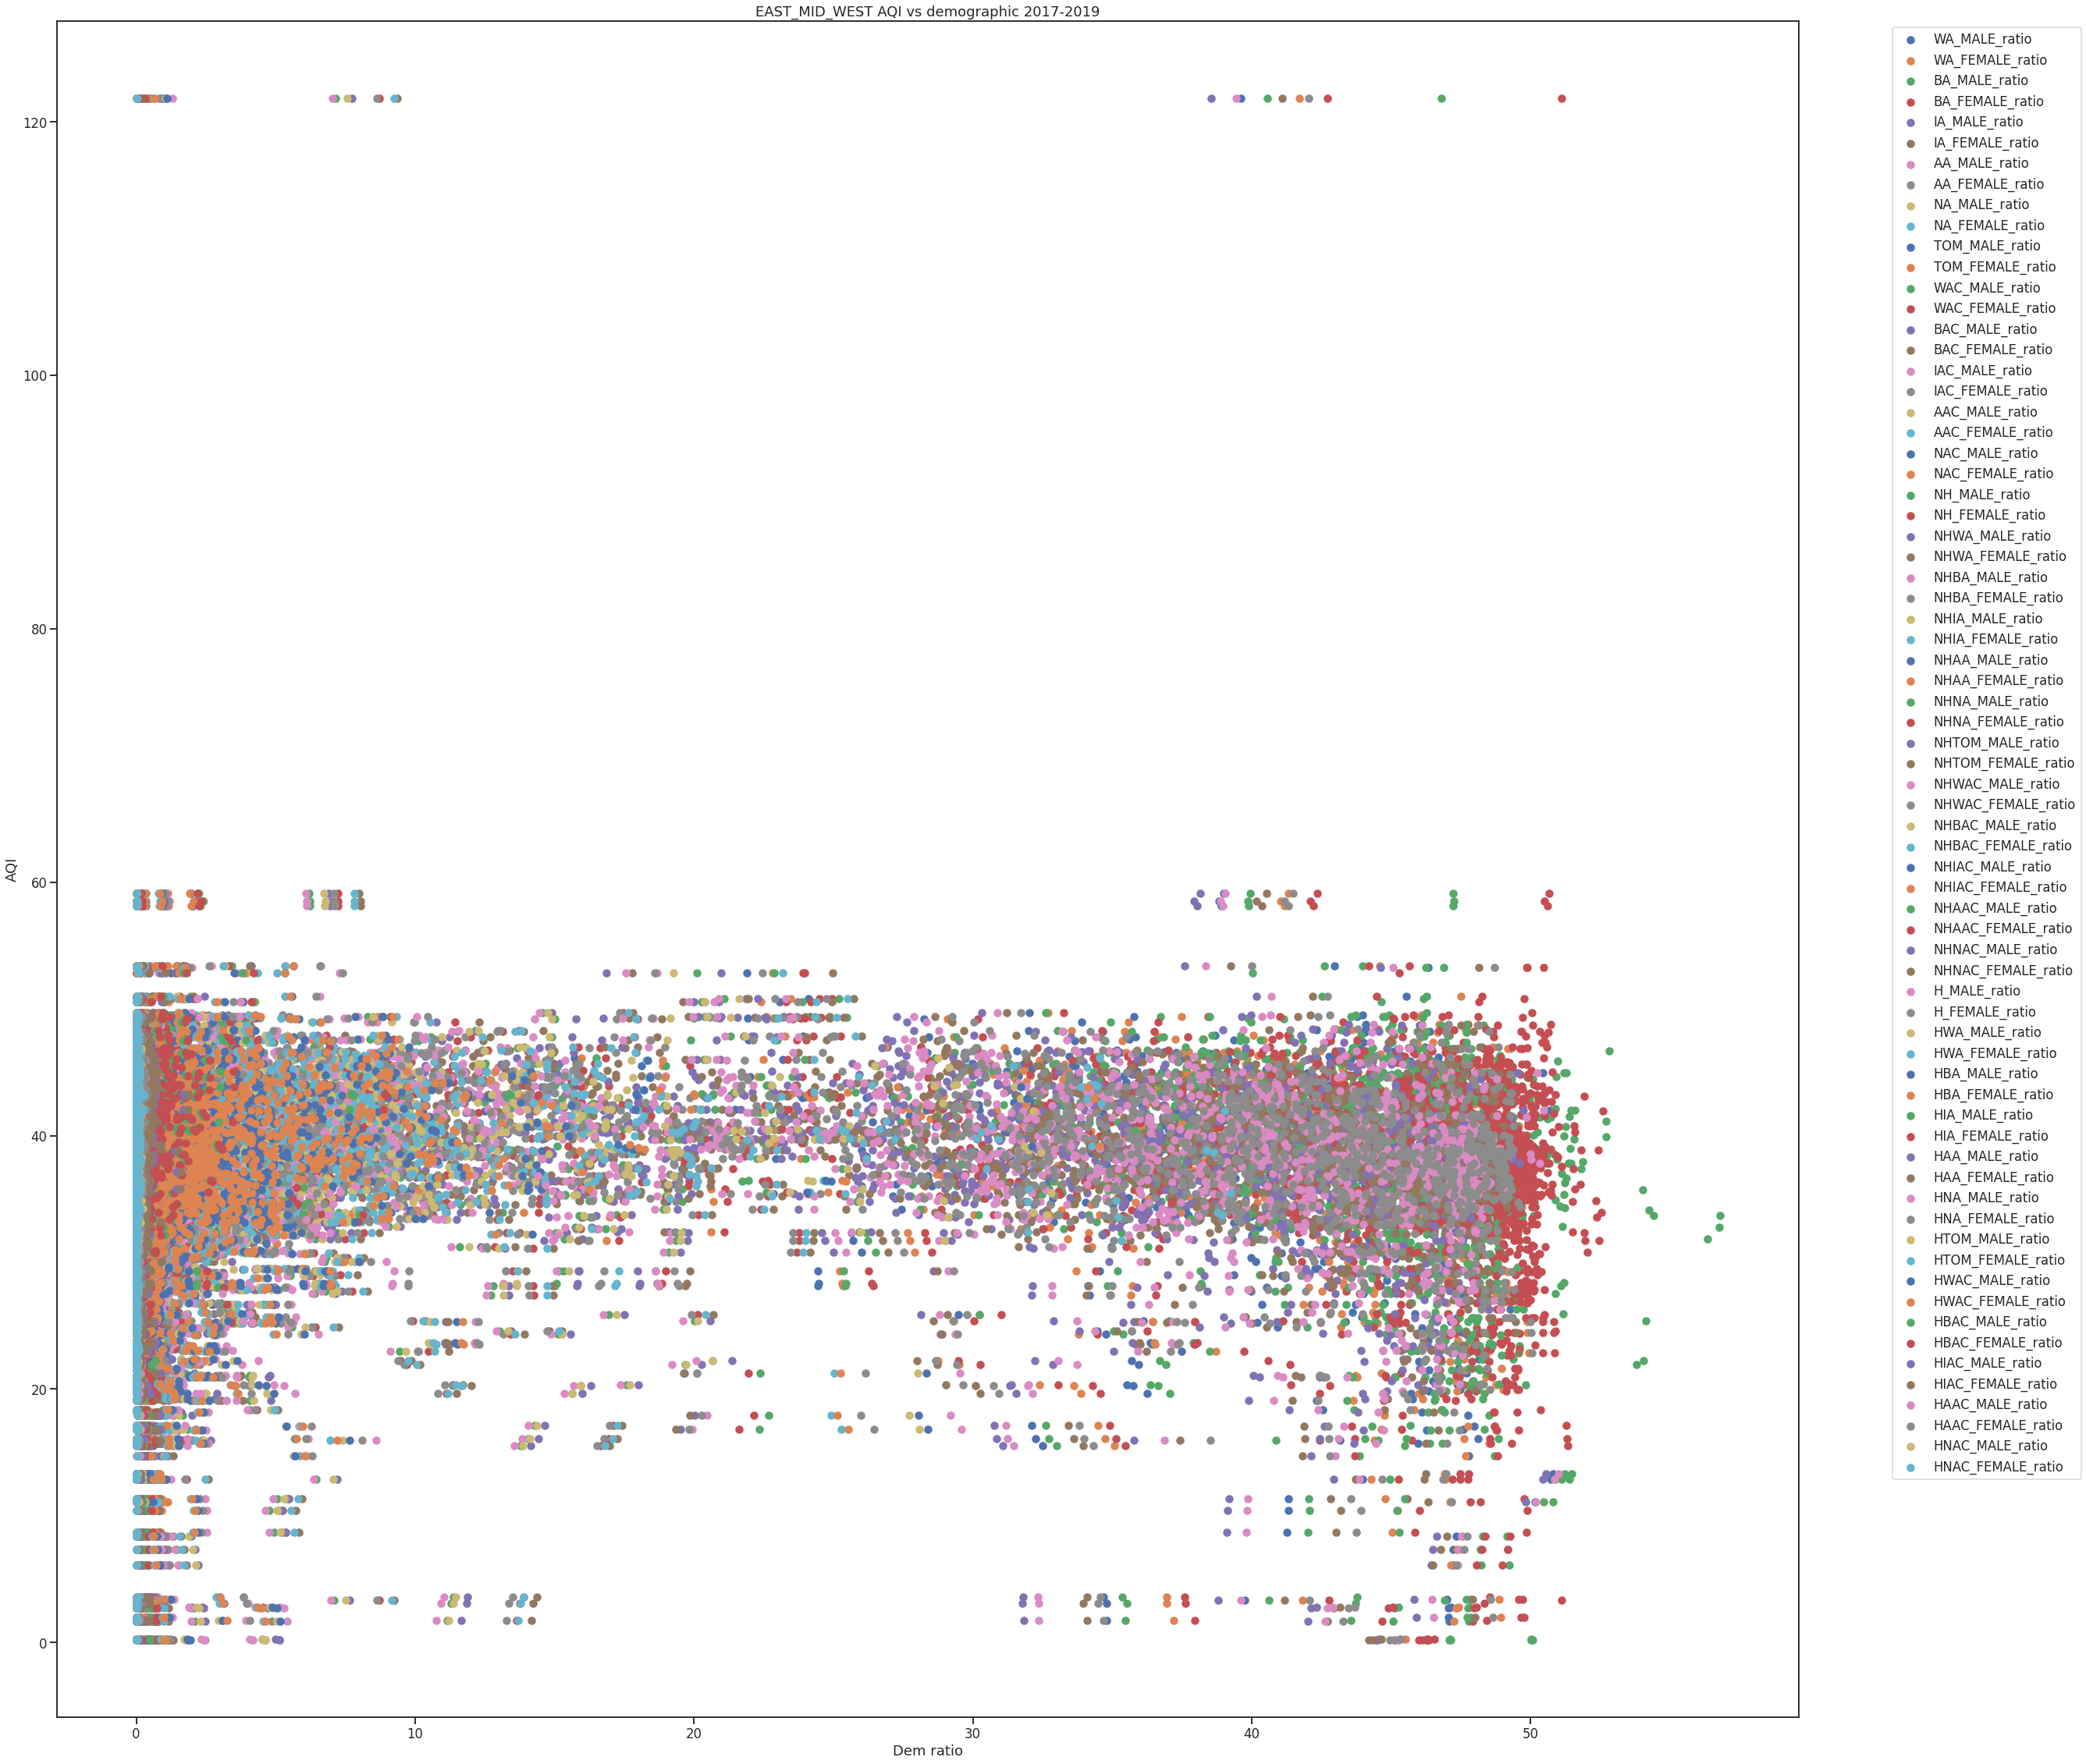

In [26]:
demographic = EAST_MID_WEST_aqi_dem_2017_2019.columns.values[21:]
demographic

fig, ax = plt.subplots(figsize=(40,40))

plt.title('EAST_MID_WEST AQI vs demographic 2017-2019')
plt.xlabel('Dem ratio')
plt.ylabel('AQI')
for dem in demographic:
    ax.scatter(EAST_MID_WEST_avg_aqi_dem_2017_2019[dem], EAST_MID_WEST_avg_aqi_dem_2017_2019['AQI'], label=dem)

ax.legend(bbox_to_anchor=(1.05,1))
plt.show()


In [27]:
## each horizontal line is one county and it shows many different demographics



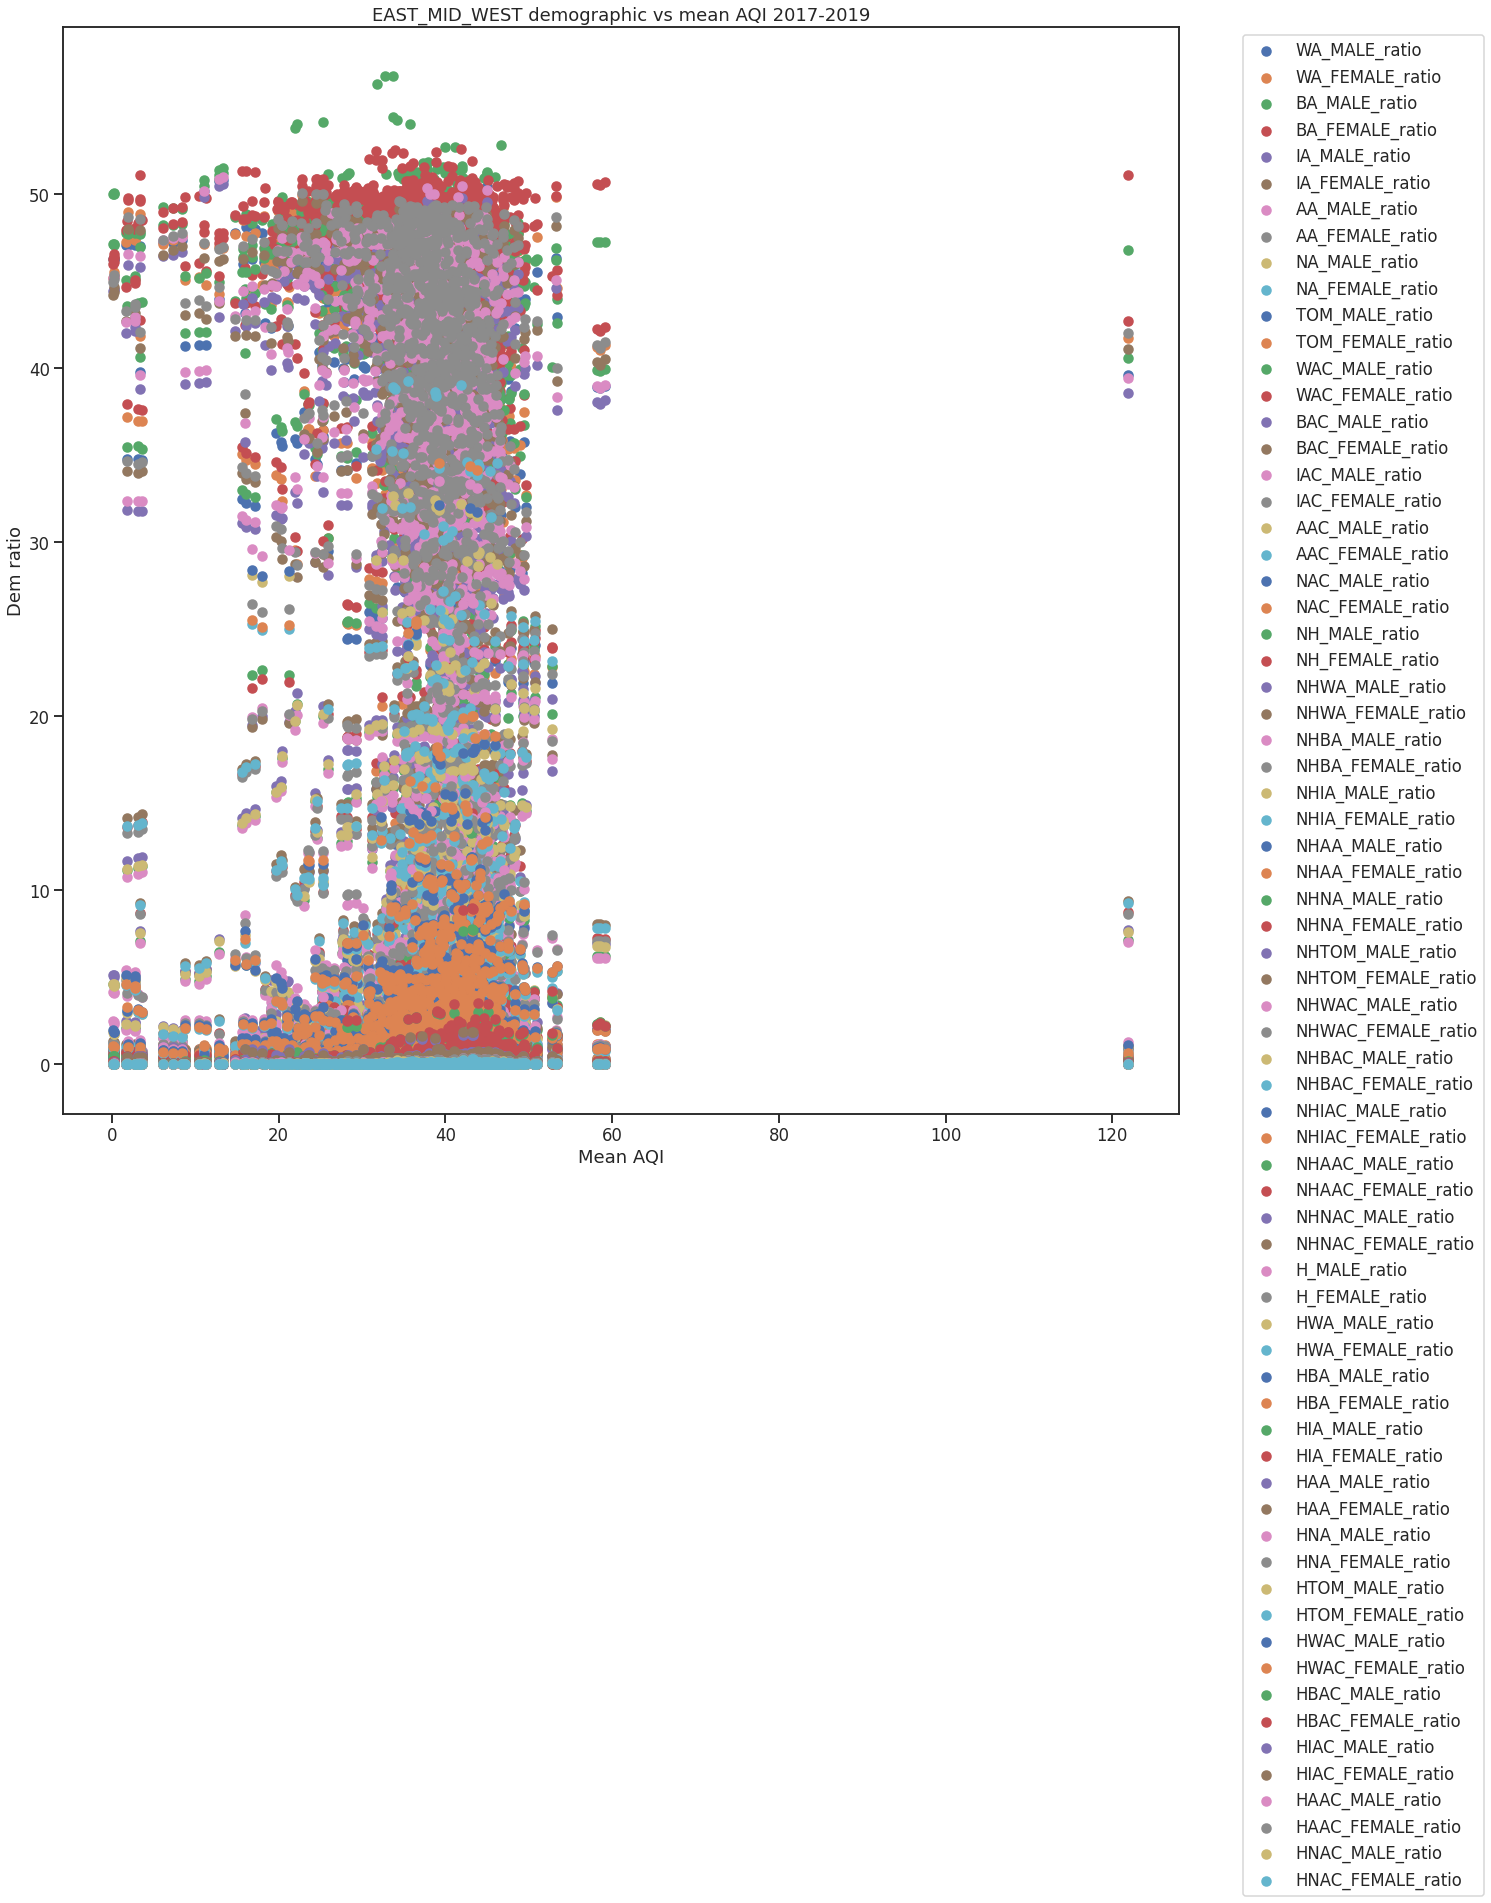

In [28]:
# flip the axis comparison

fig, ax = plt.subplots(figsize=(20,20))

plt.title('EAST_MID_WEST demographic vs mean AQI 2017-2019')
plt.xlabel('Mean AQI')
plt.ylabel('Dem ratio')
for dem in demographic:
    ax.scatter(EAST_MID_WEST_avg_aqi_dem_2017_2019['AQI'], EAST_MID_WEST_avg_aqi_dem_2017_2019[dem], label=dem)

ax.legend(bbox_to_anchor=(1.05,1))
plt.show()

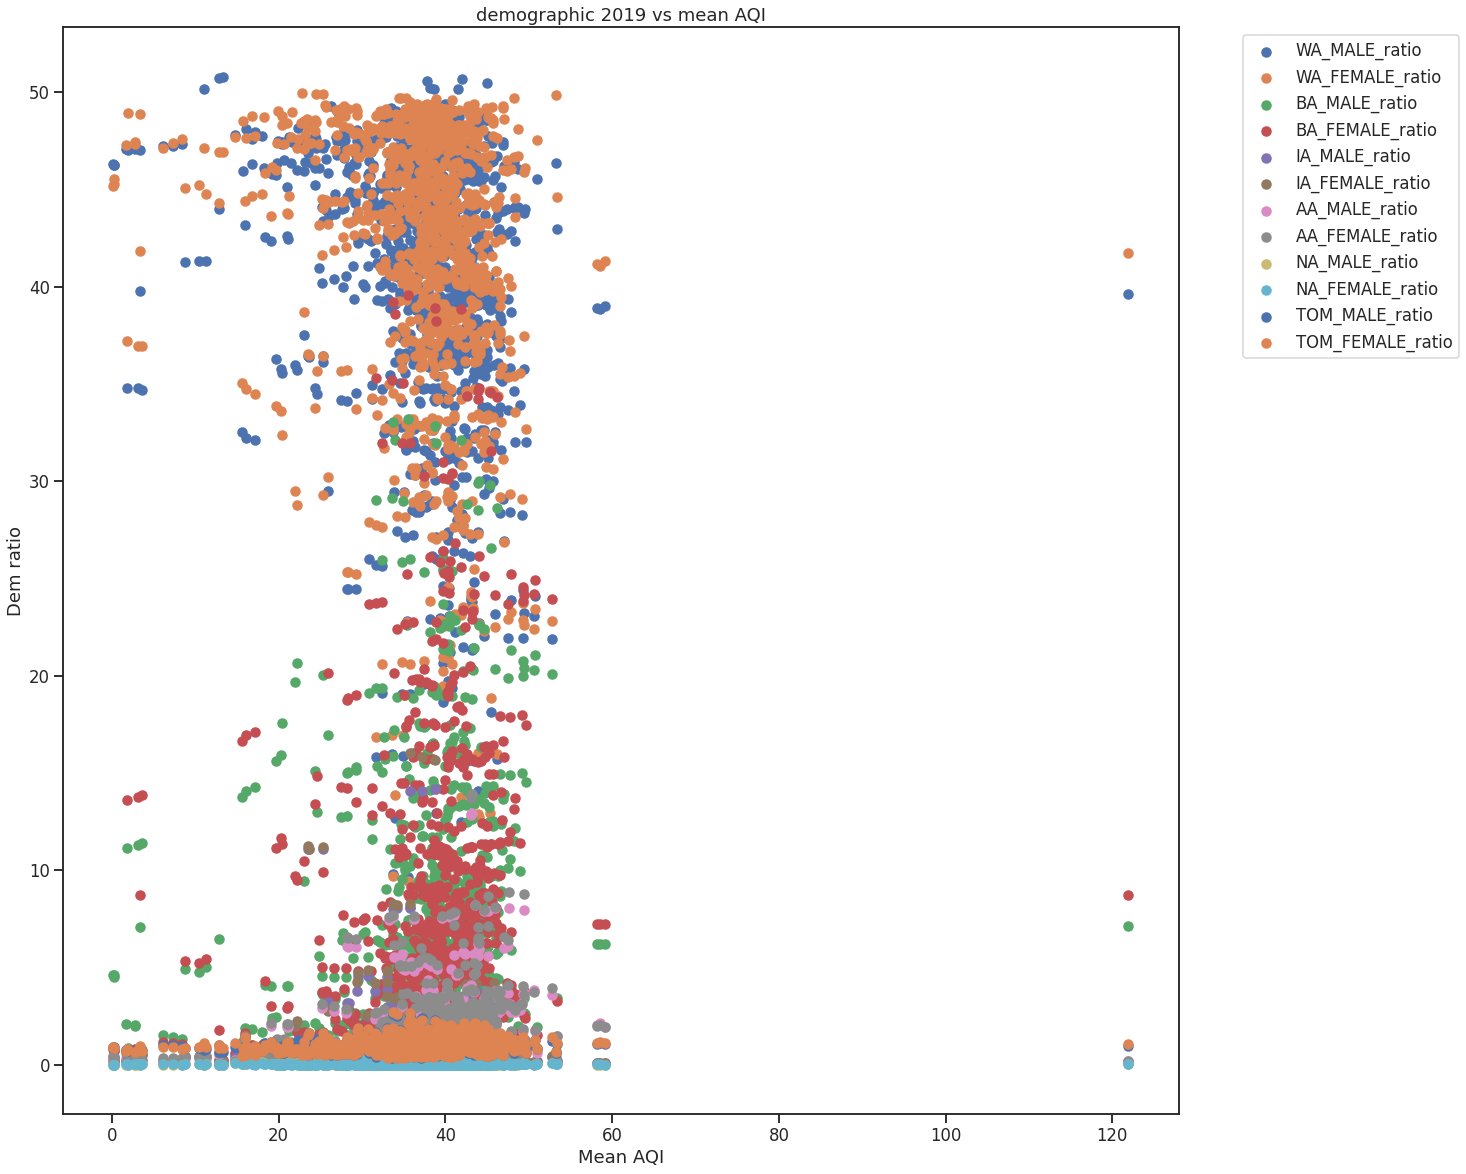

In [29]:
demographic_alone_combo = EAST_MID_WEST_aqi_dem_2017_2019.columns.values[21:33]
demographic_alone_combo

fig, ax = plt.subplots(figsize=(20,20))

plt.title('demographic 2019 vs mean AQI')
plt.xlabel('Mean AQI')
plt.ylabel('Dem ratio')
for dem in demographic_alone_combo:
    ax.scatter(EAST_MID_WEST_avg_aqi_dem_2017_2019['AQI'], EAST_MID_WEST_avg_aqi_dem_2017_2019[dem], label=dem)

ax.legend(bbox_to_anchor=(1.05,1))
plt.show()

# scatterplot for each individual demographic in the counties


<ipython-input-30-156f0b9baf7b>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20,20))


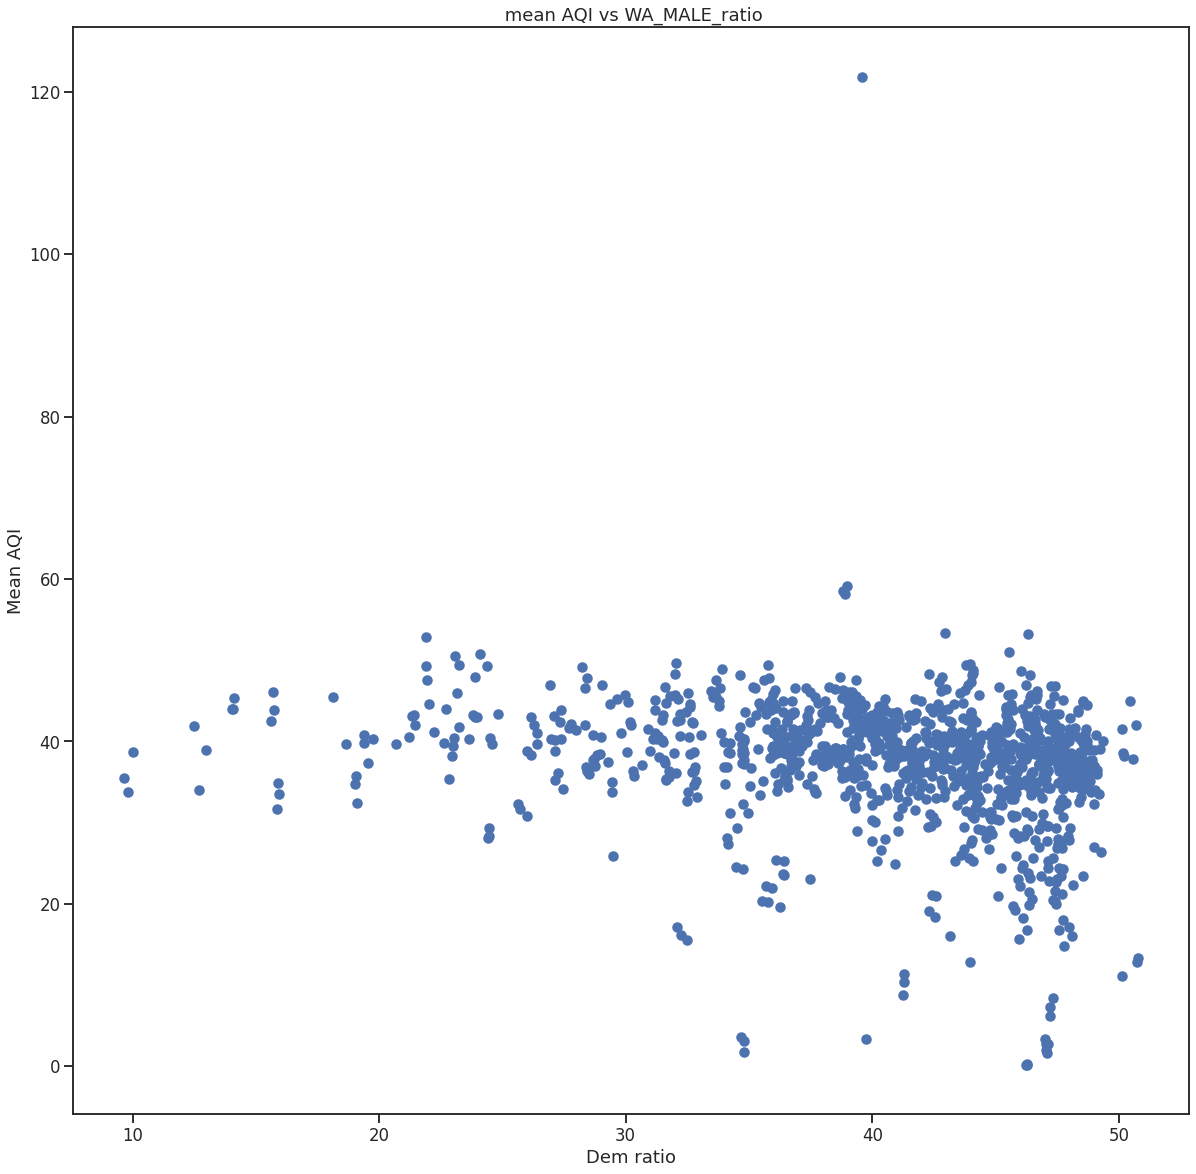

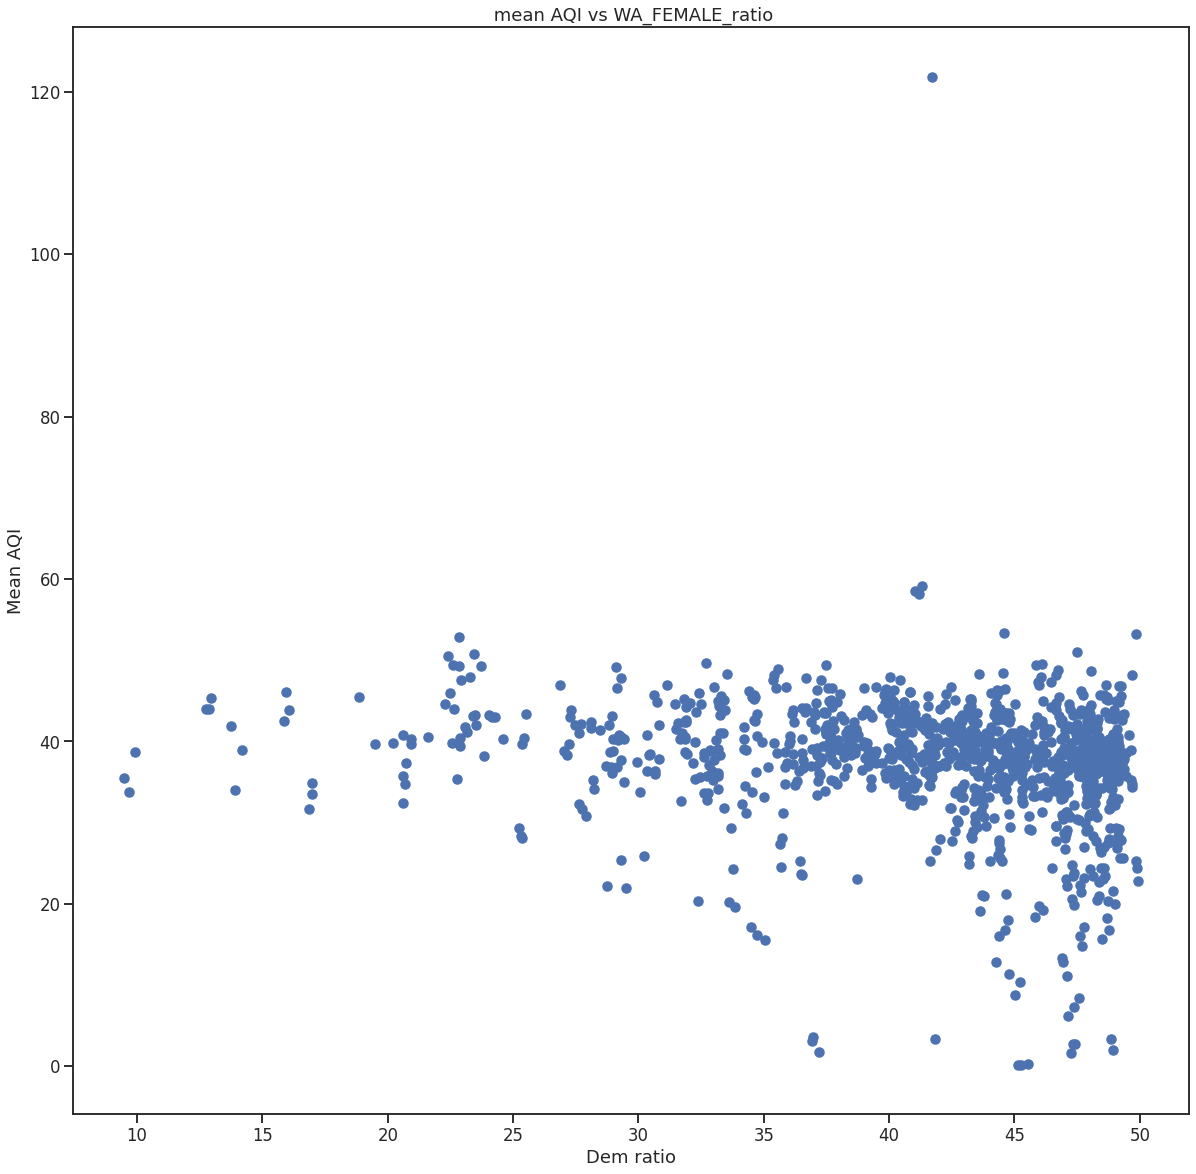

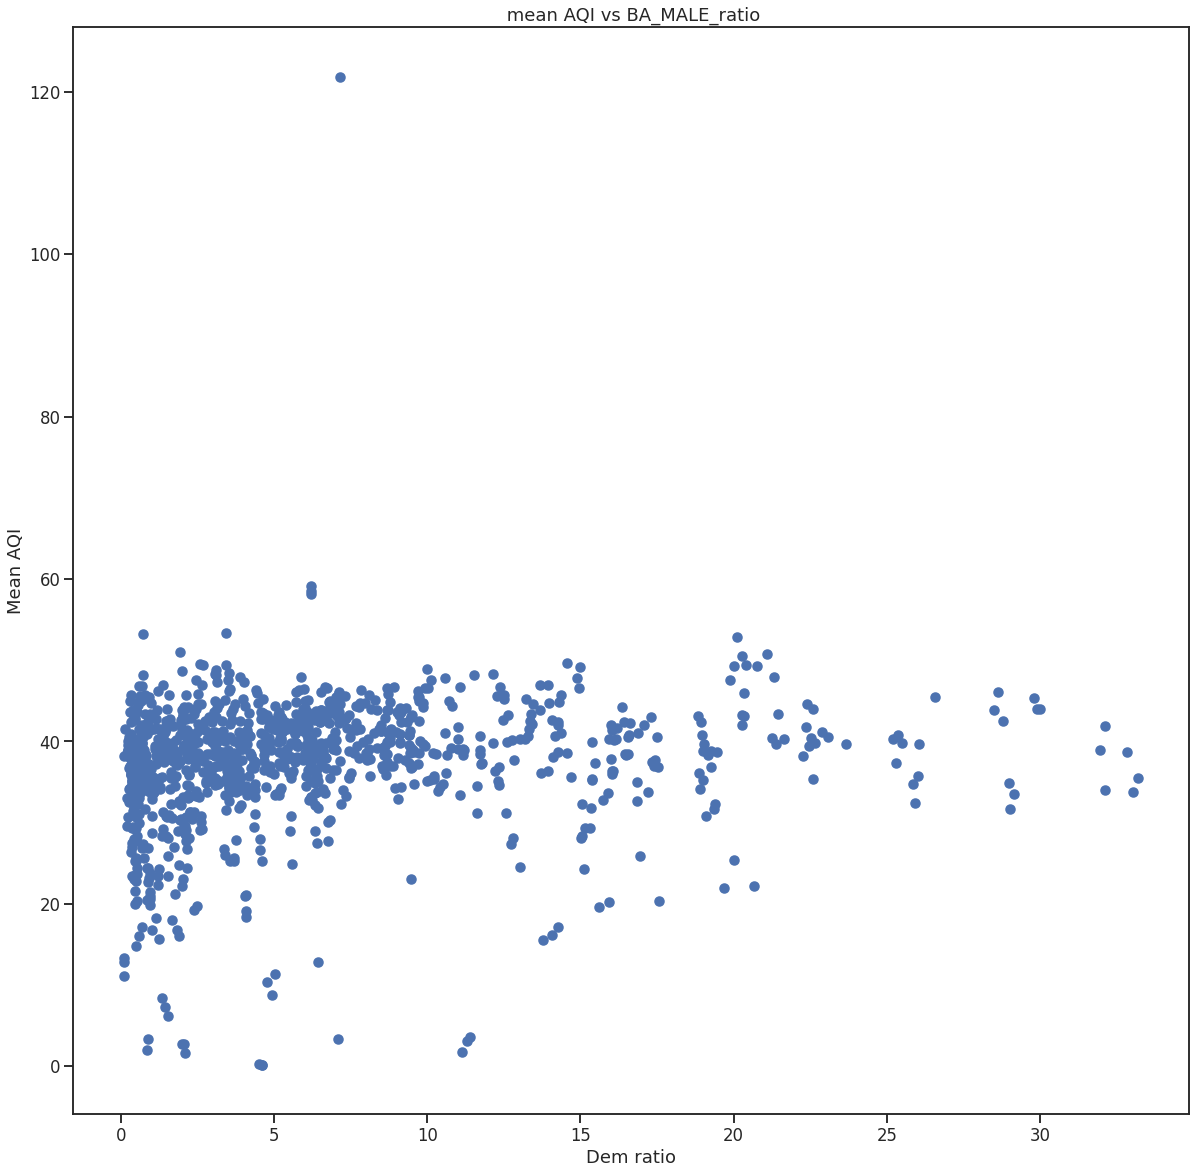

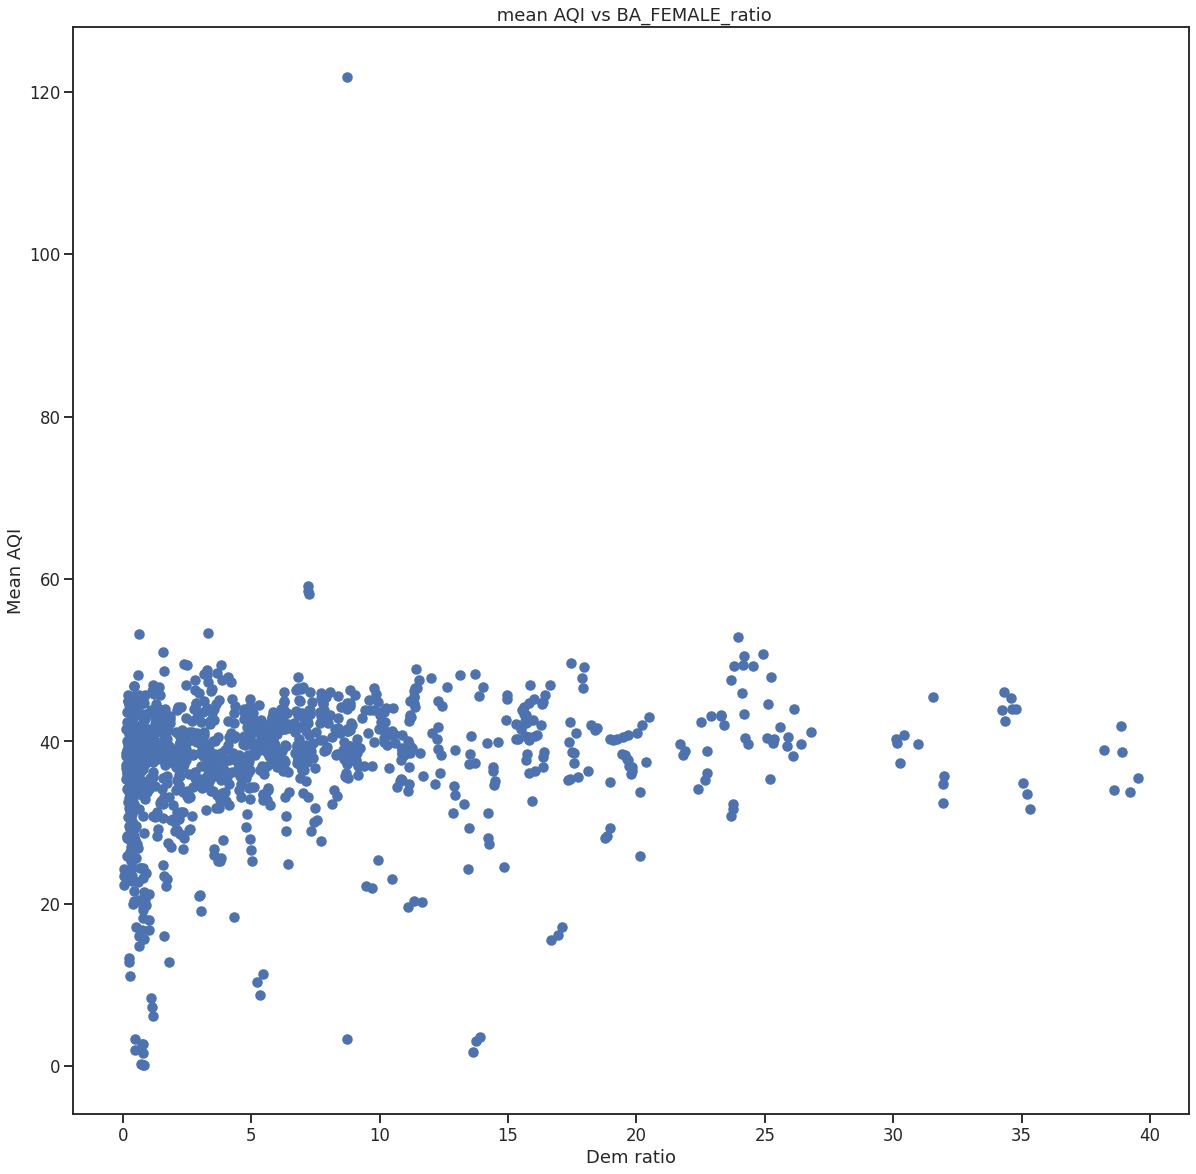

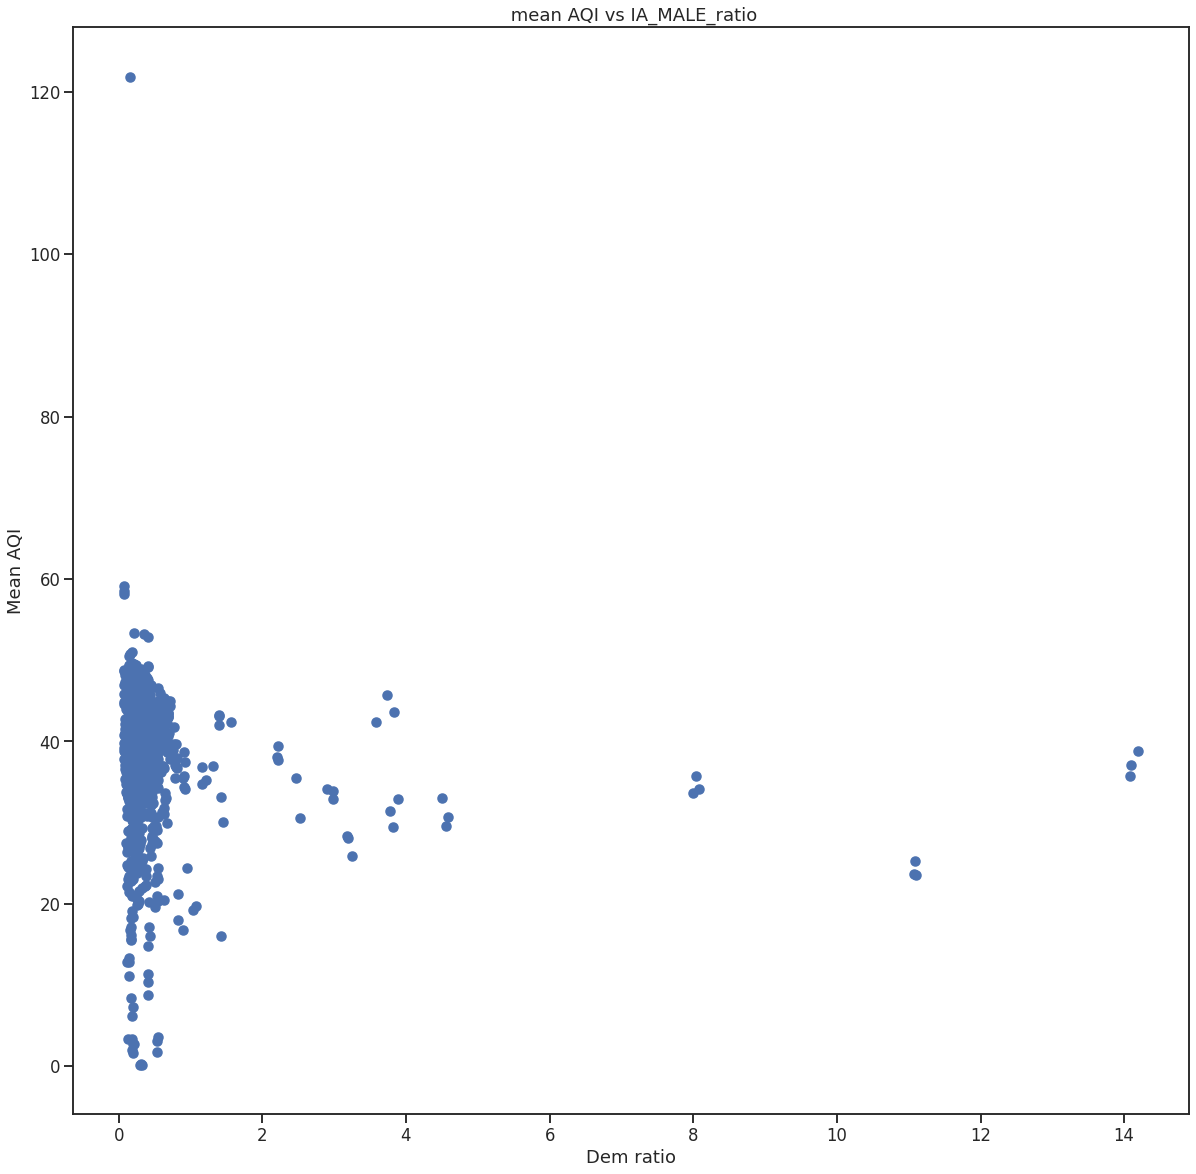

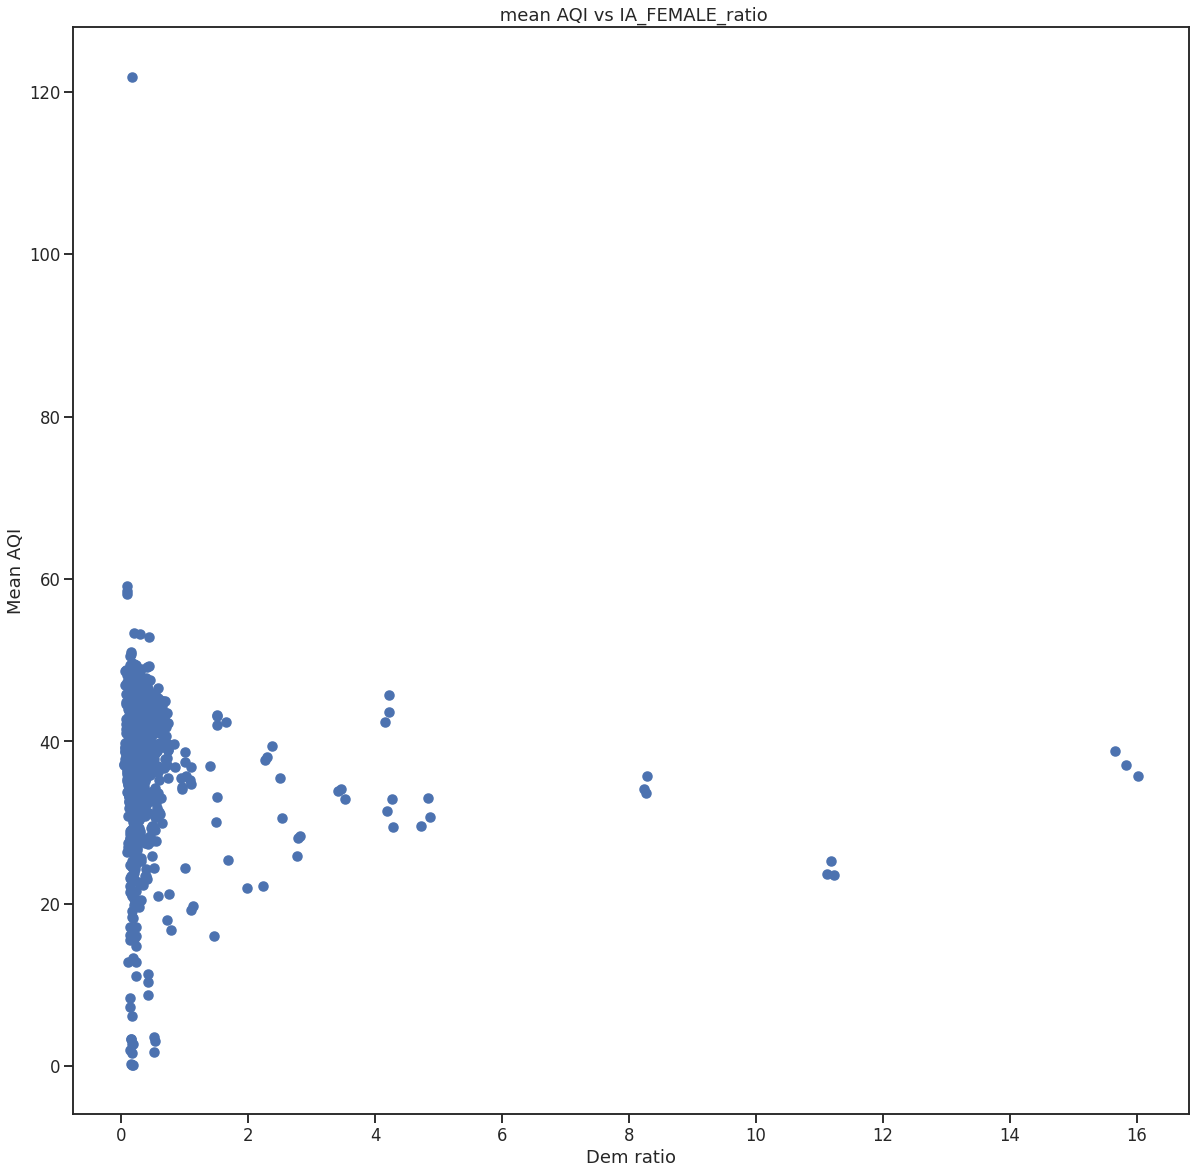

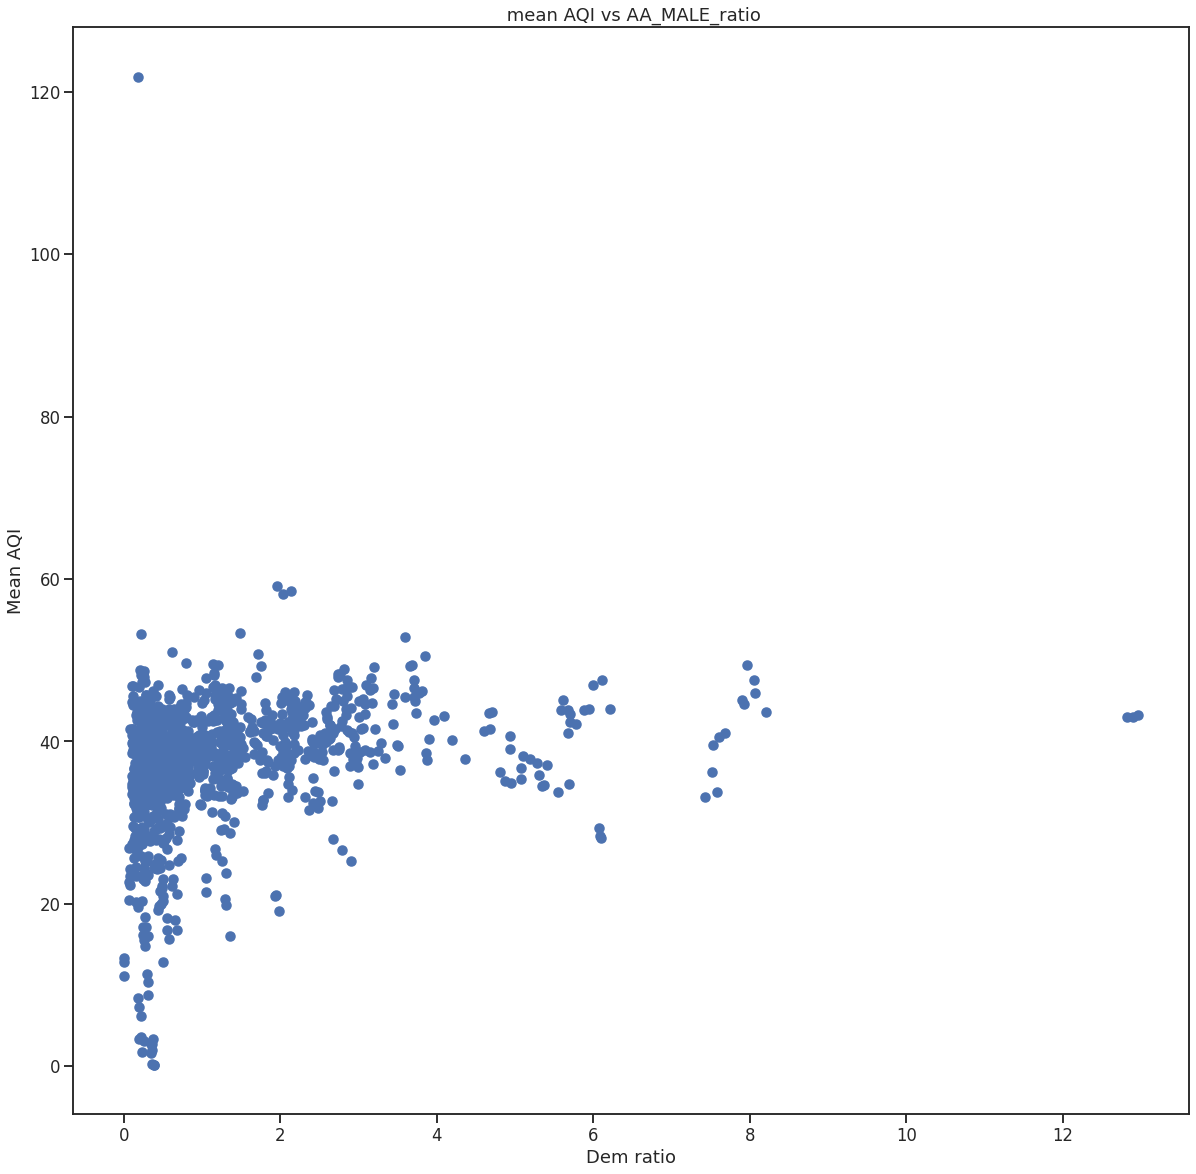

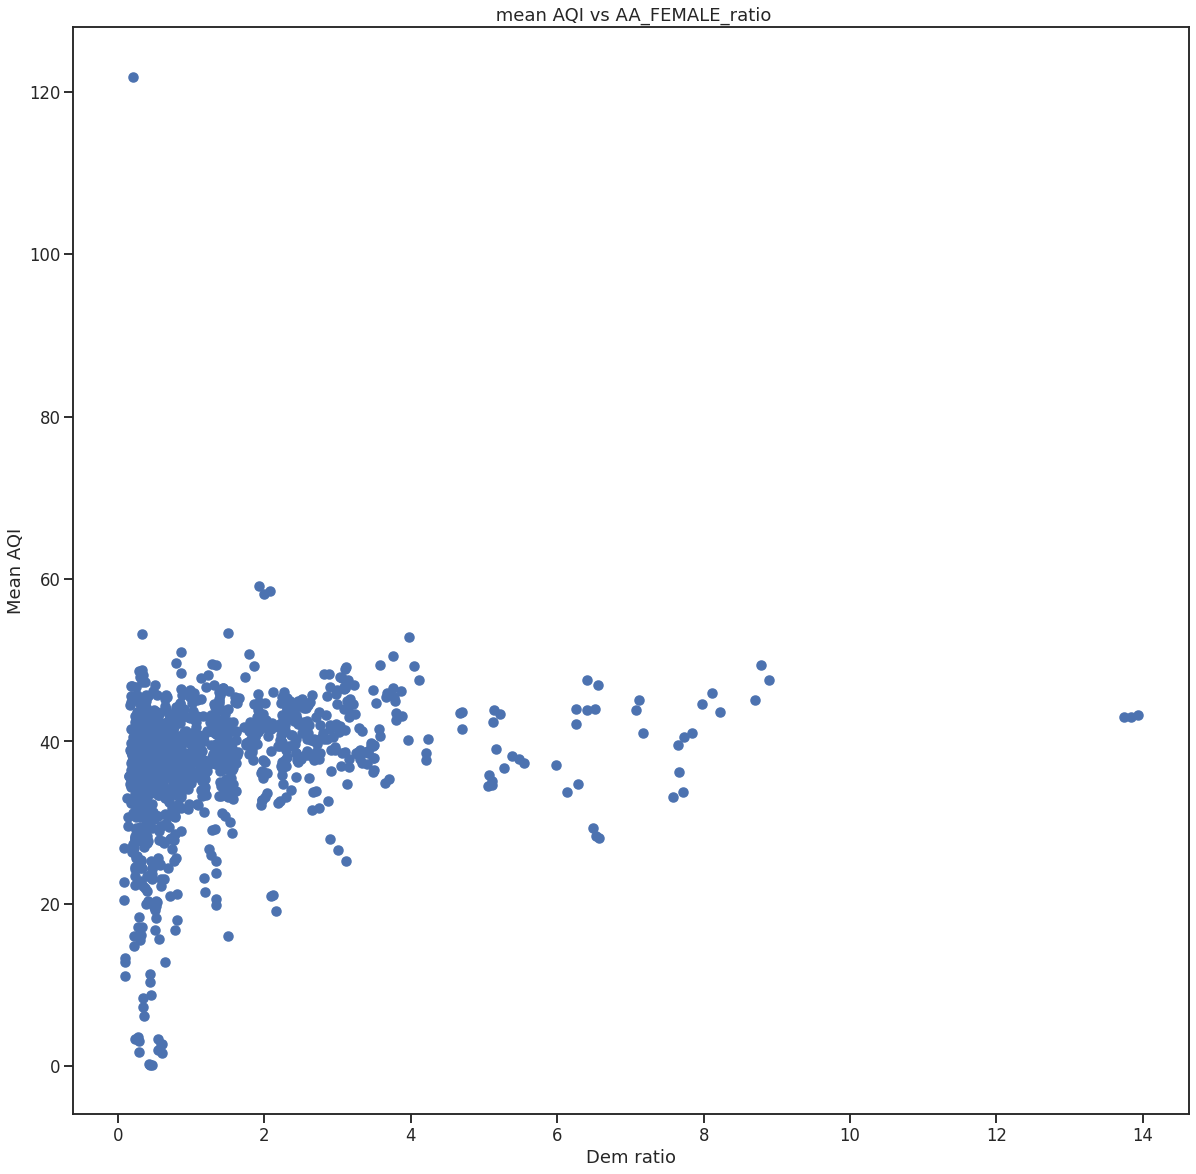

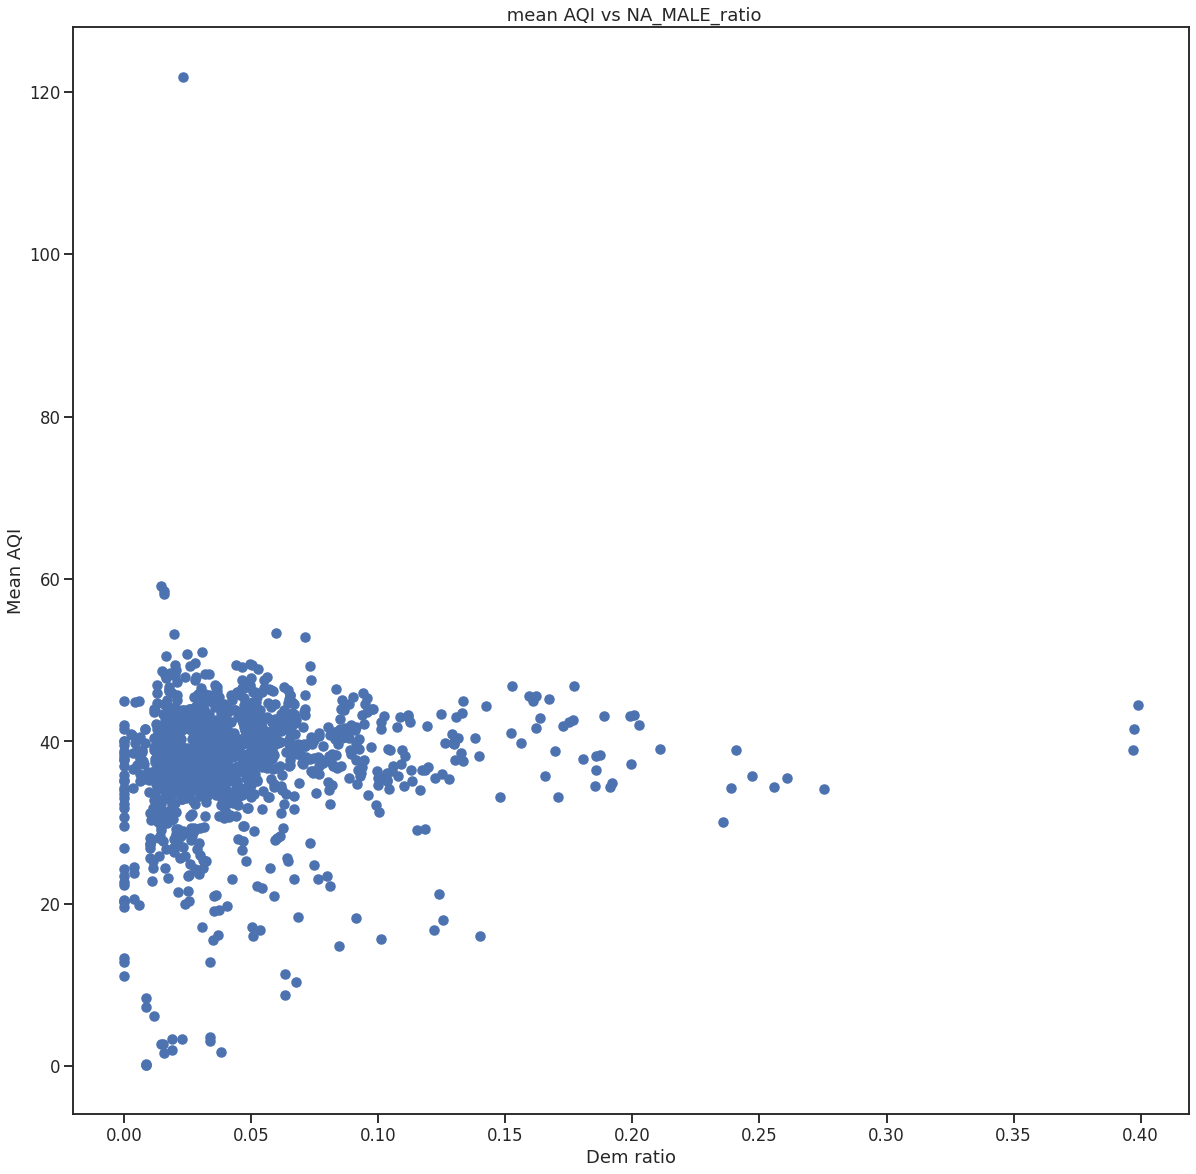

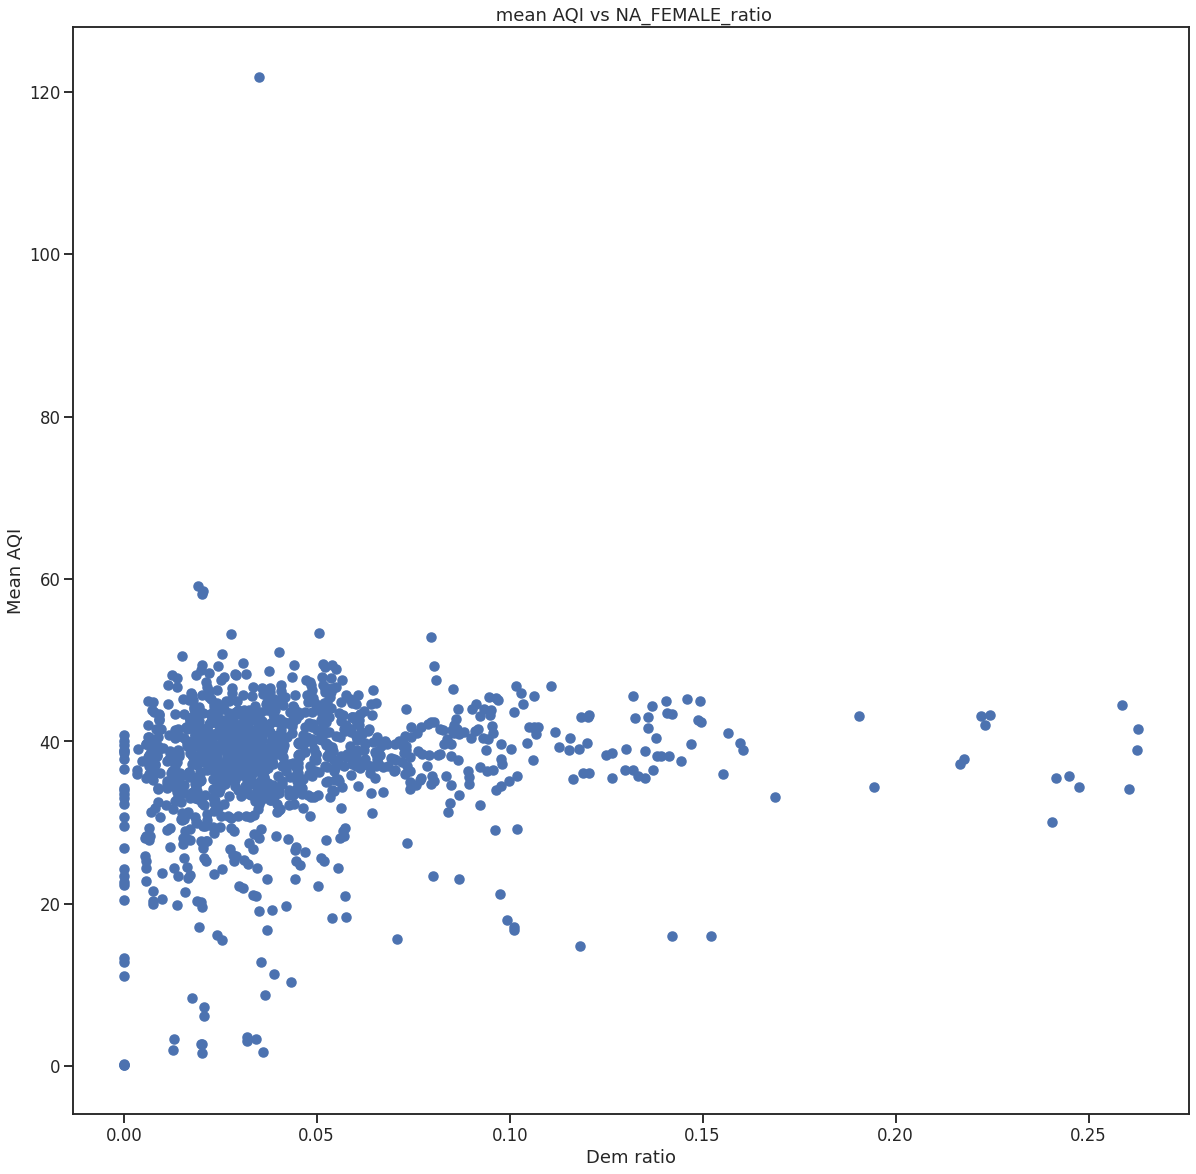

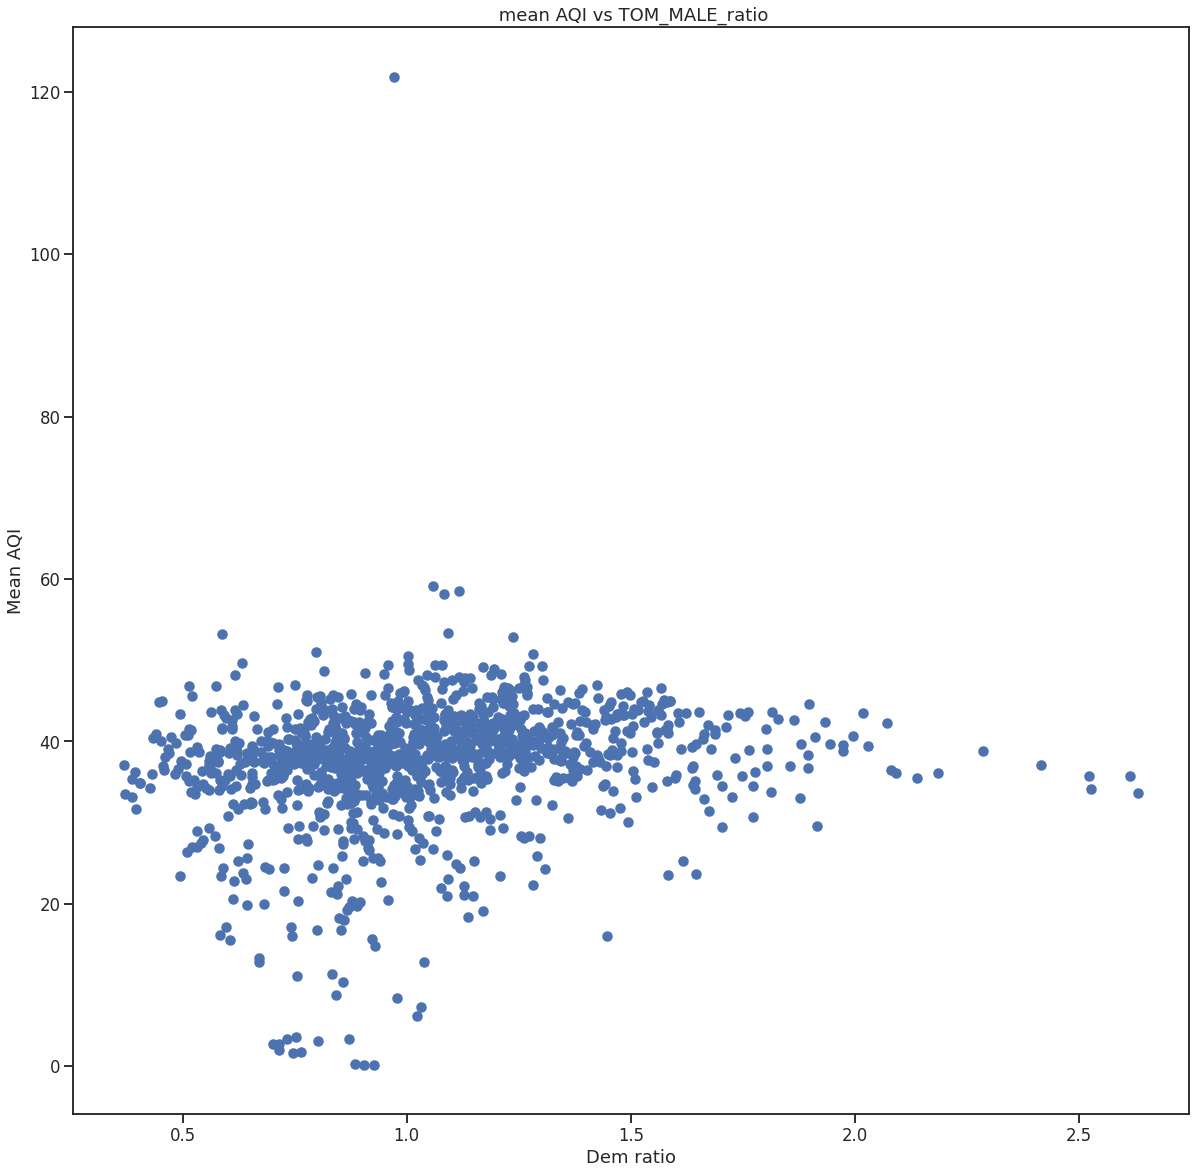

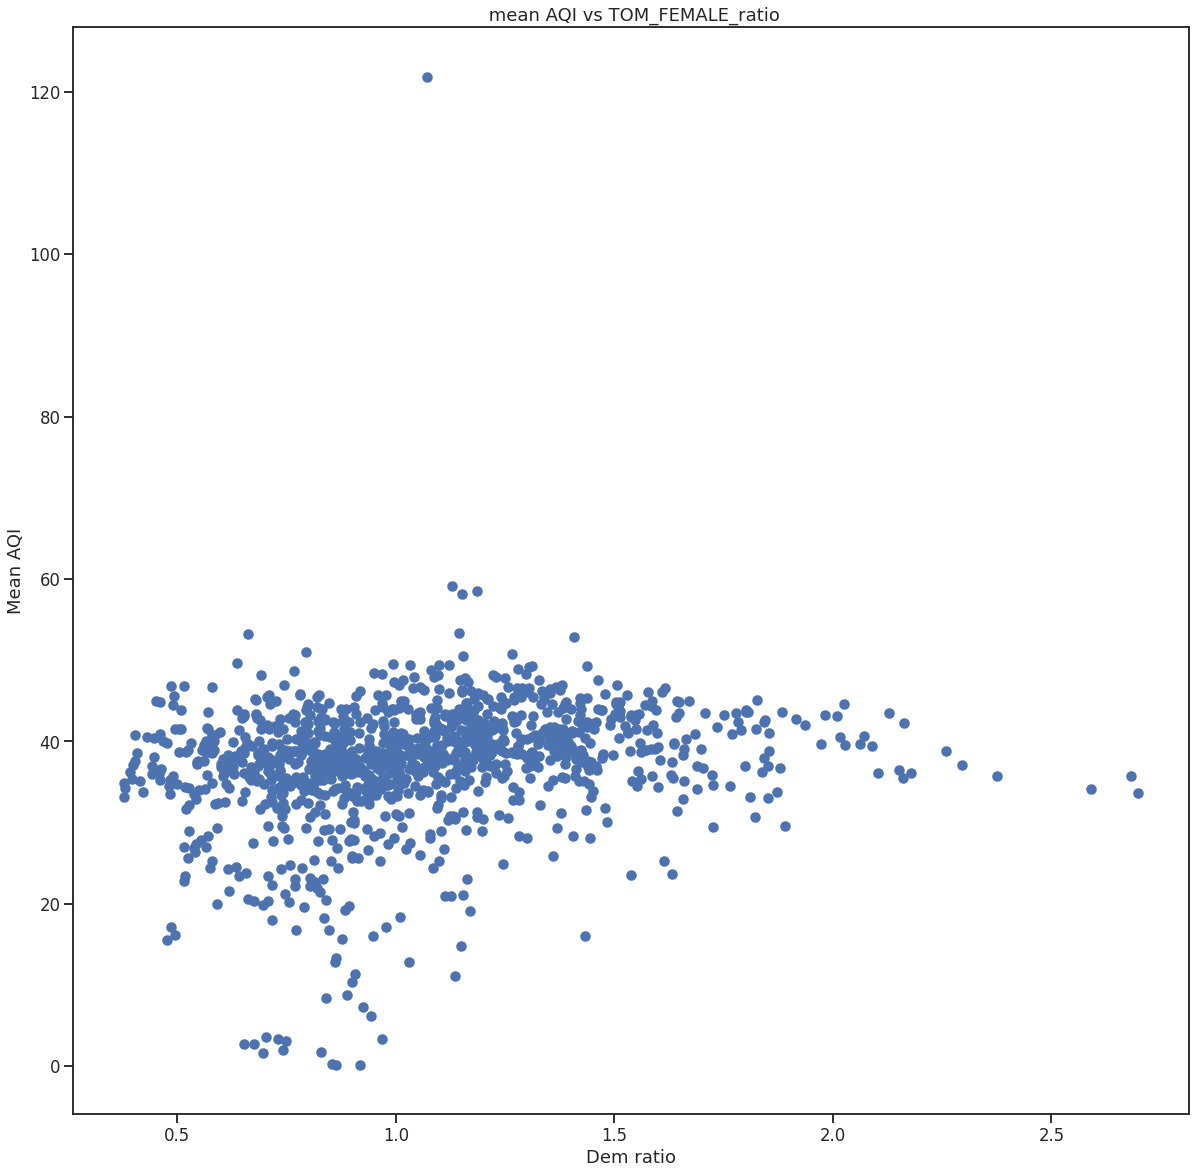

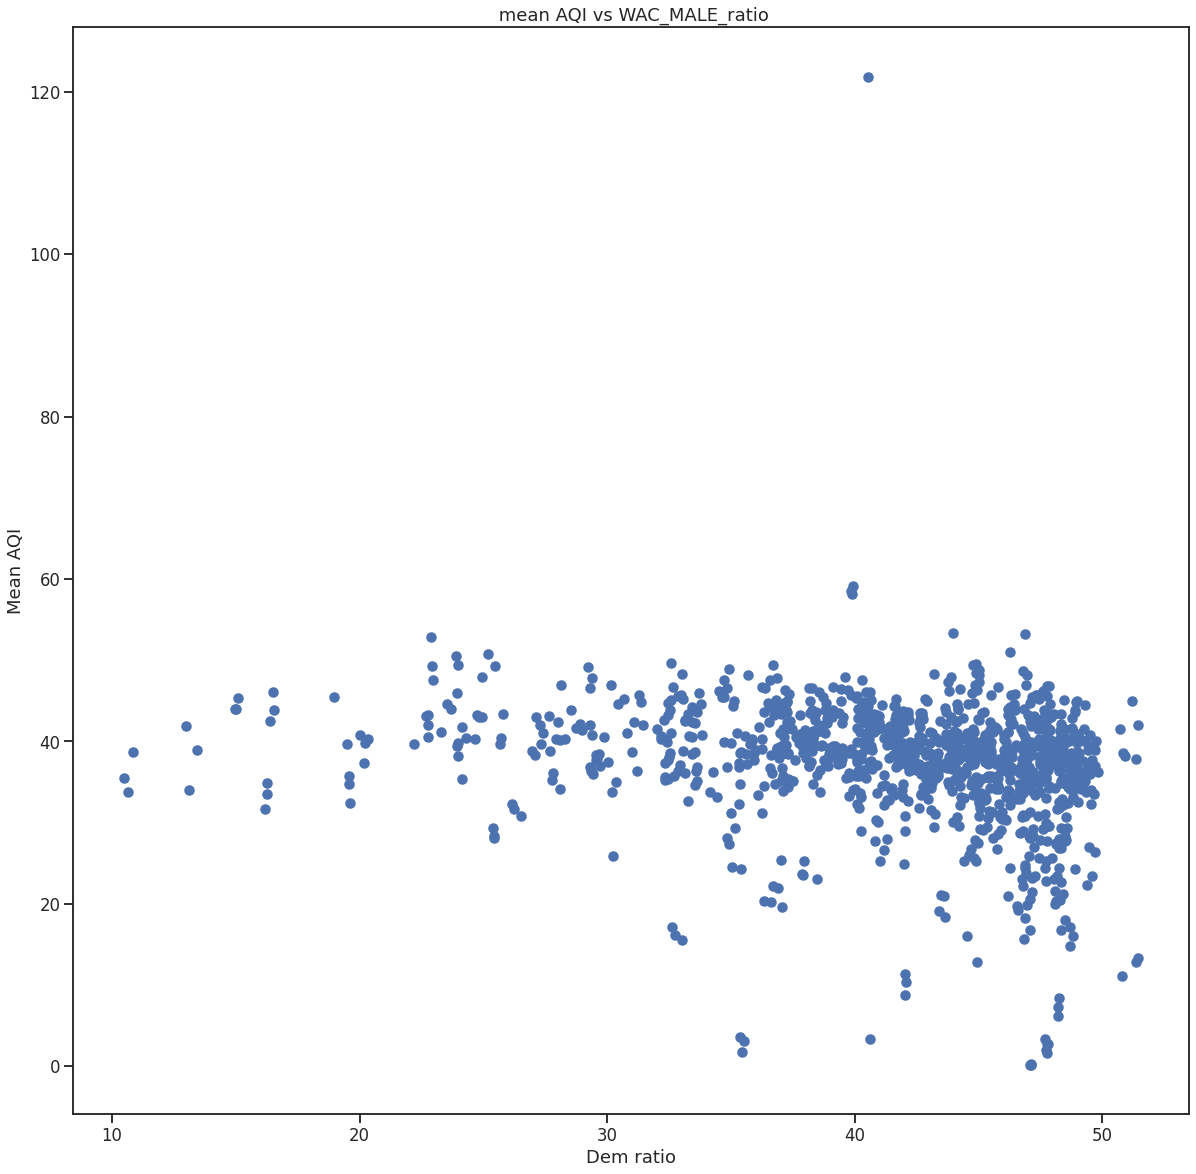

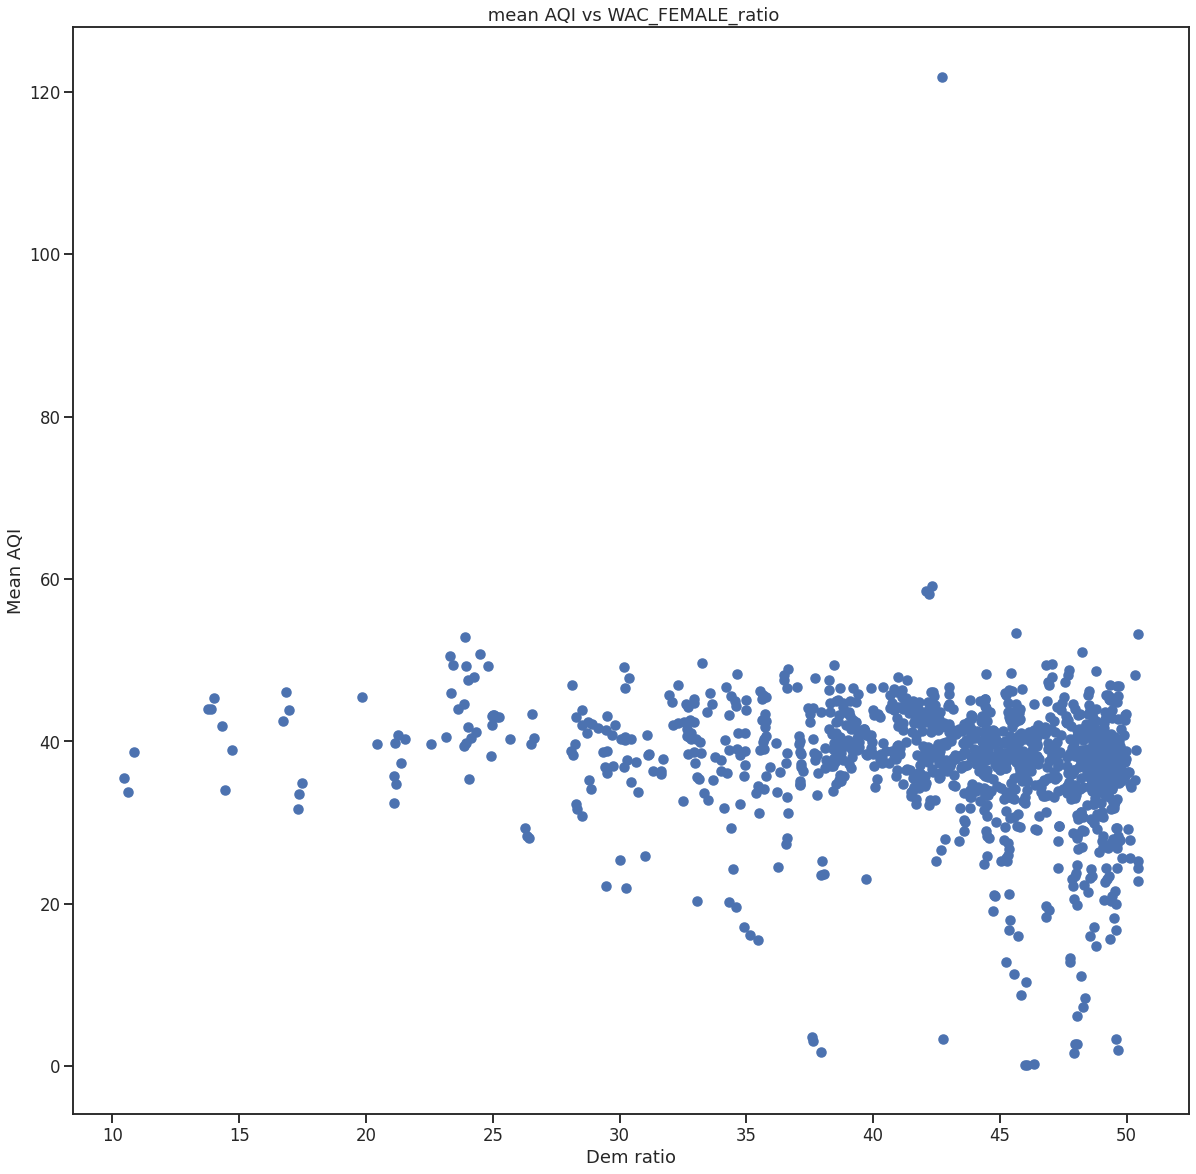

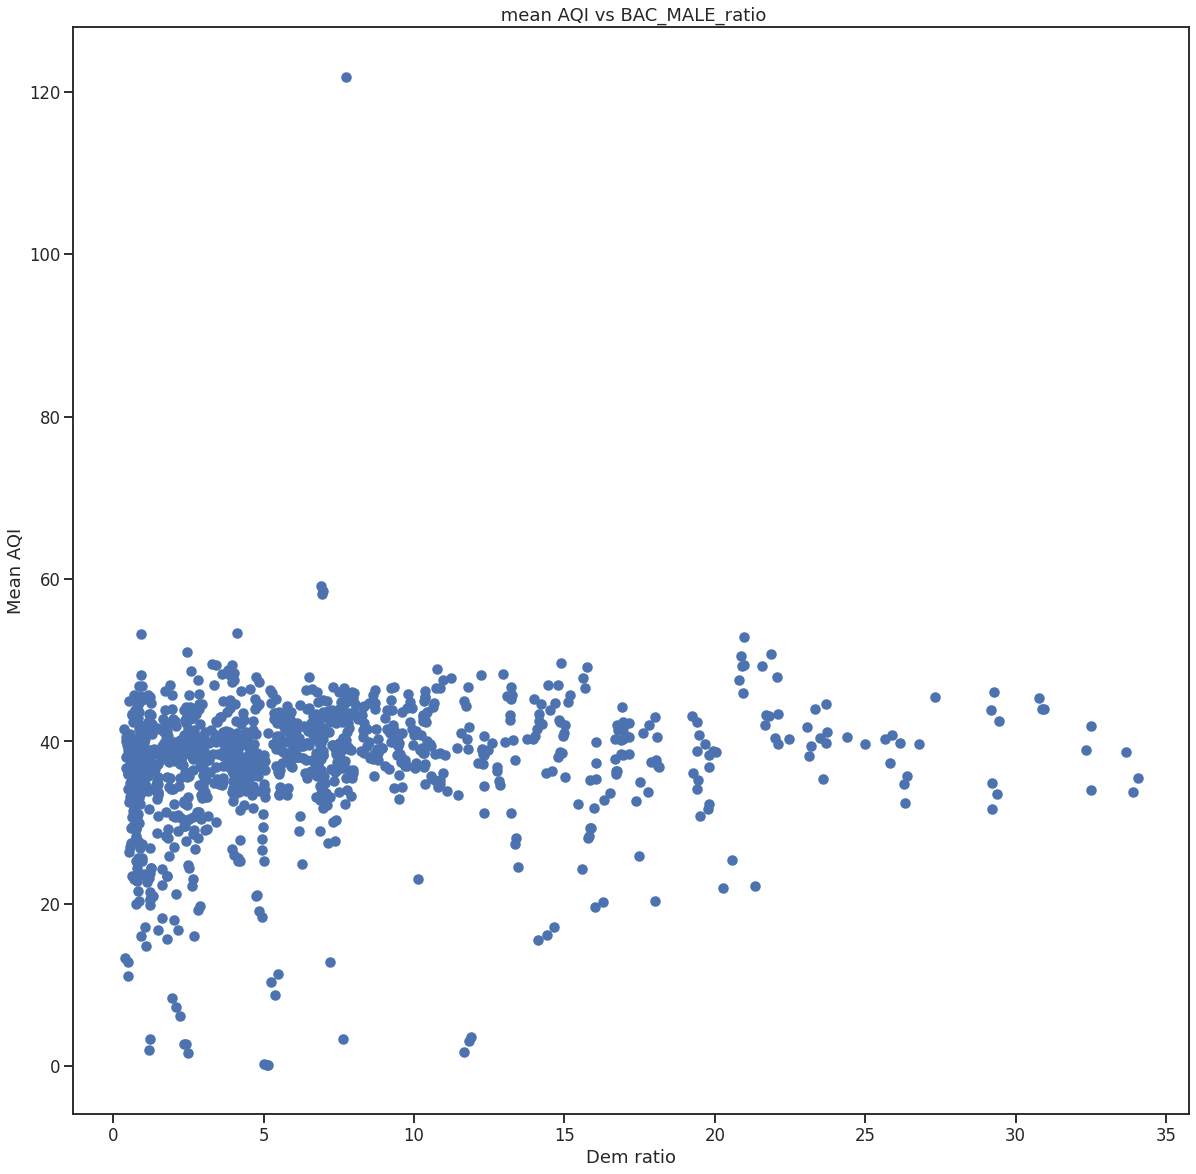

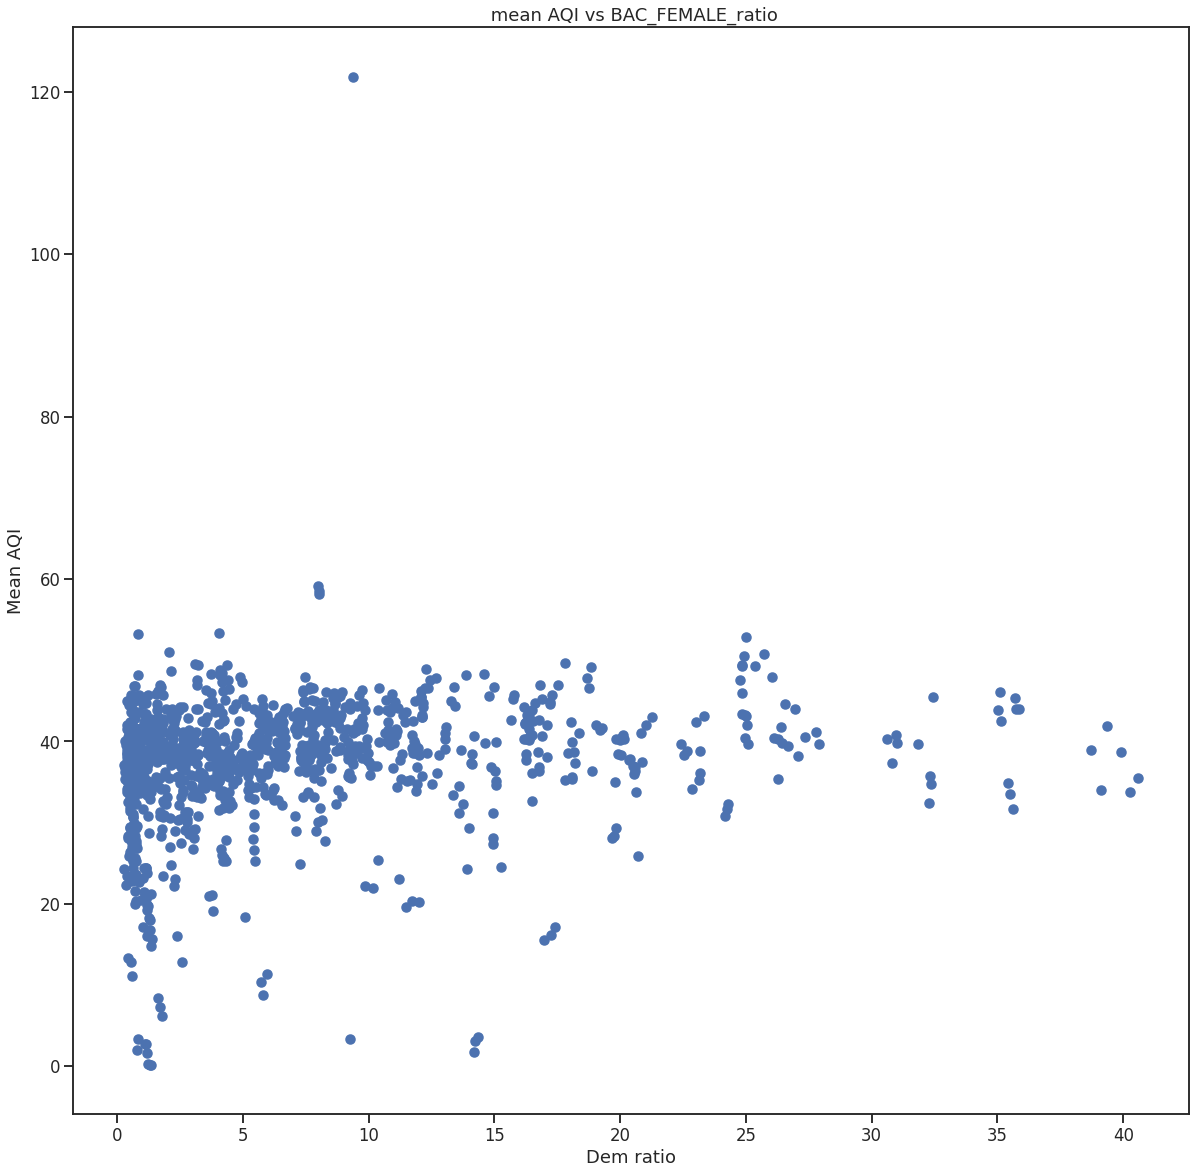

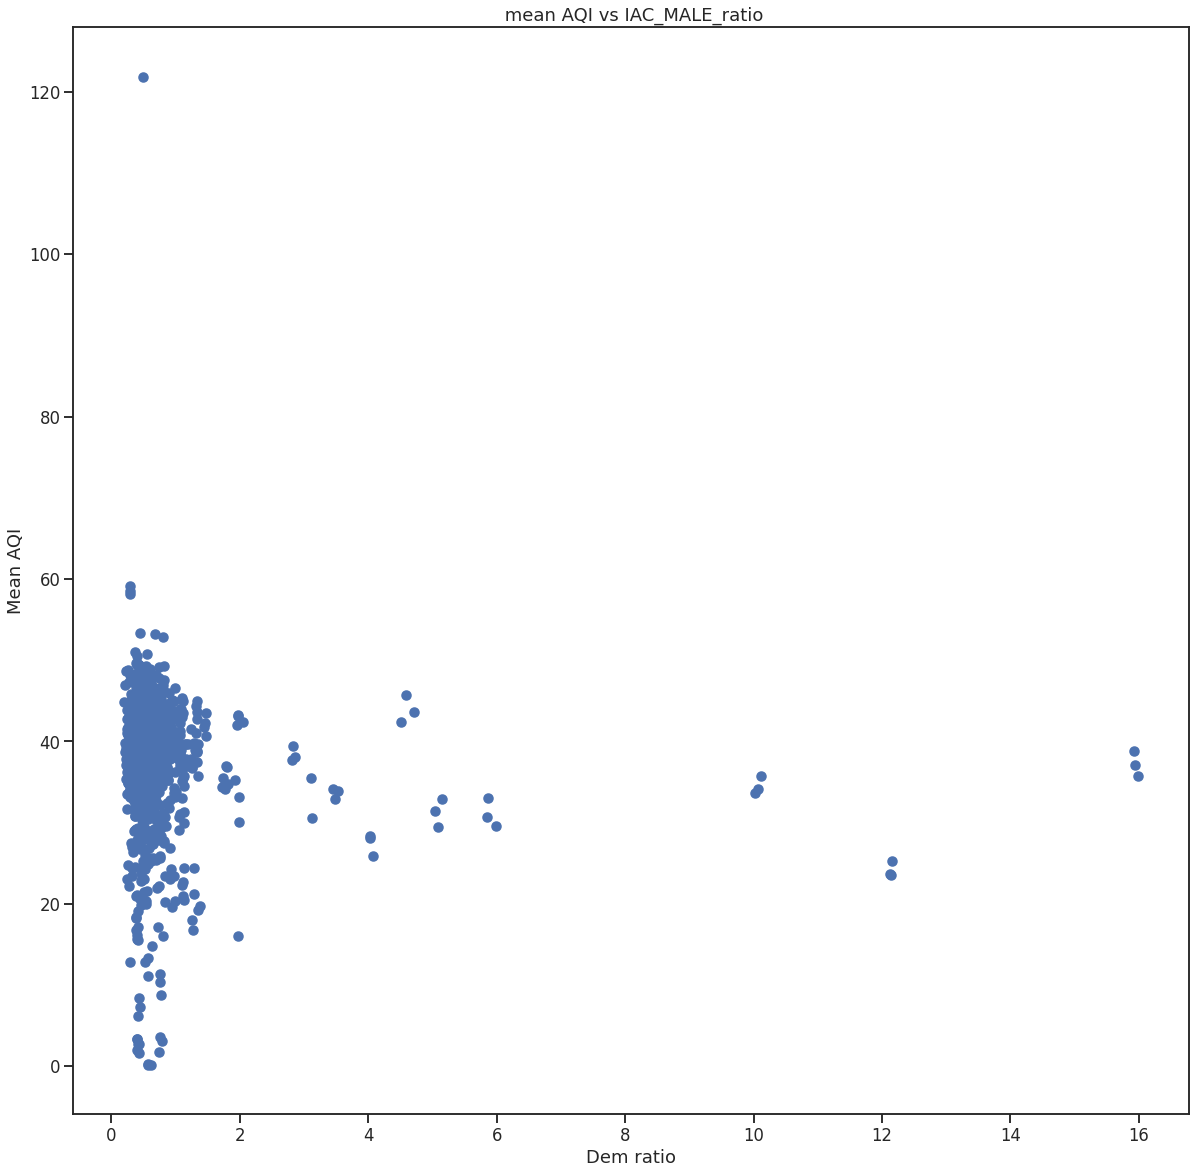

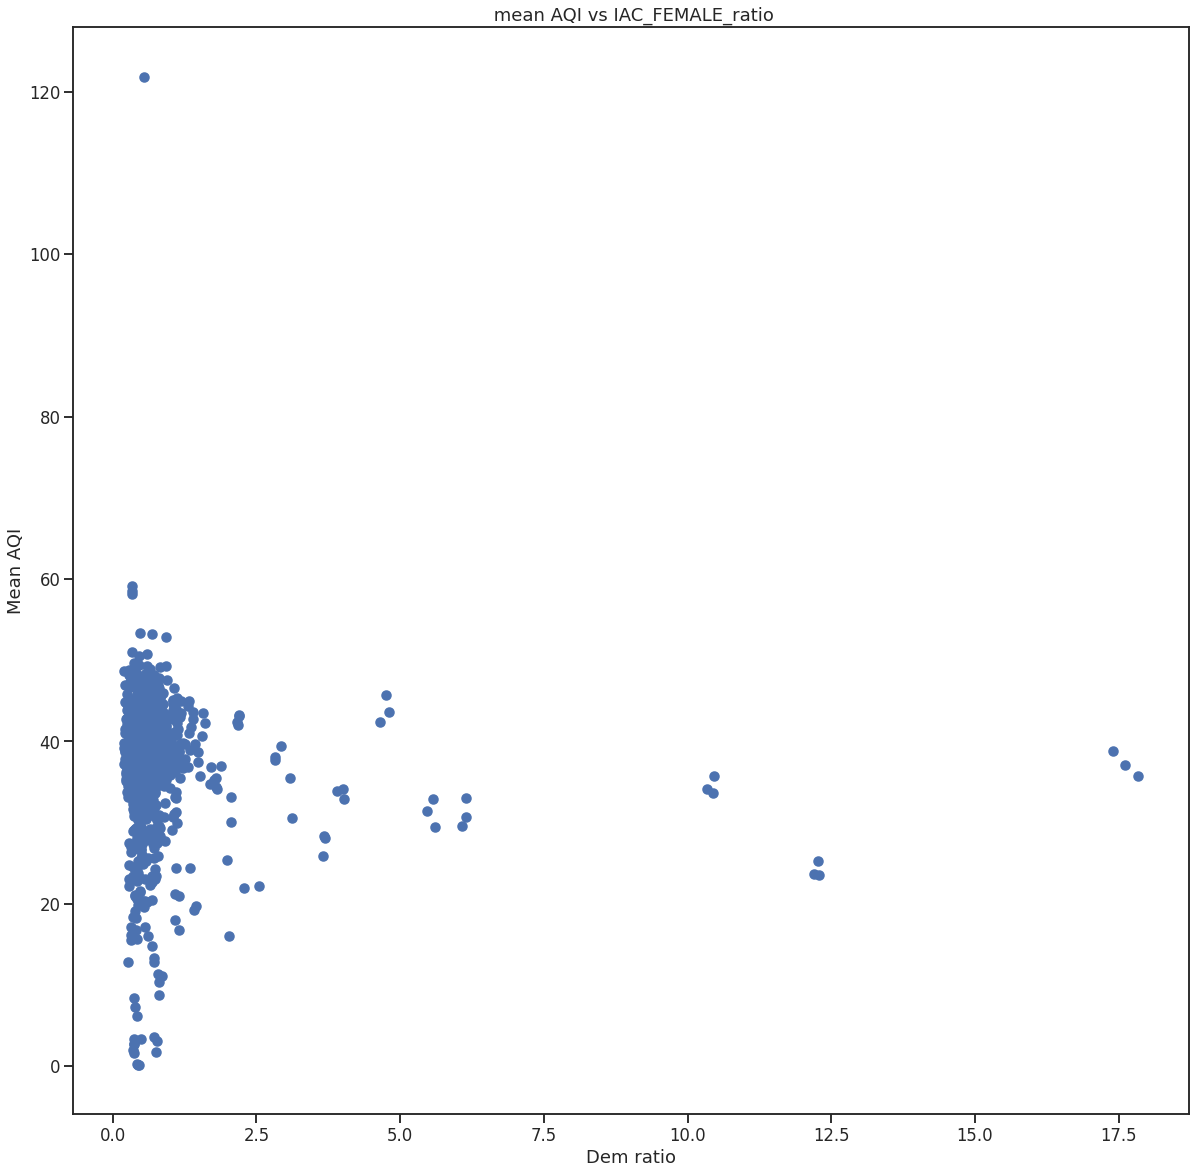

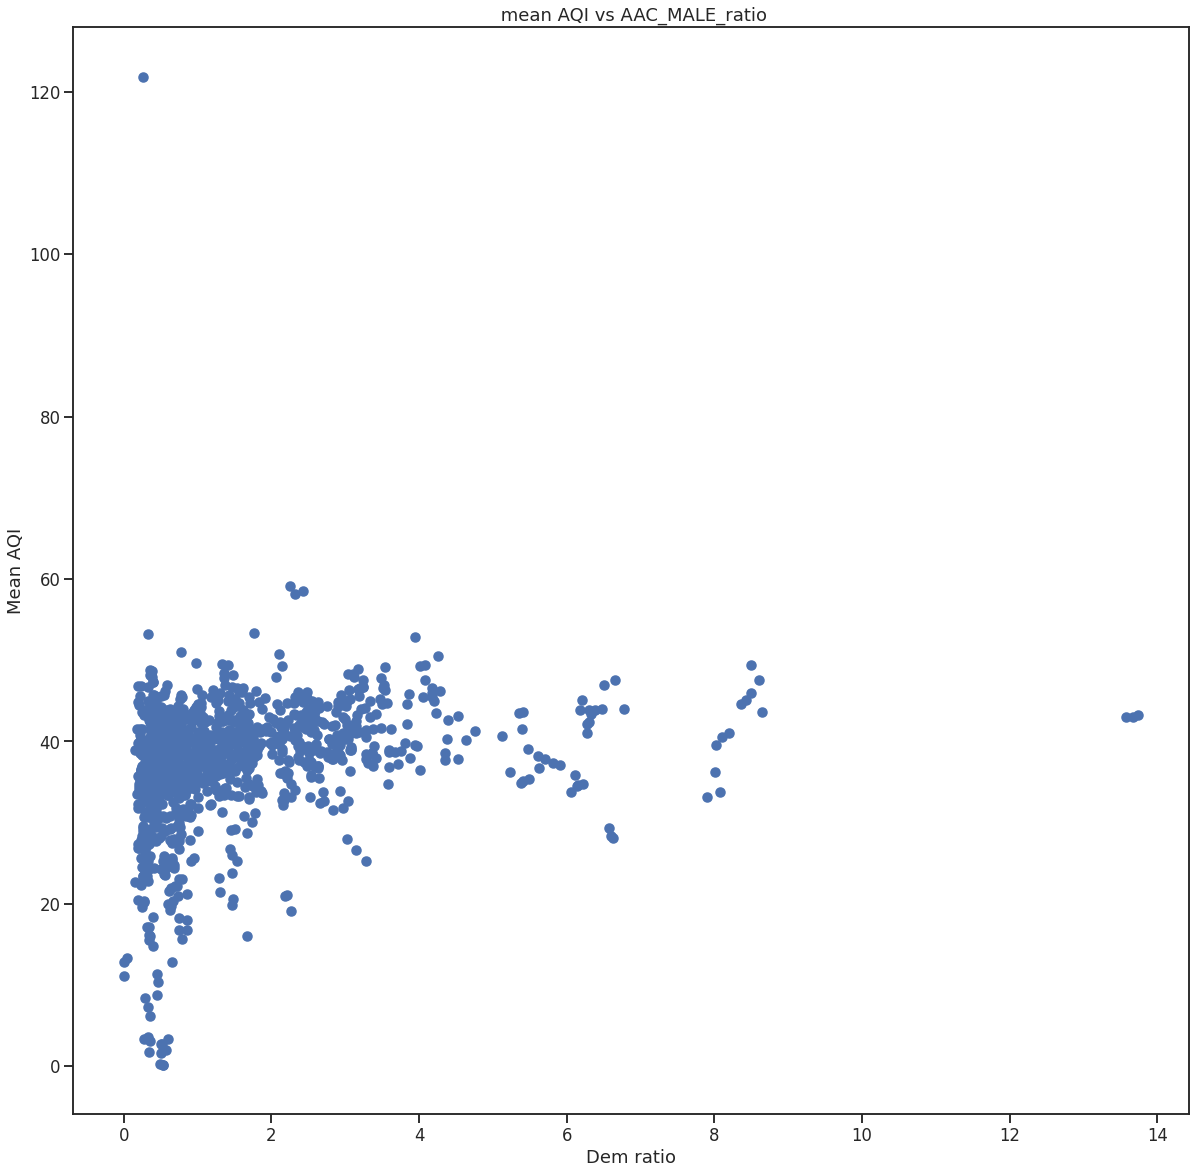

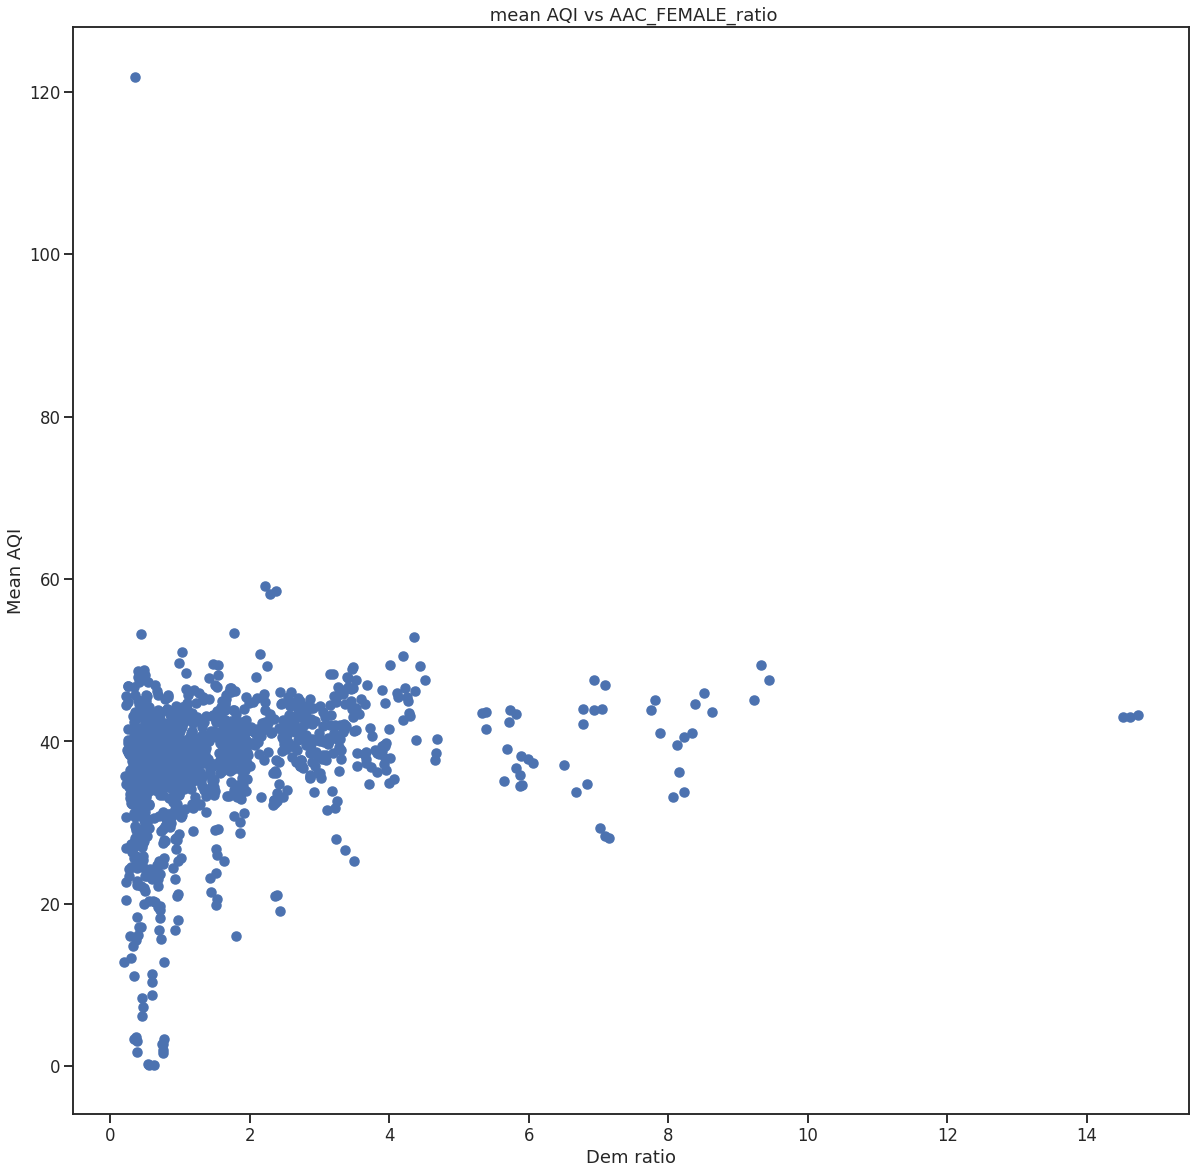

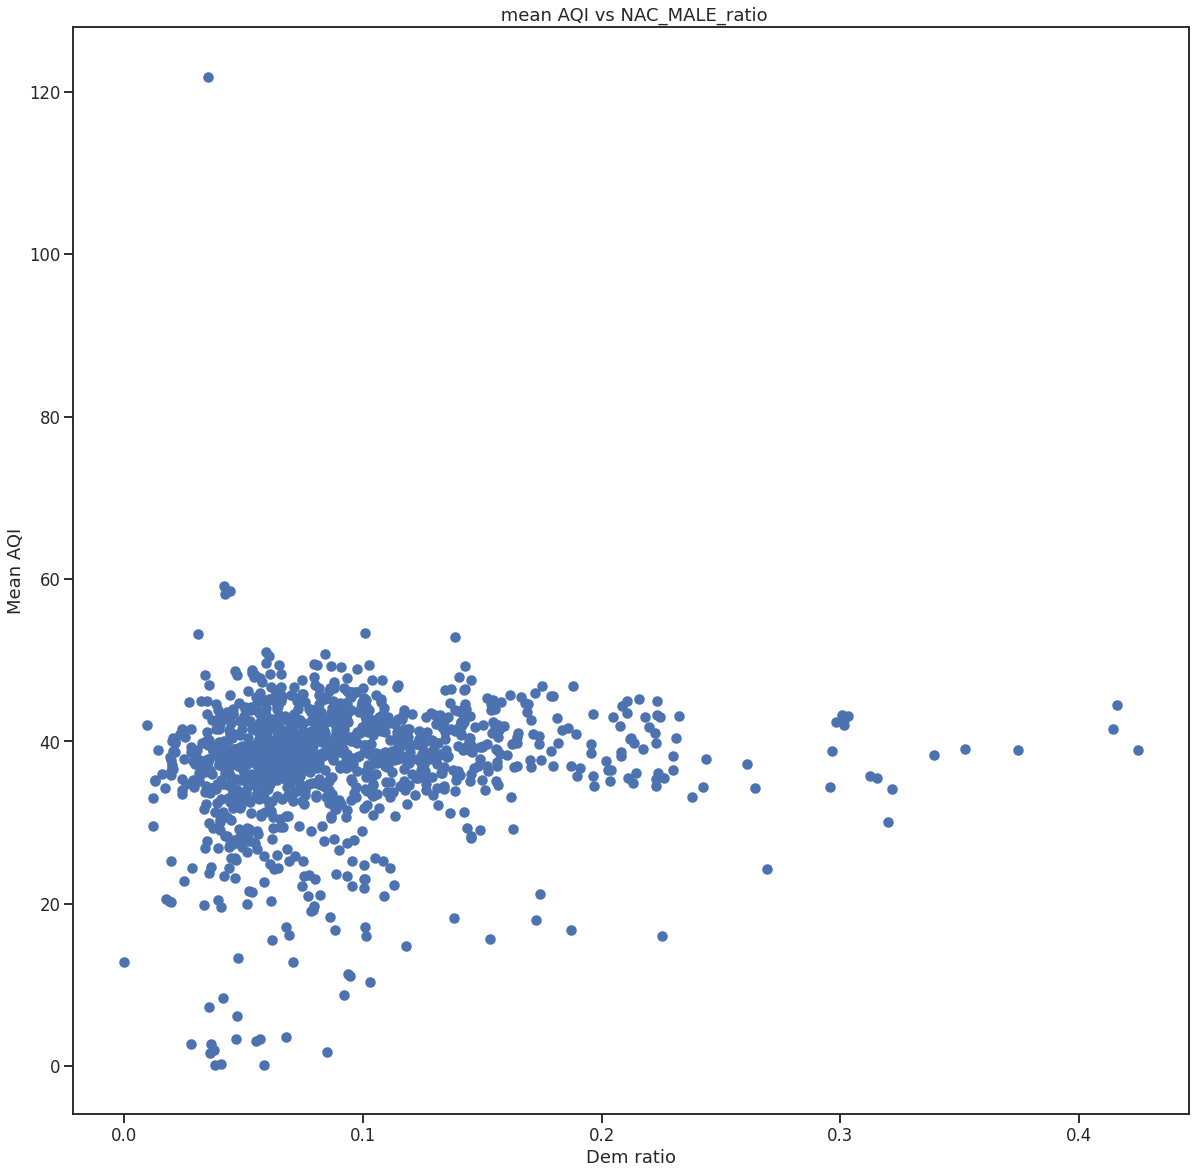

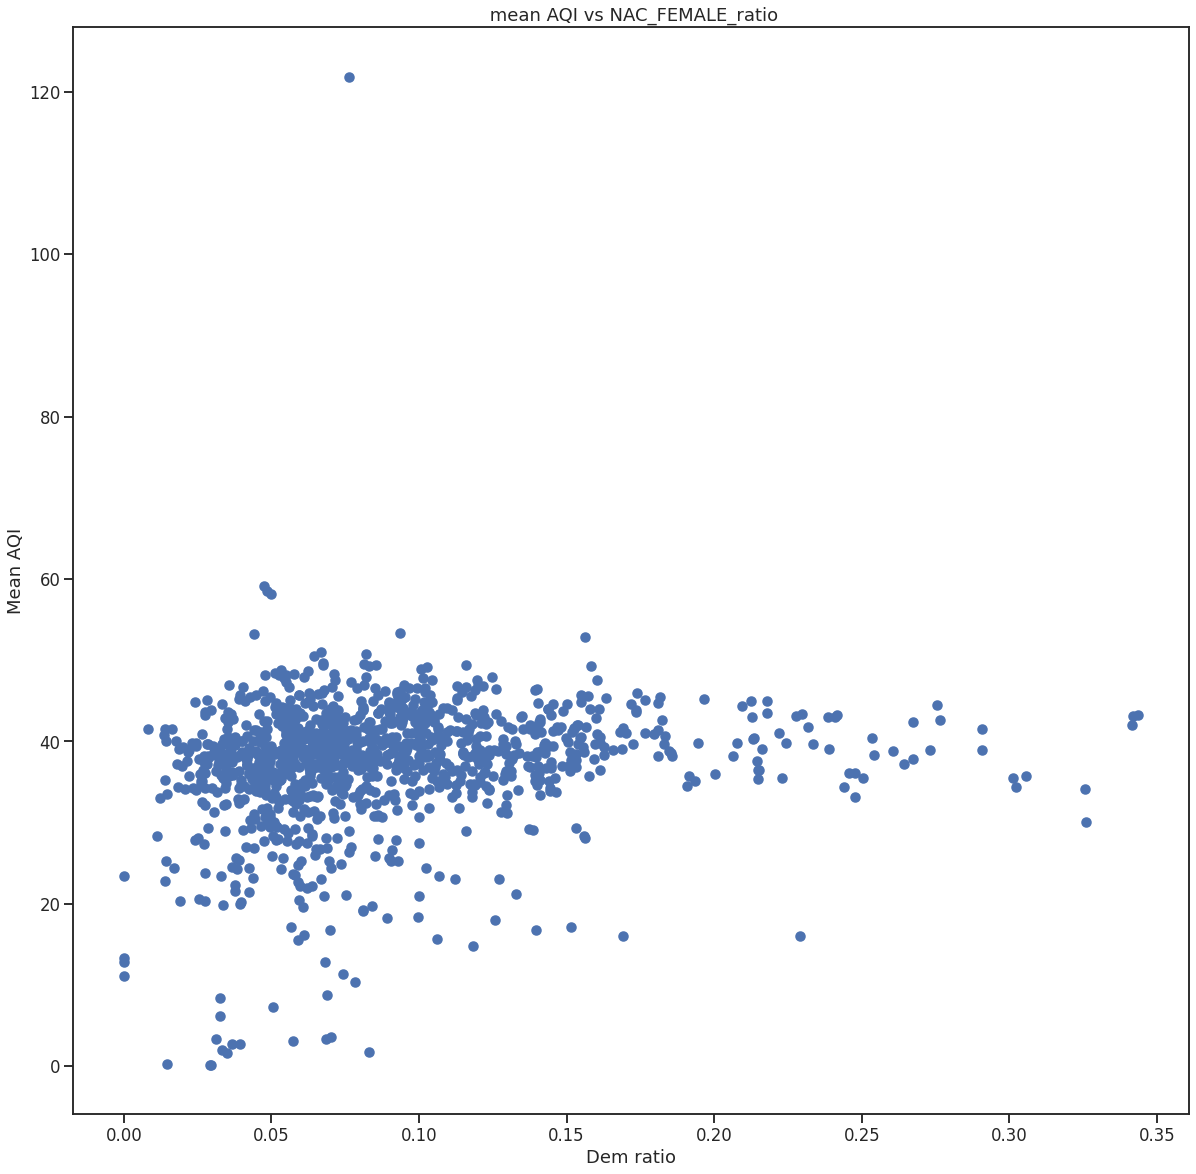

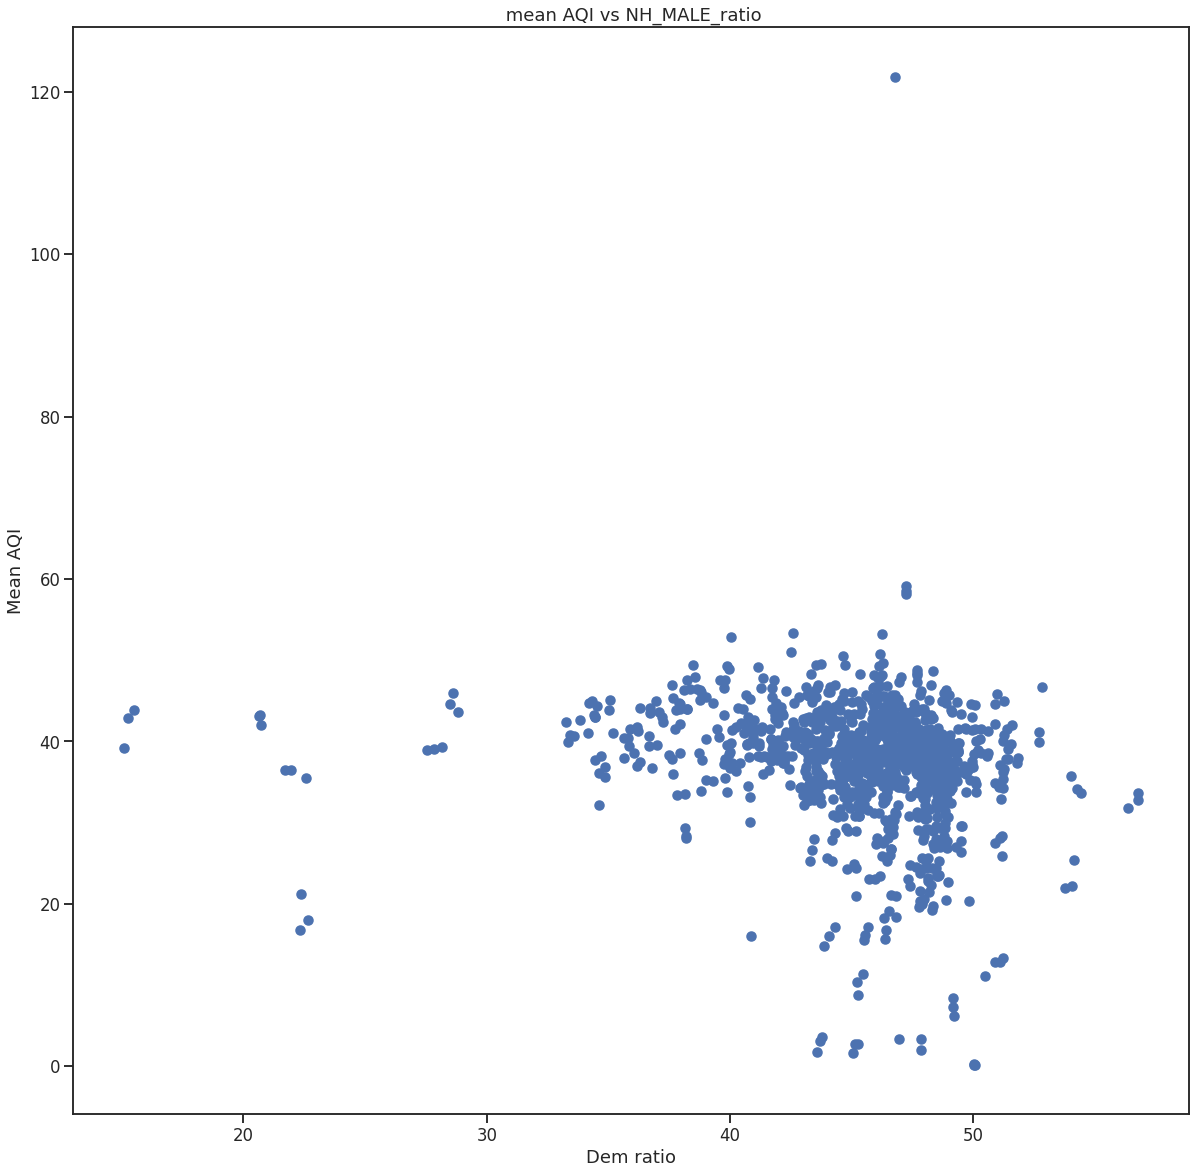

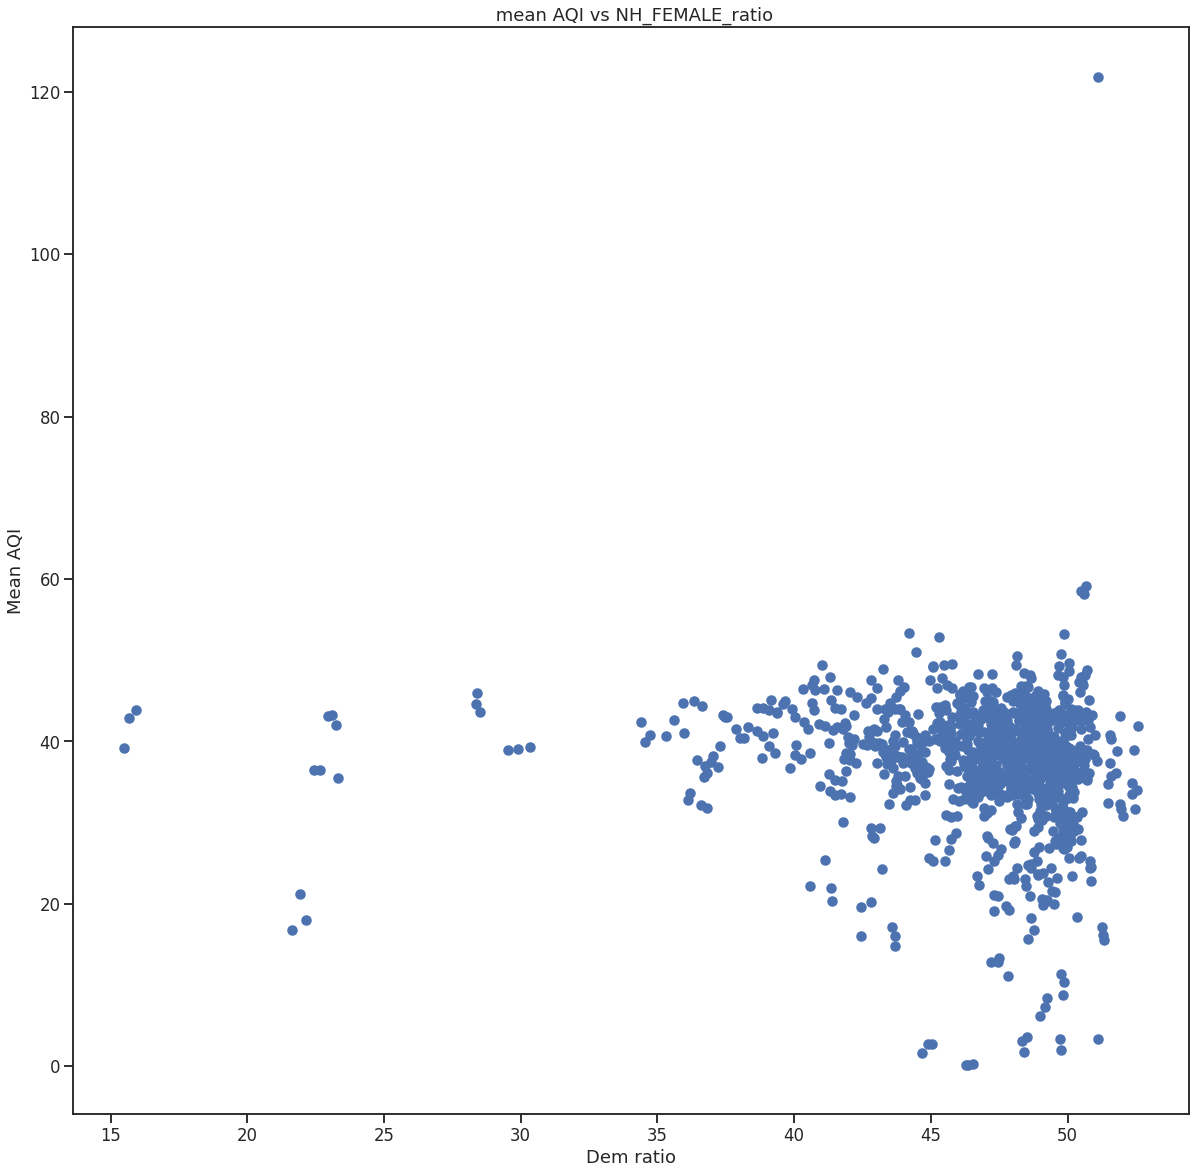

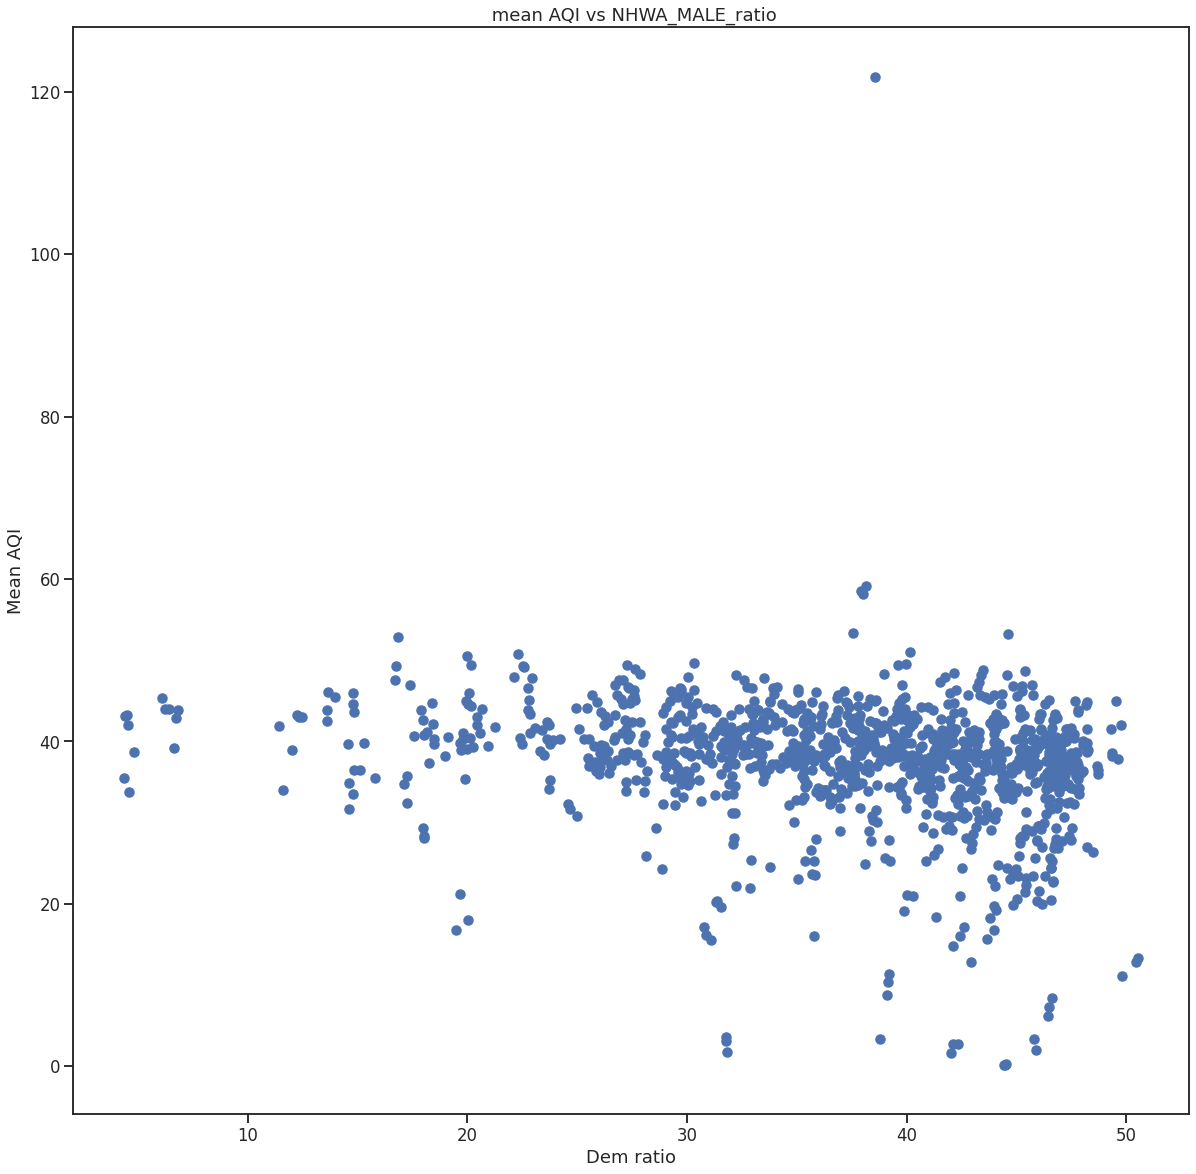

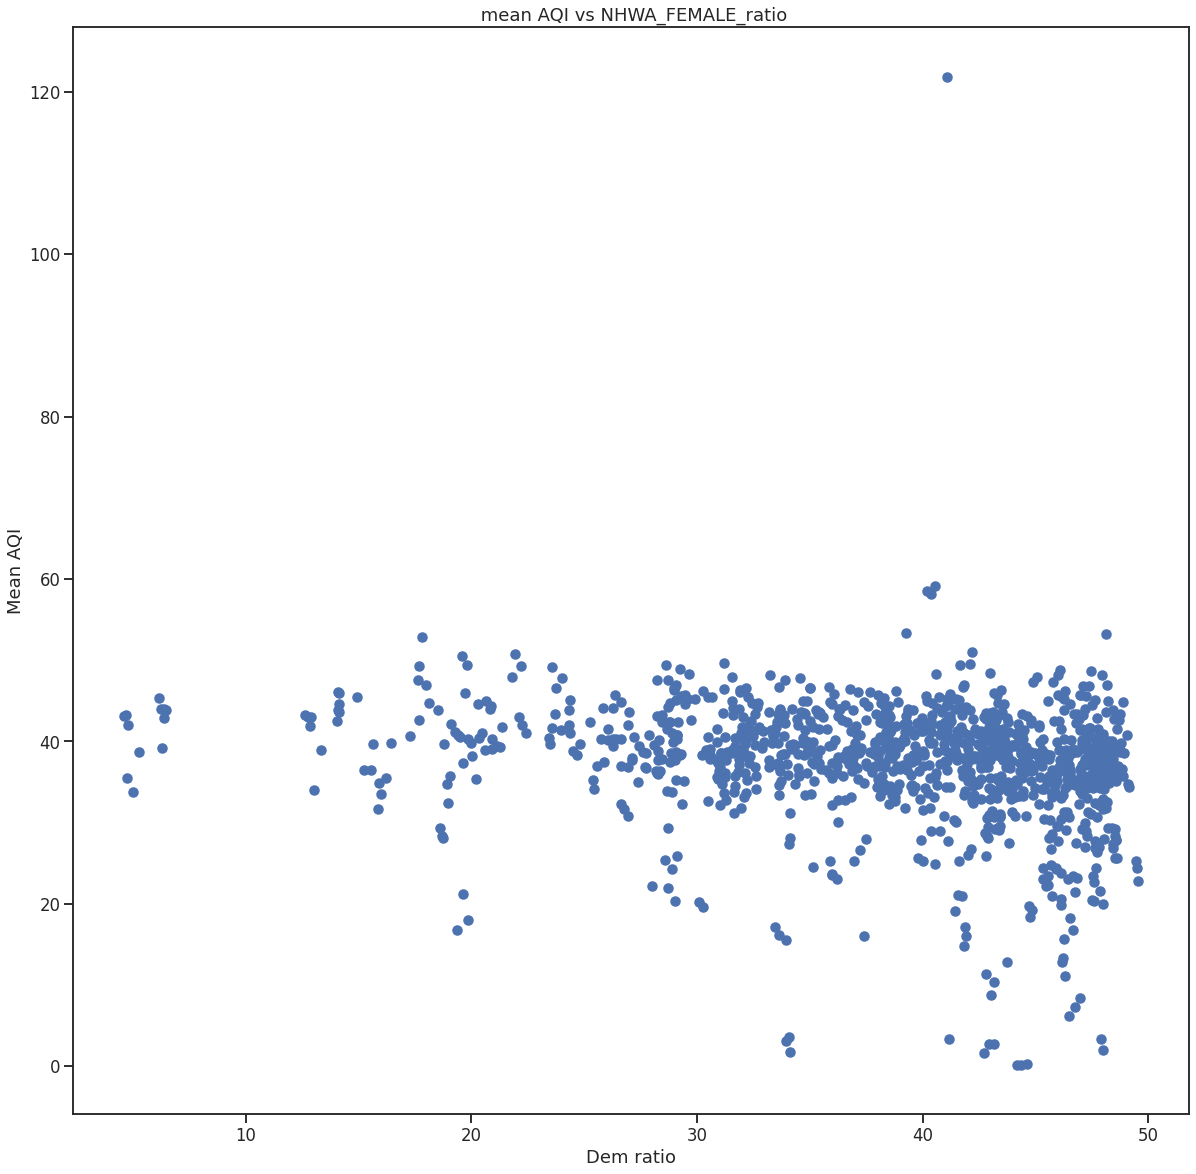

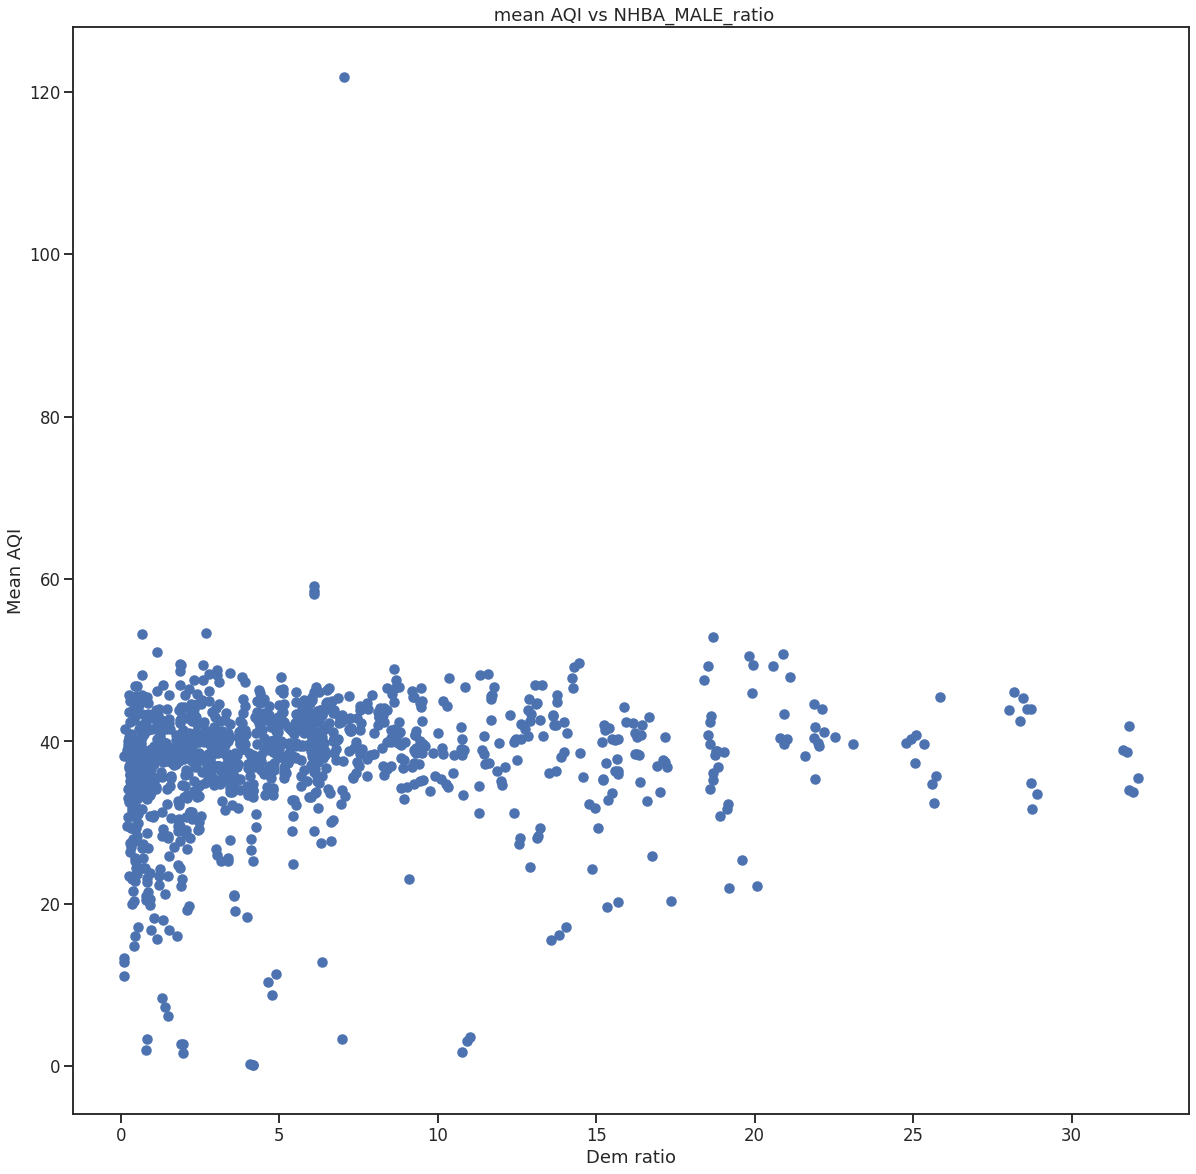

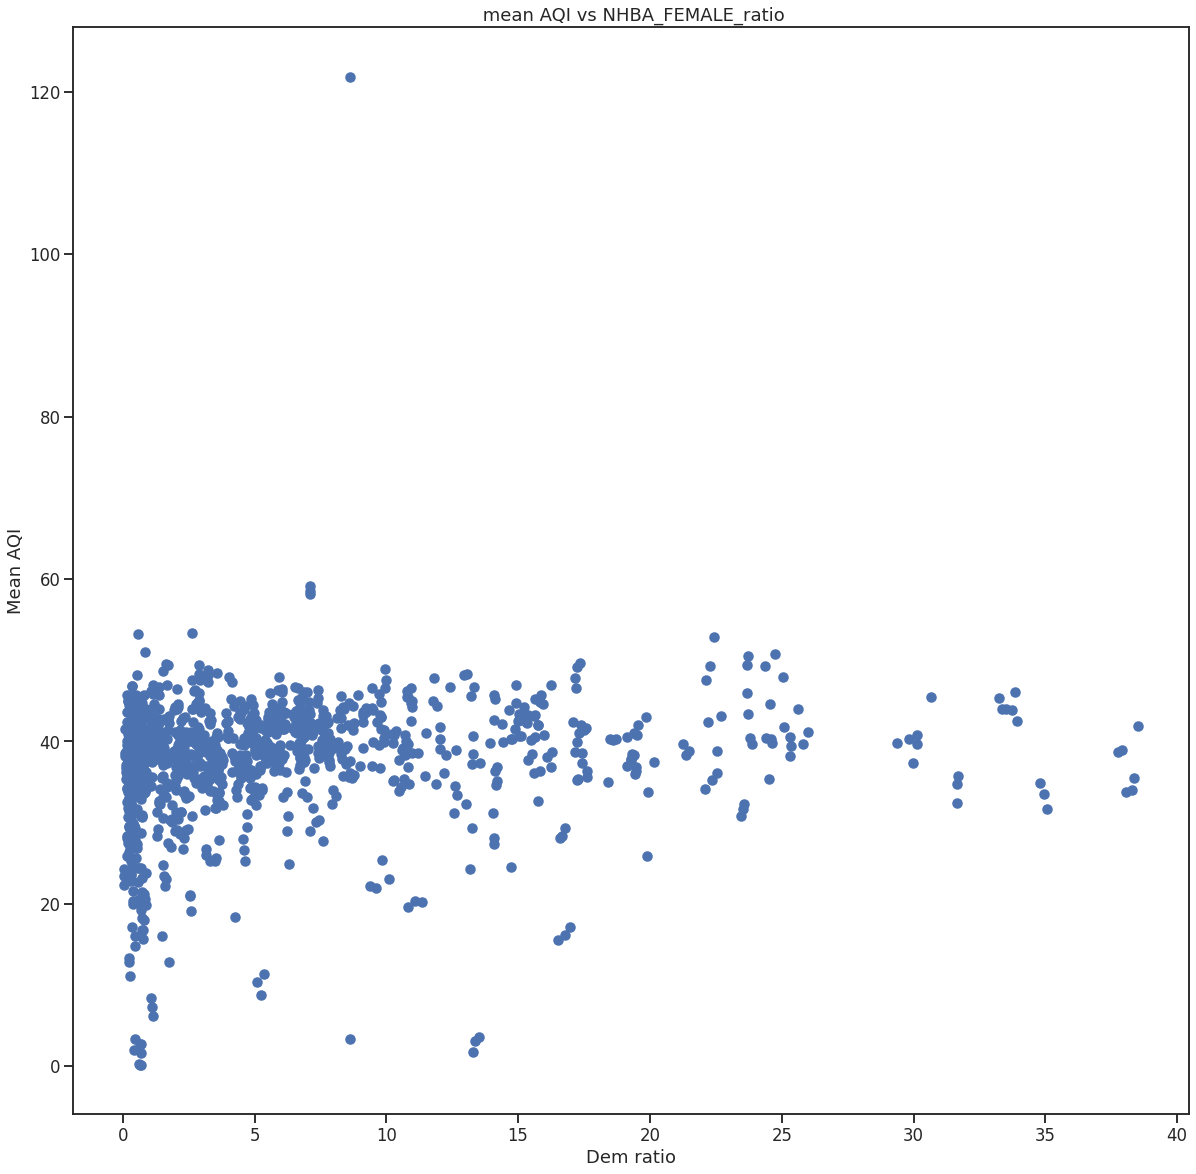

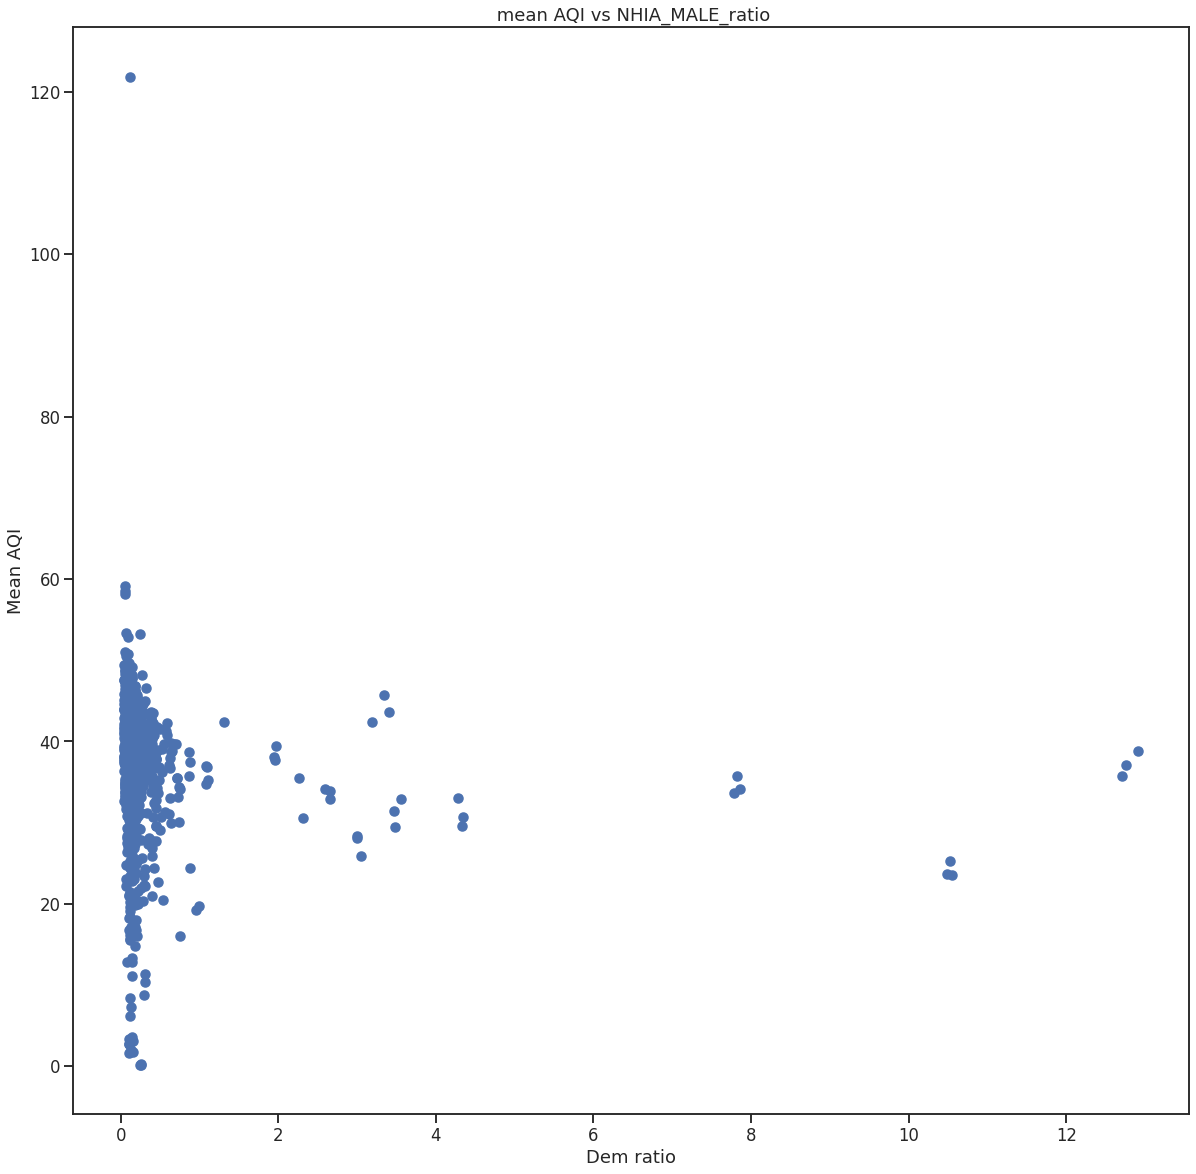

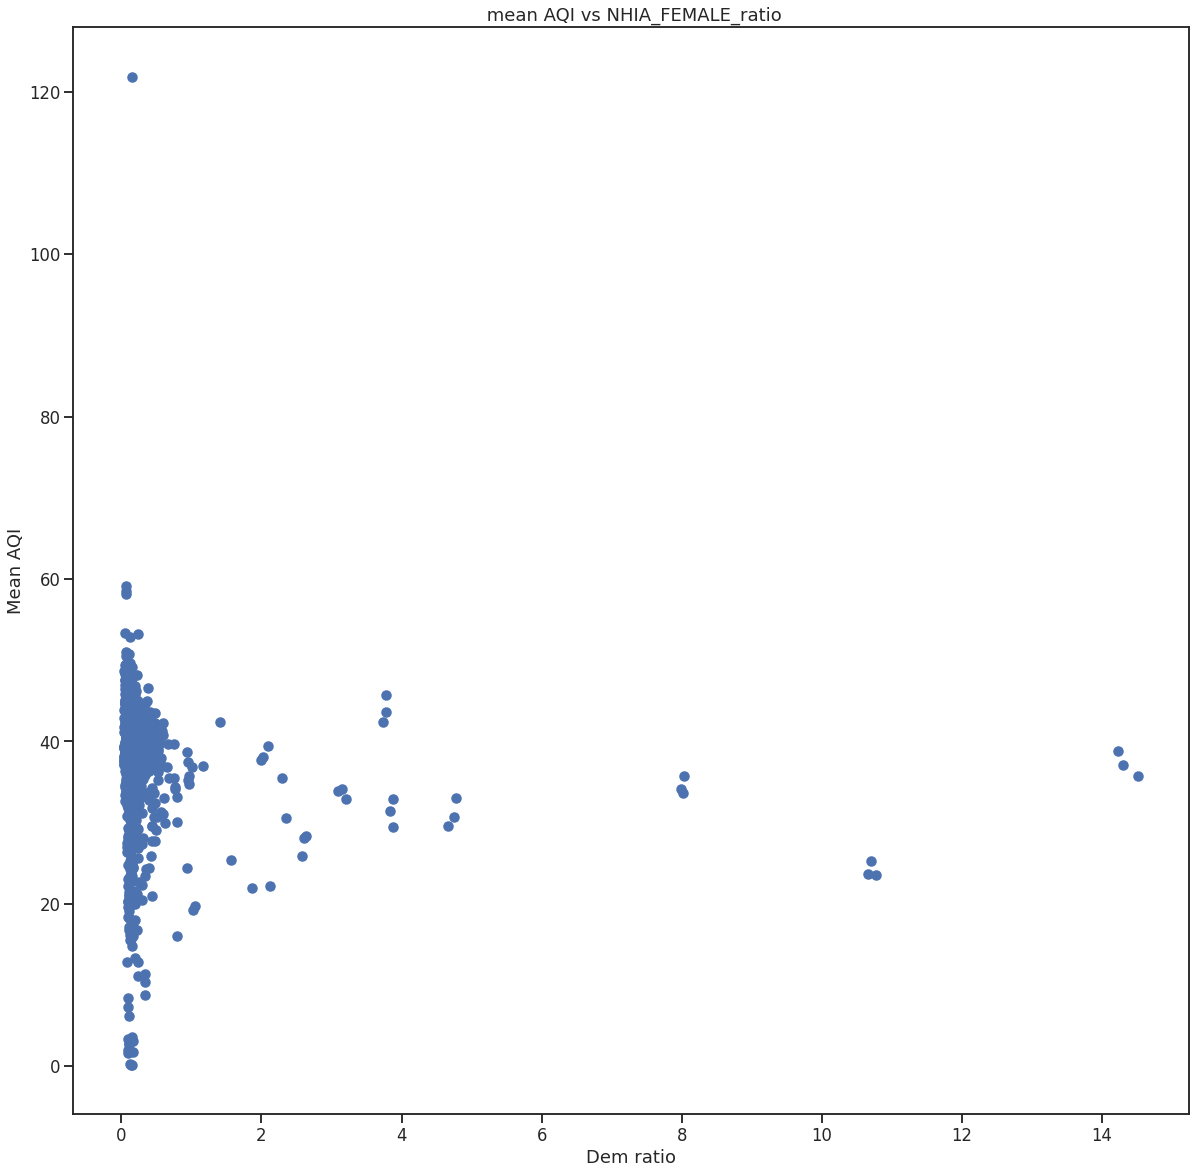

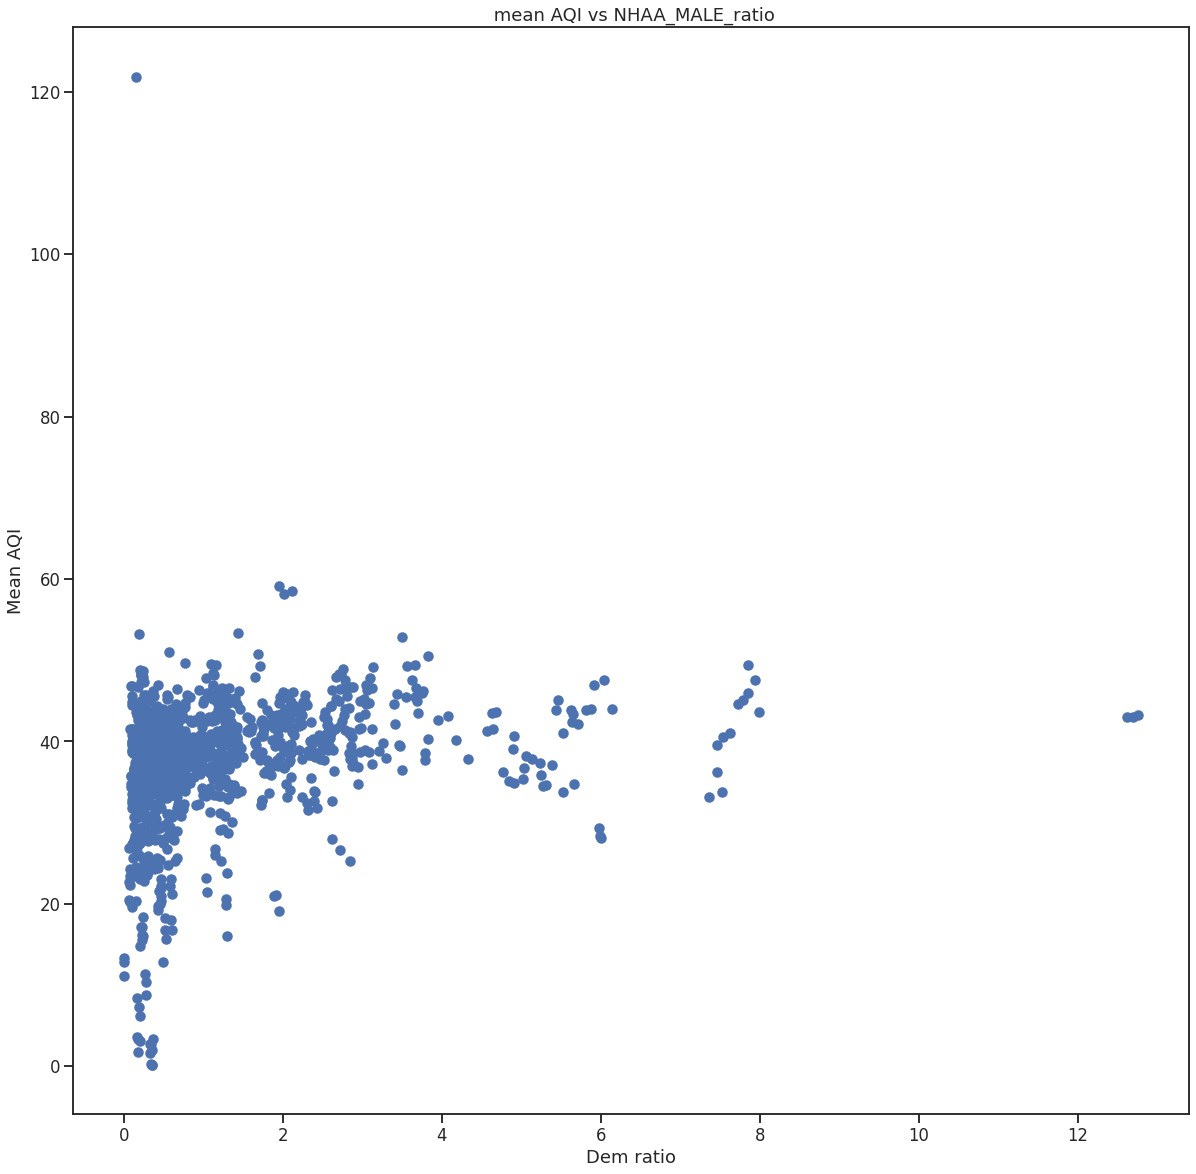

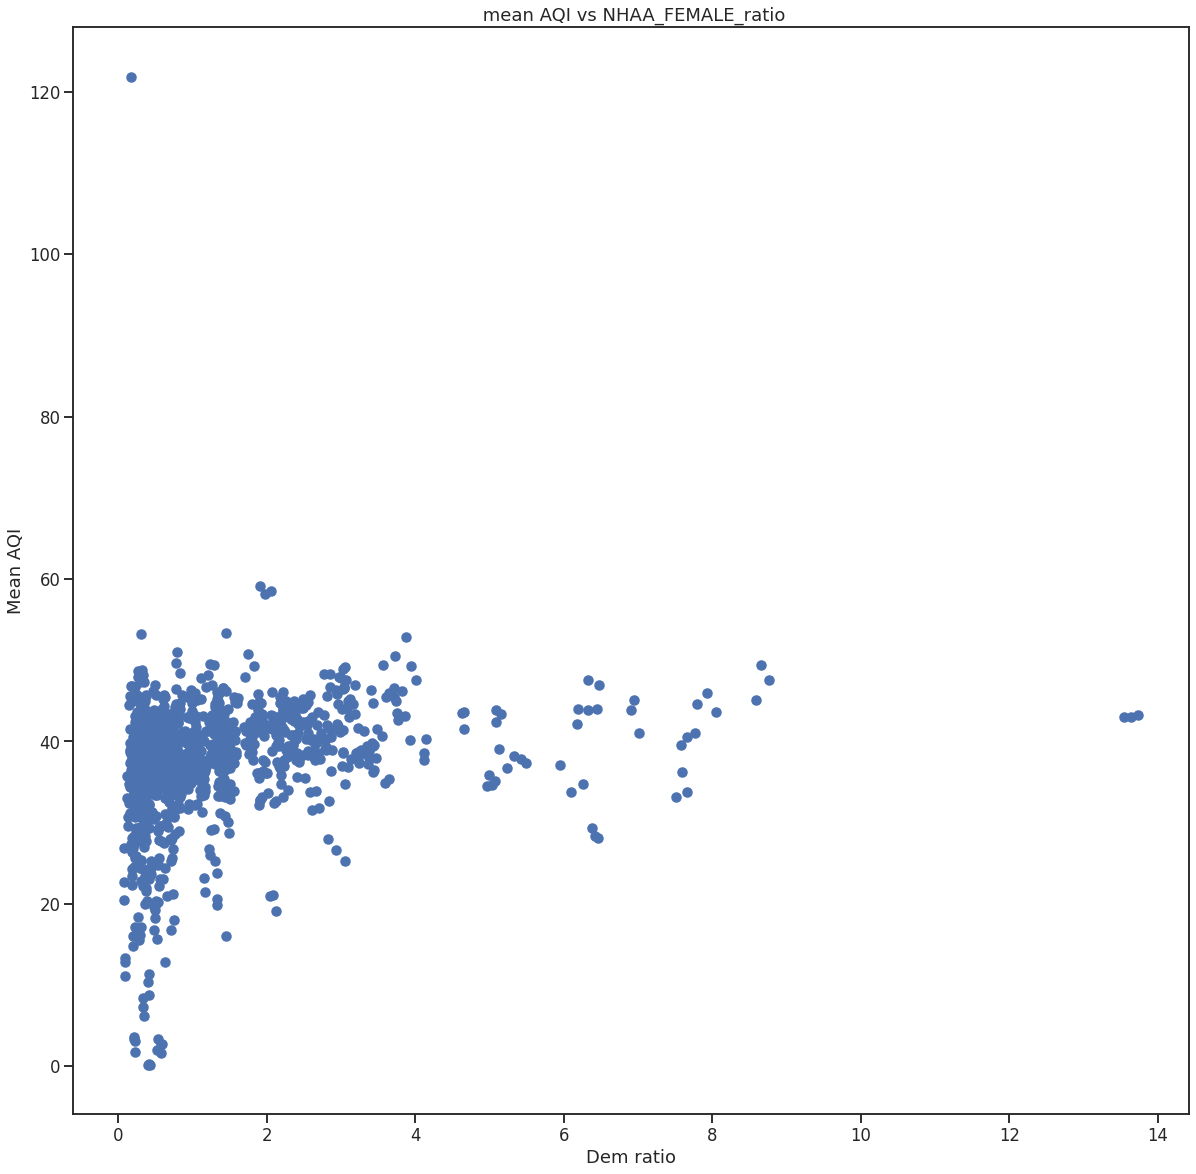

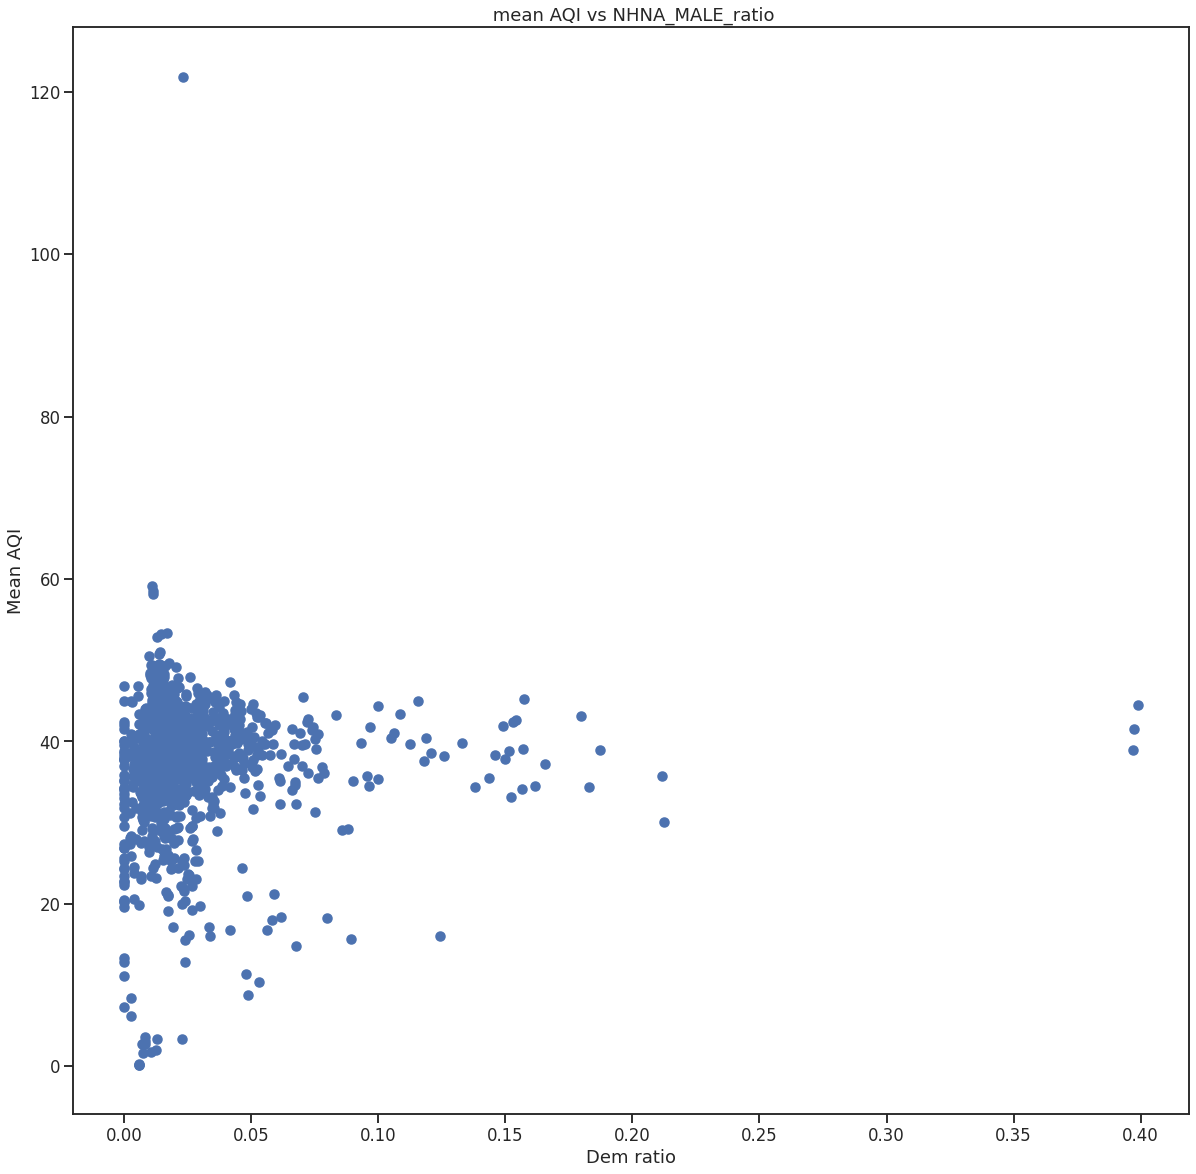

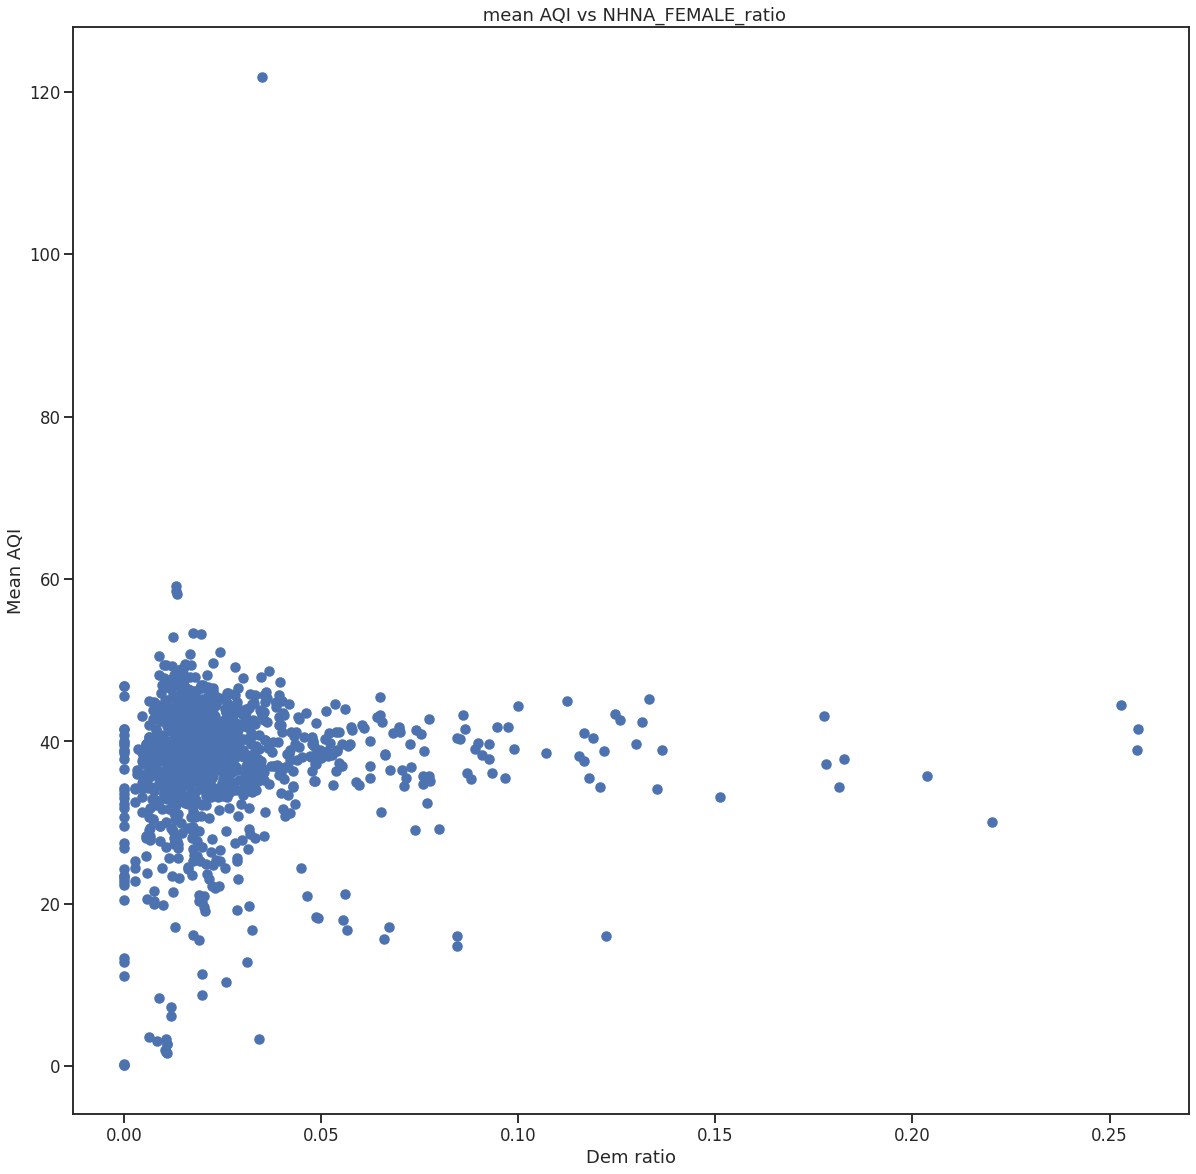

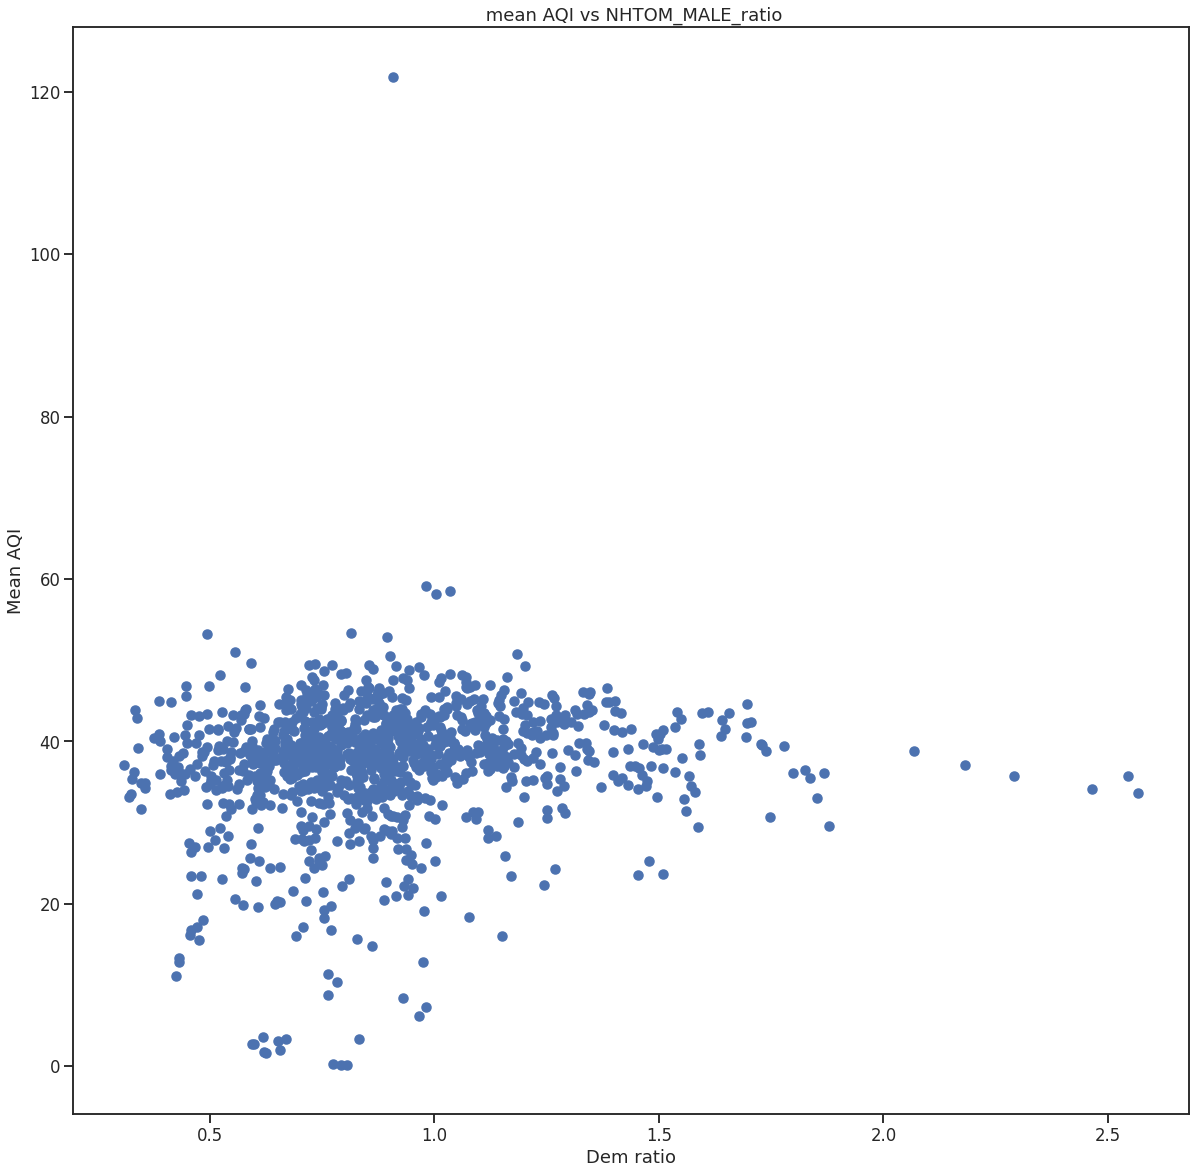

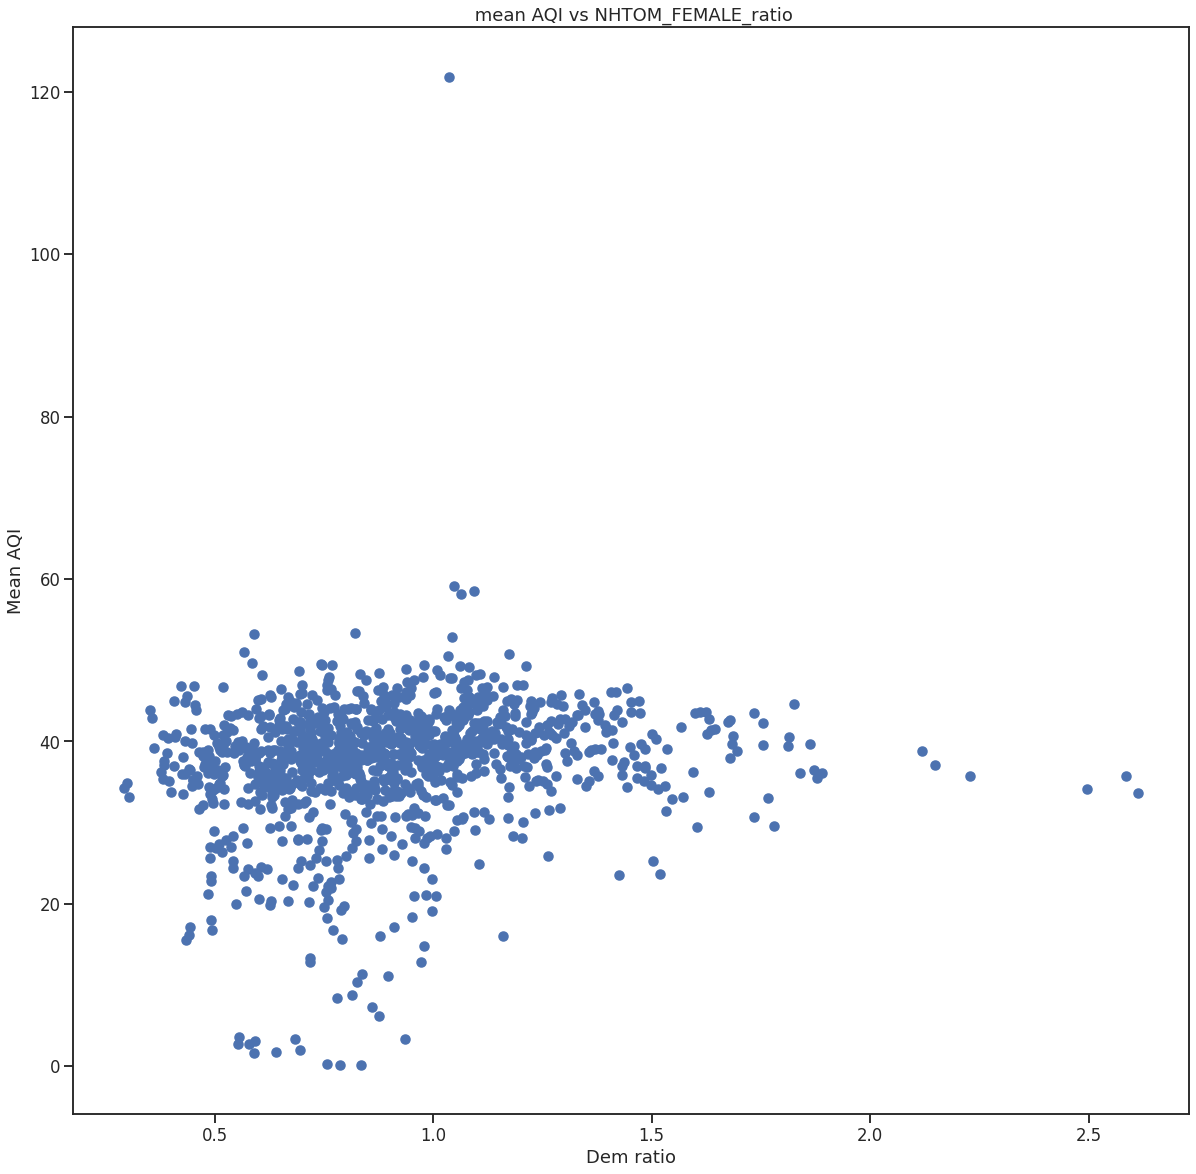

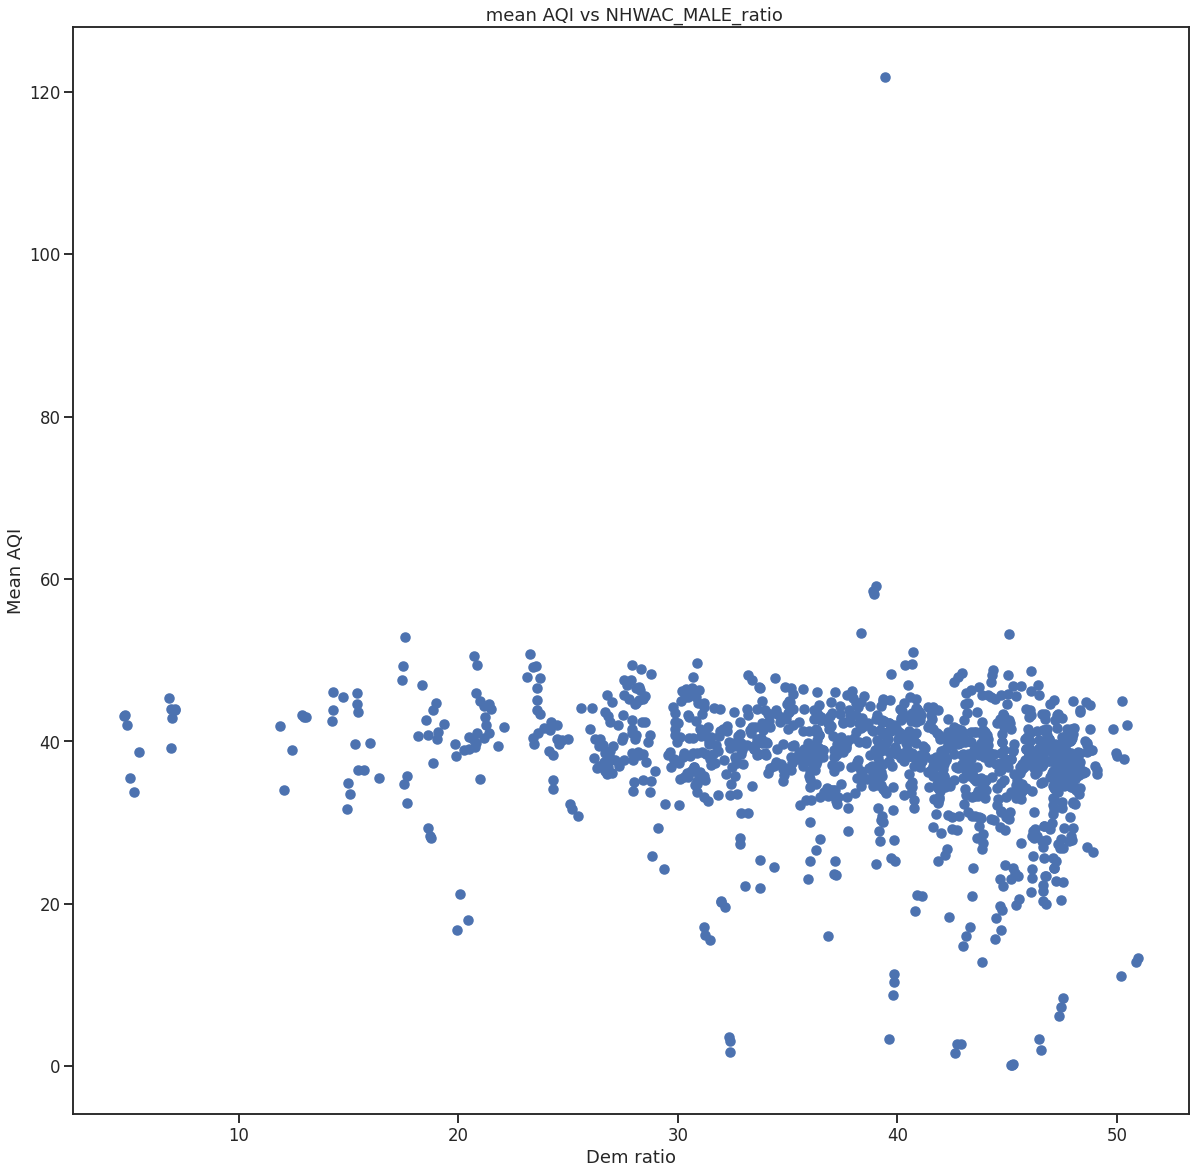

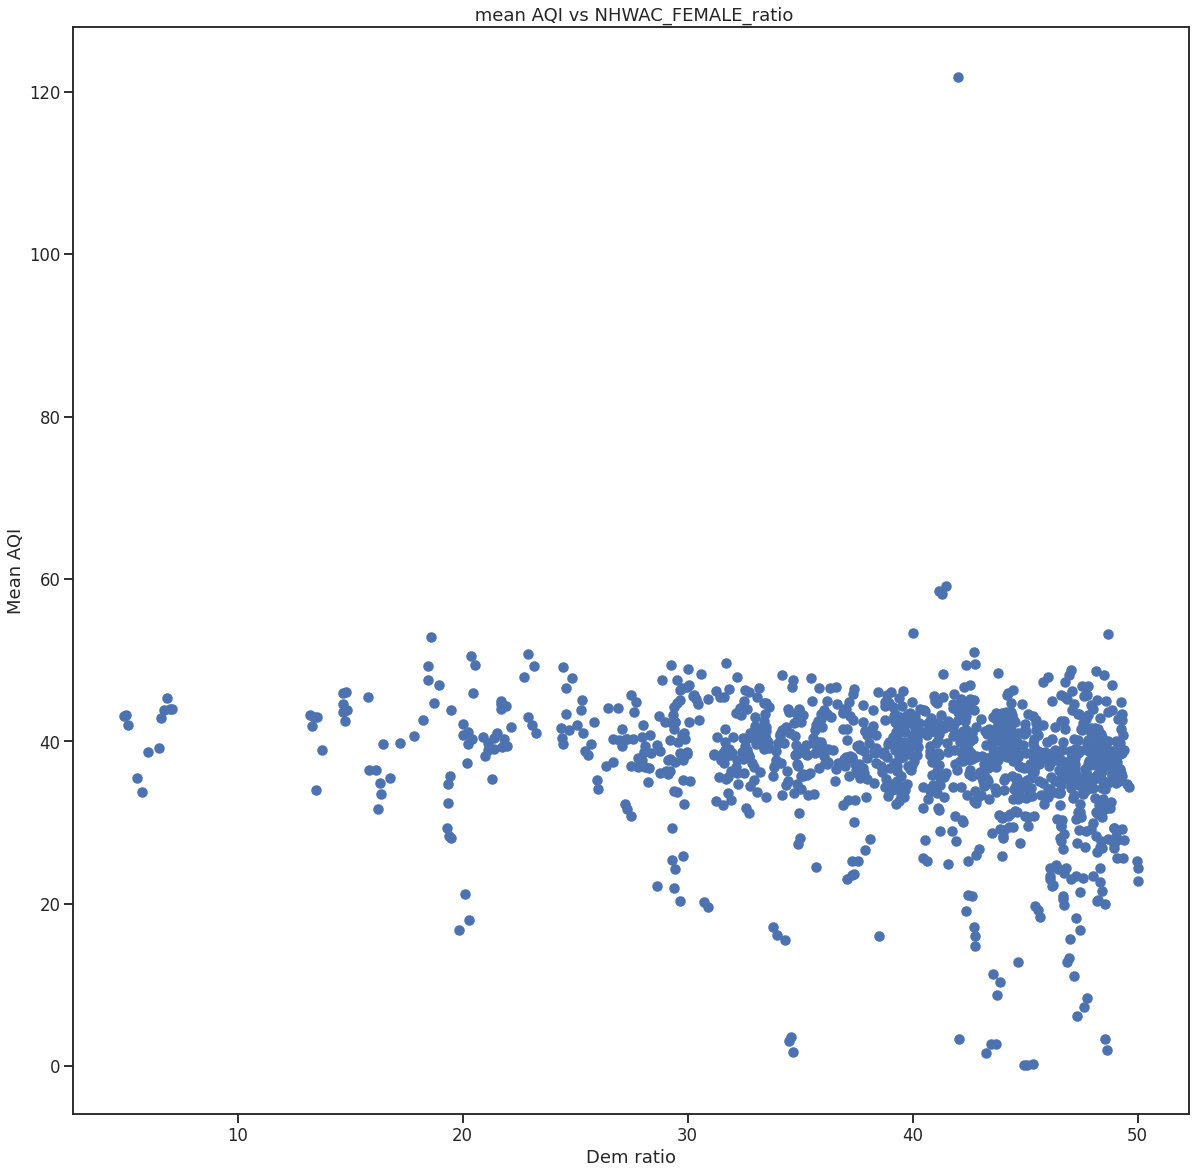

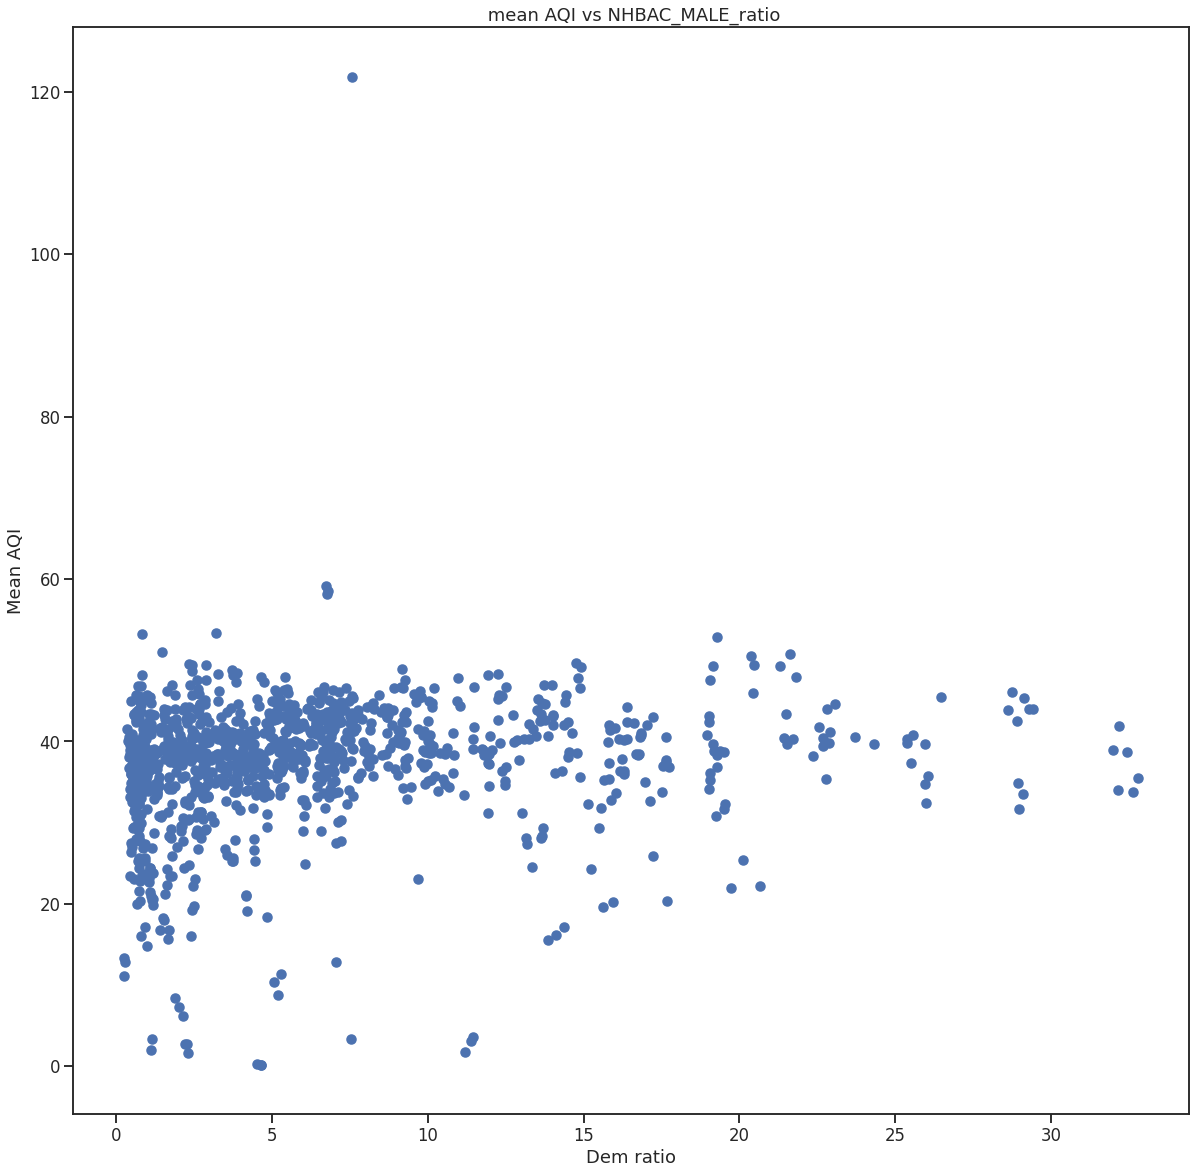

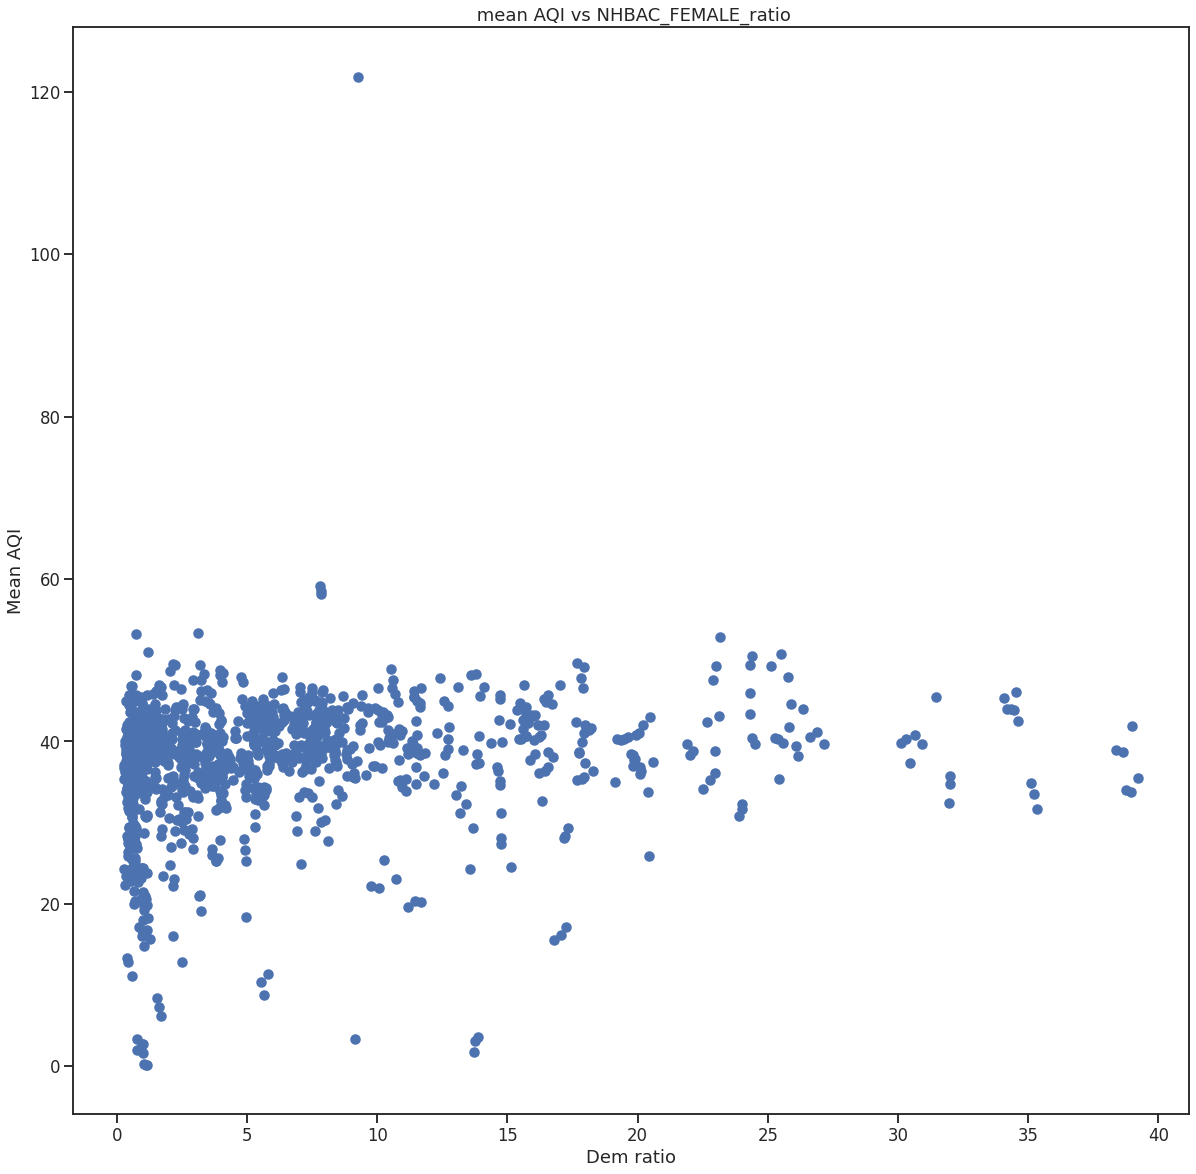

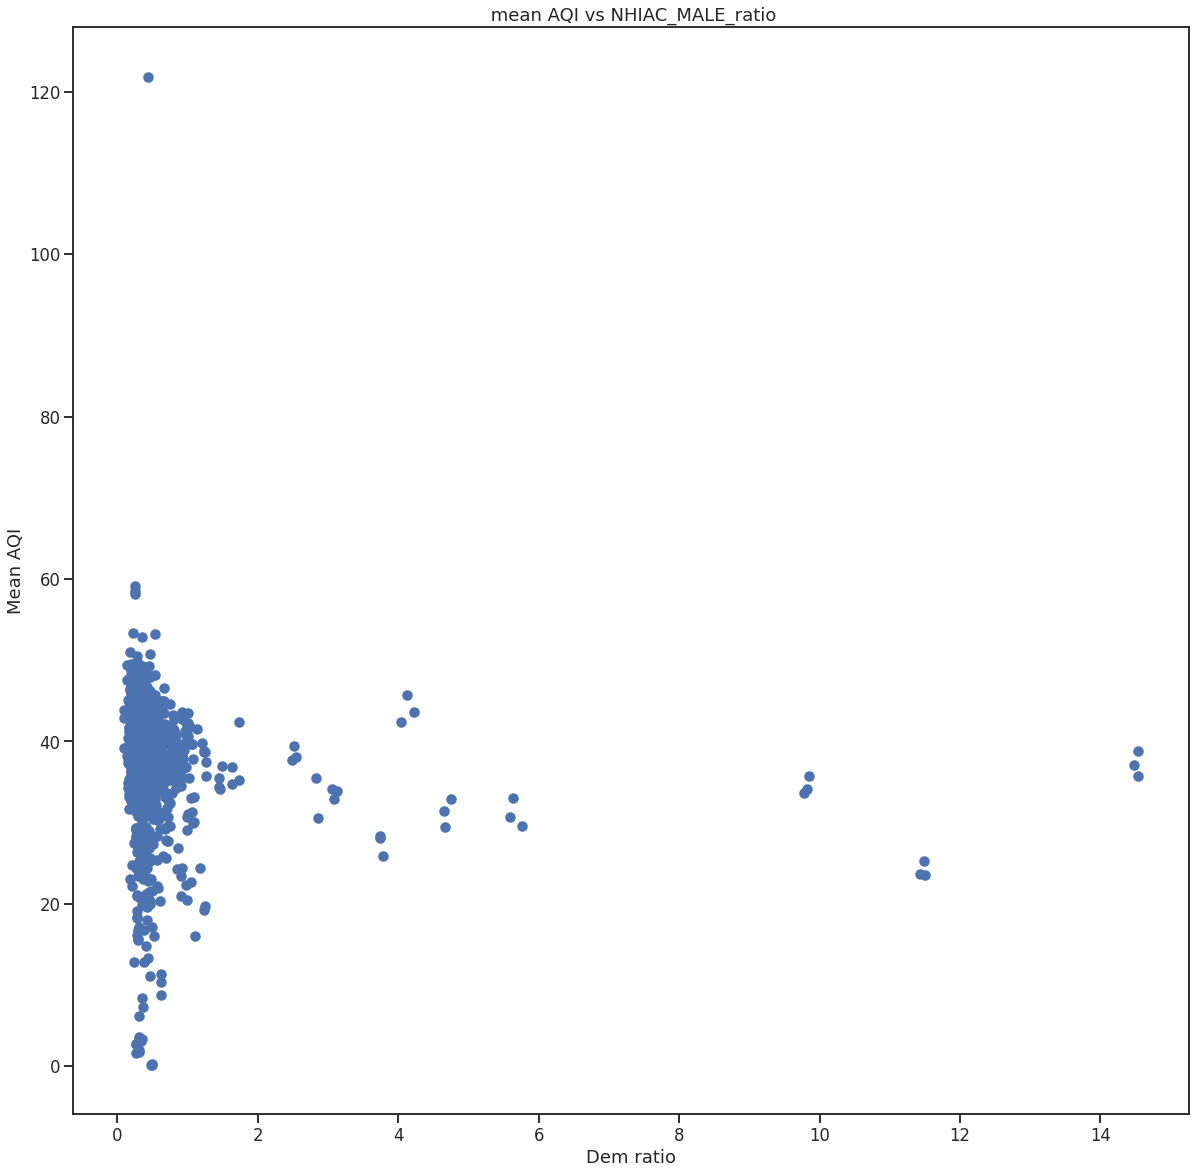

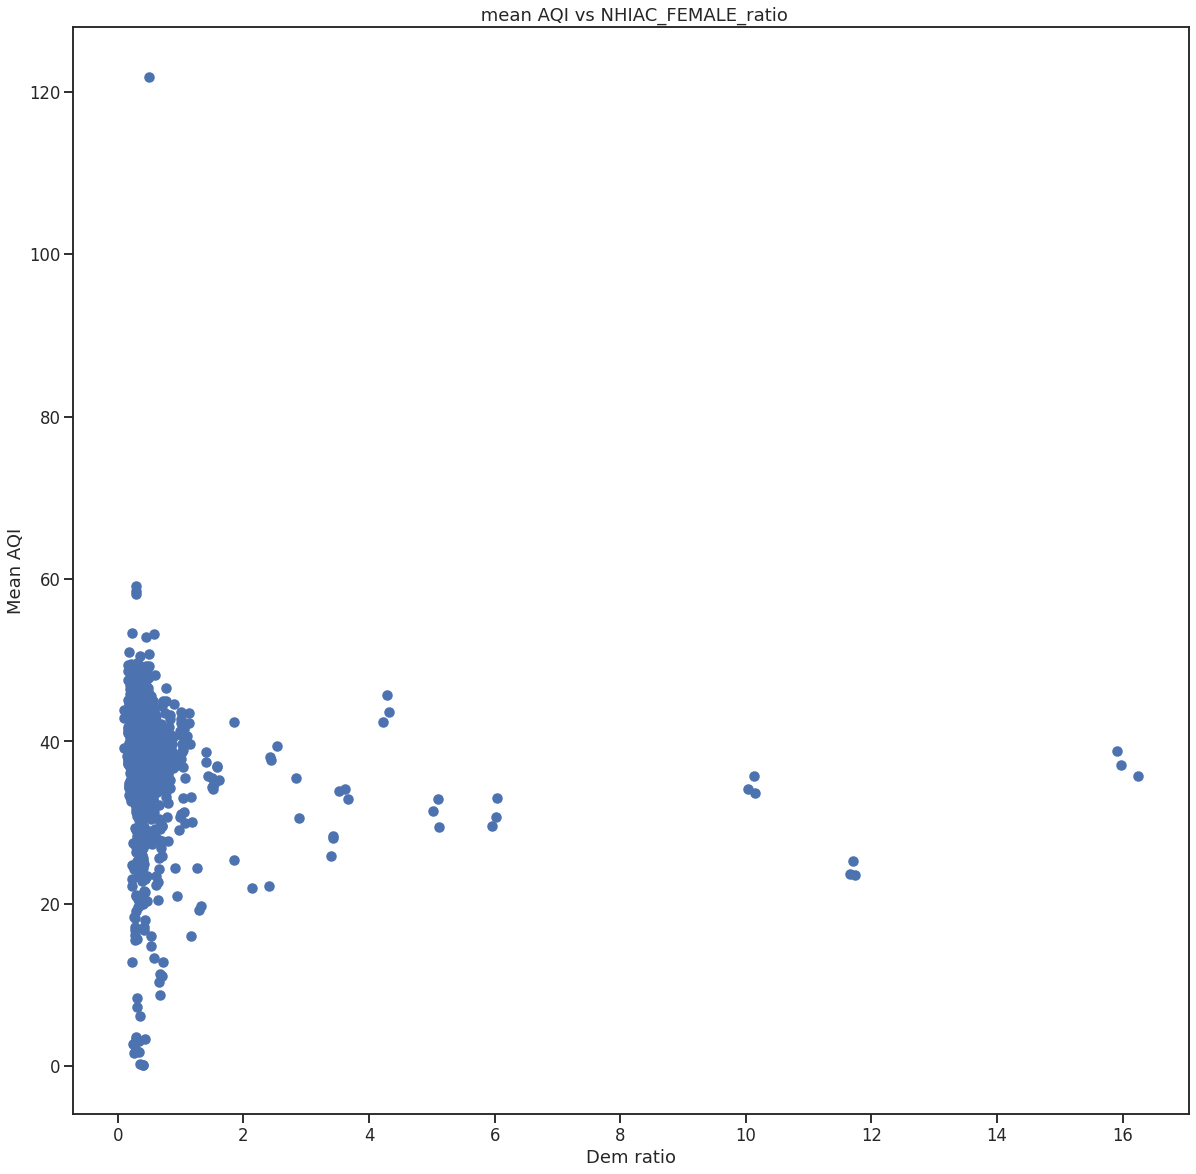

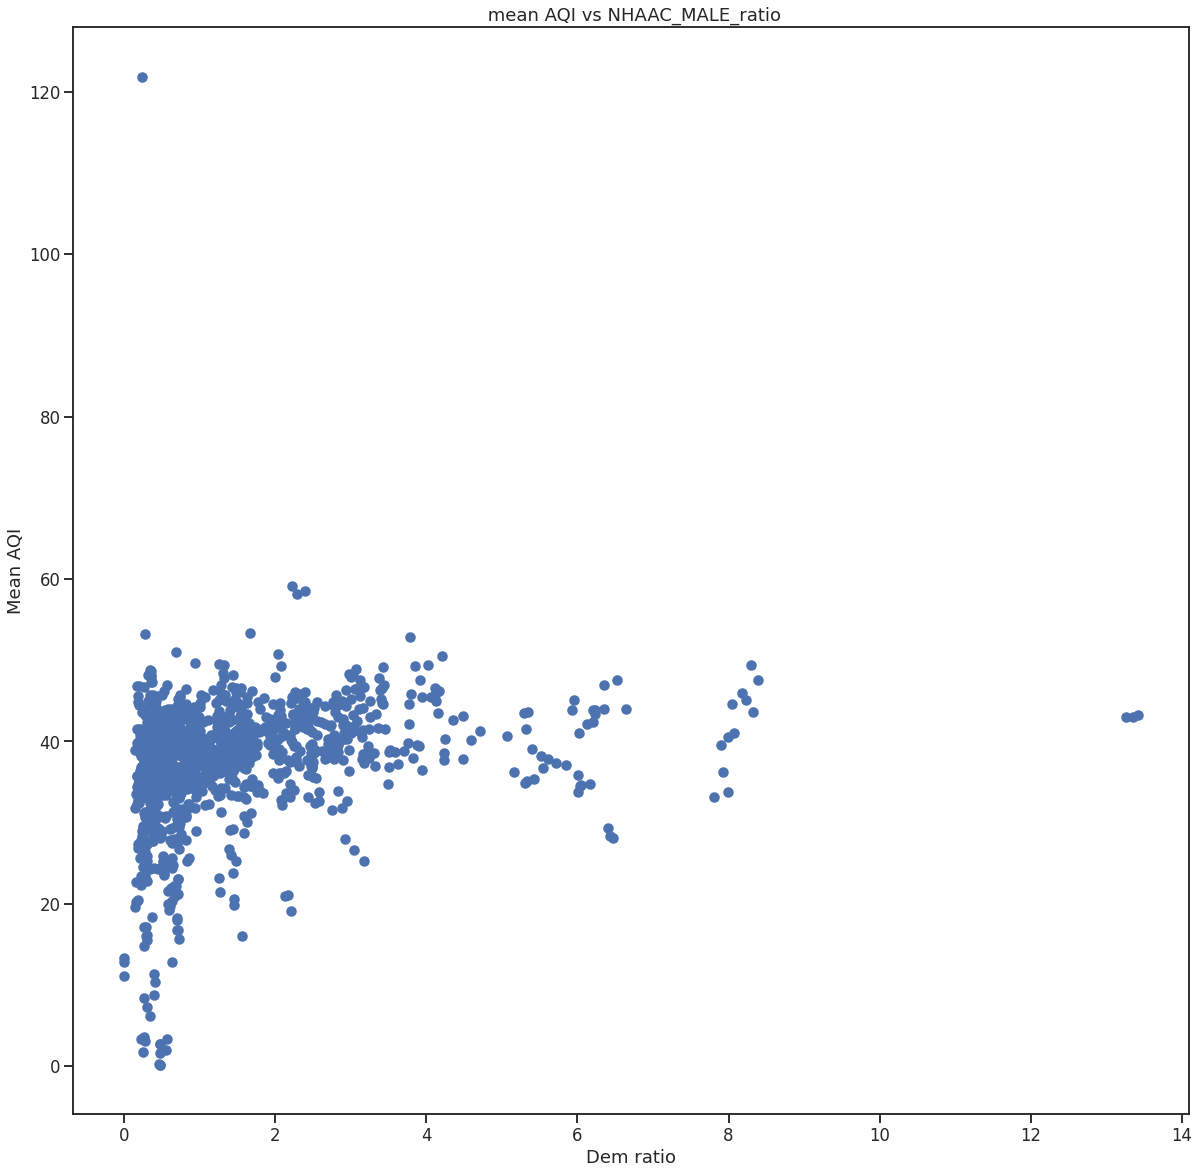

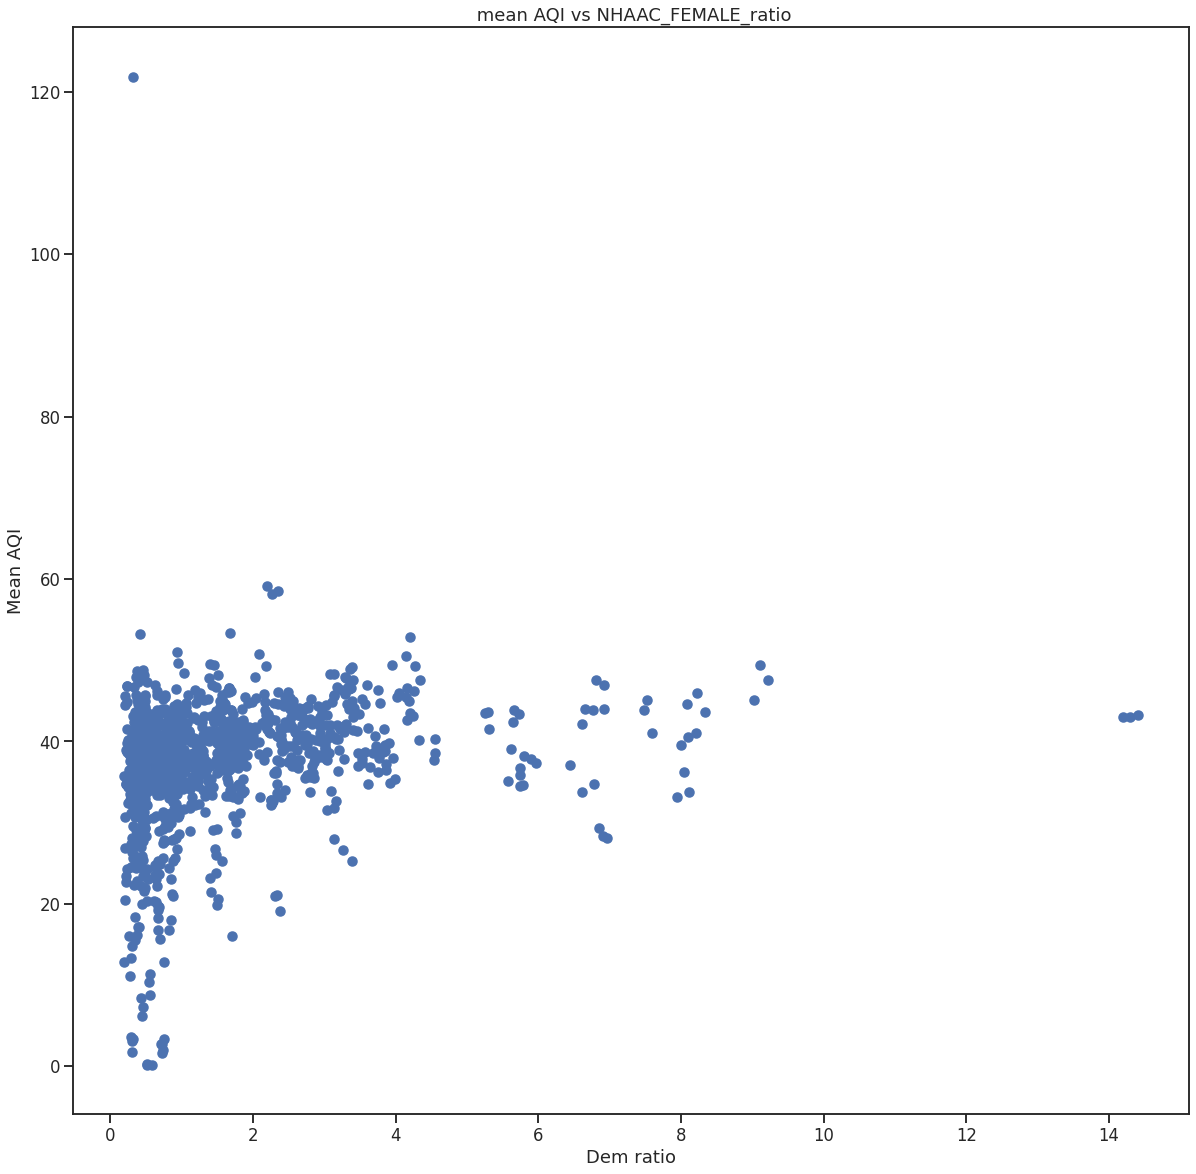

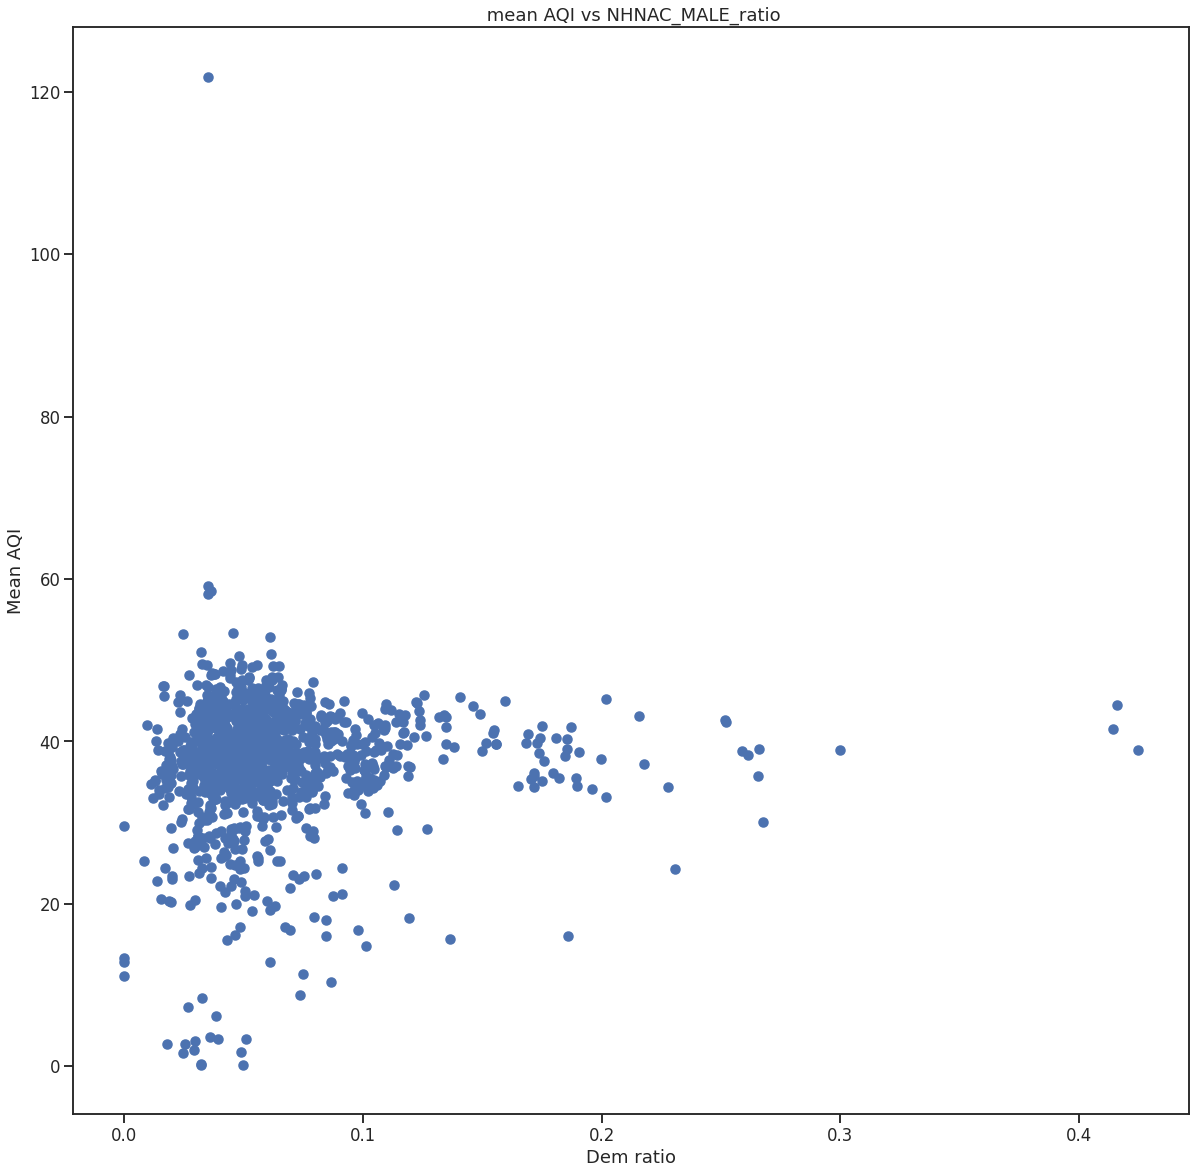

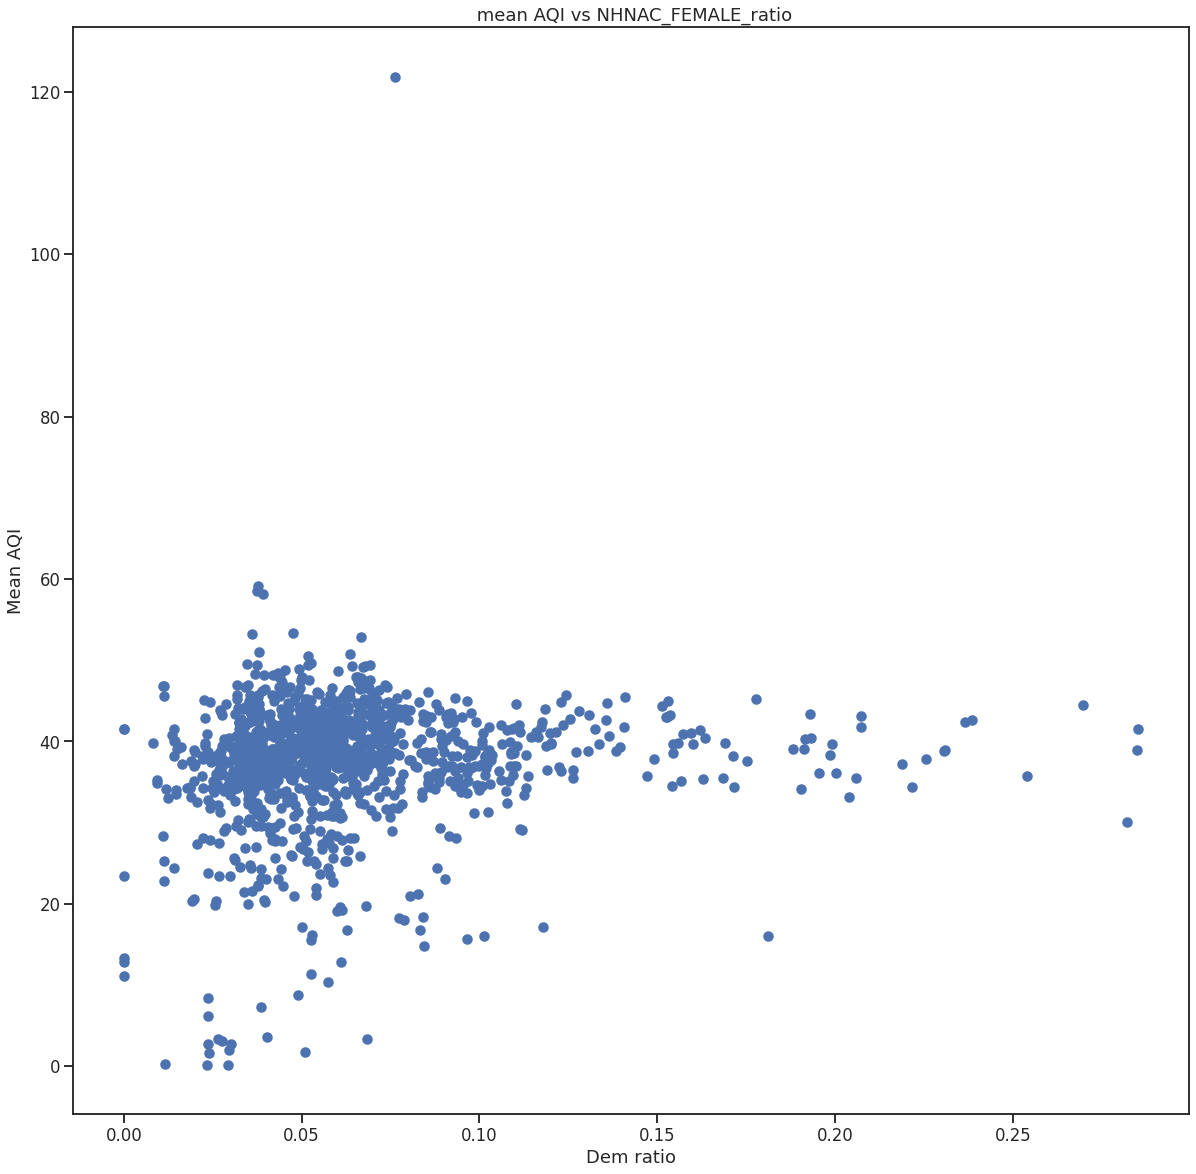

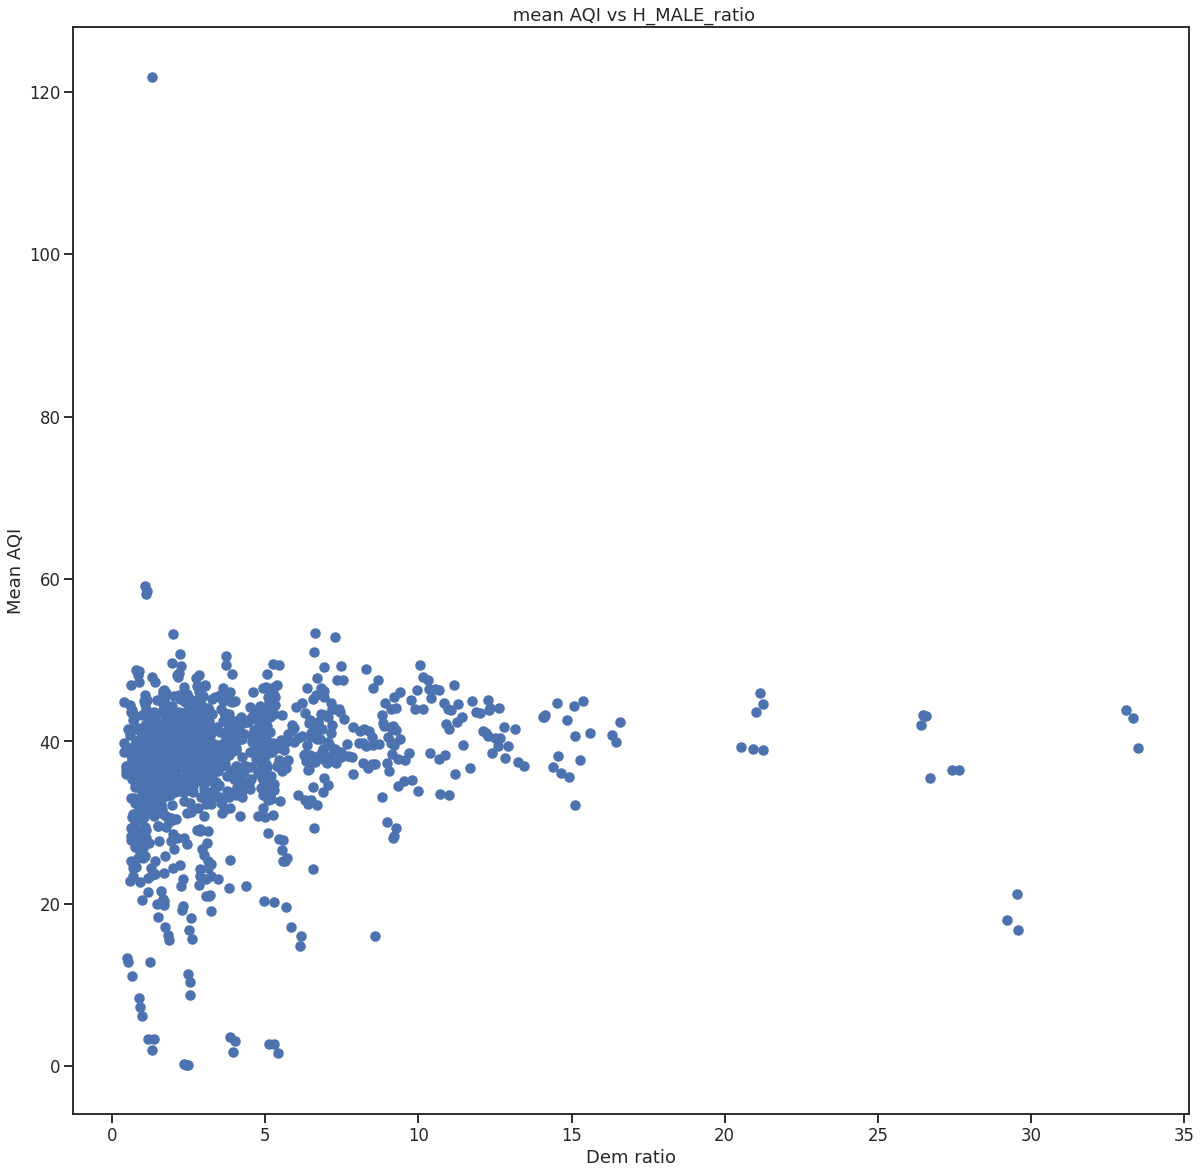

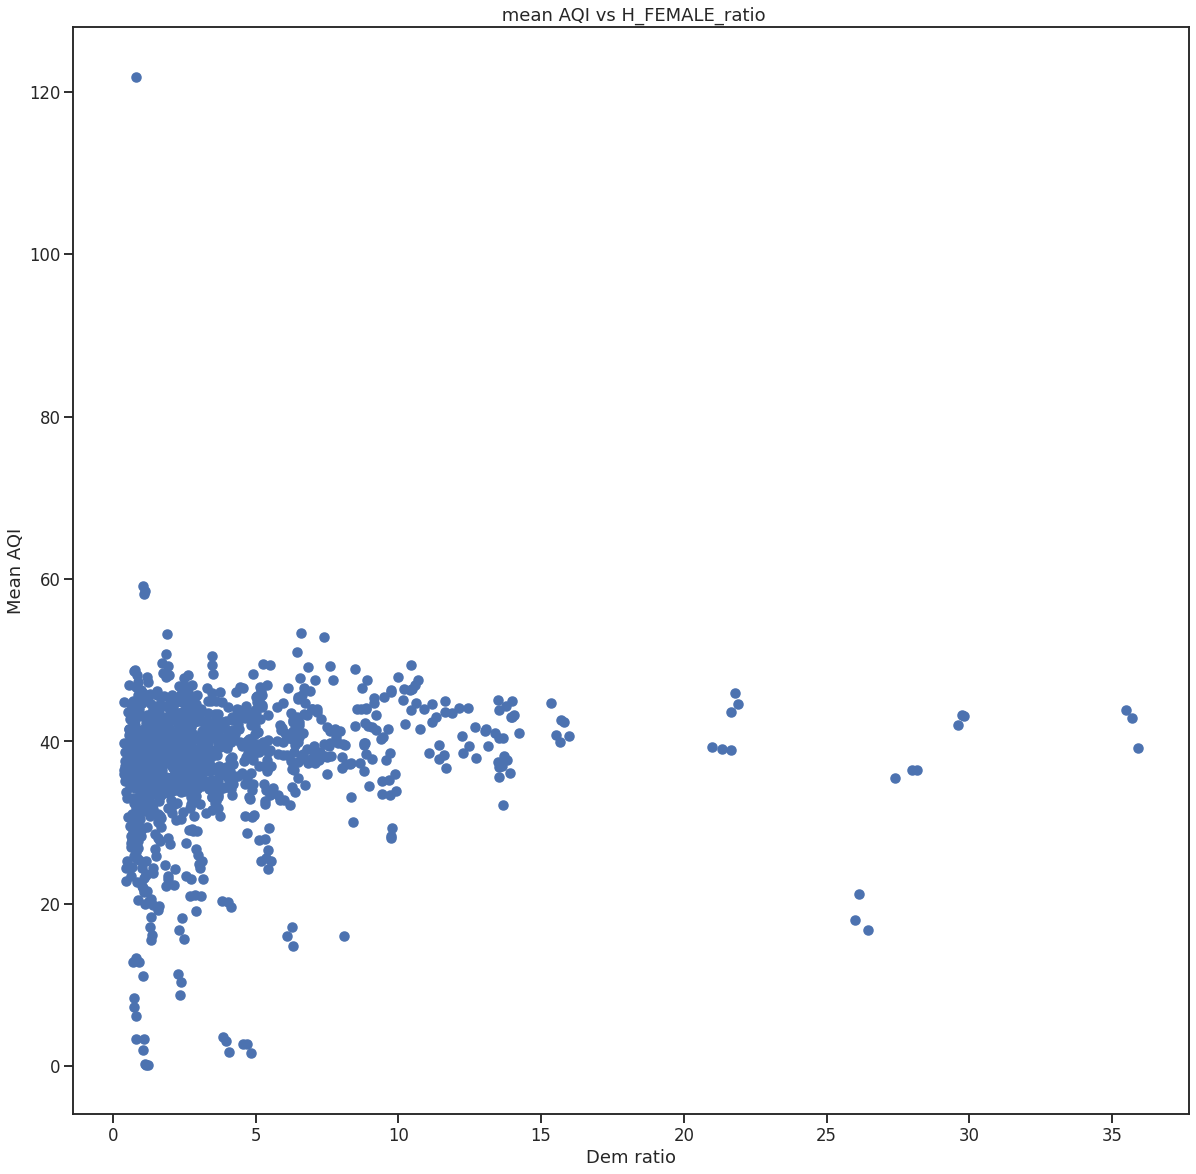

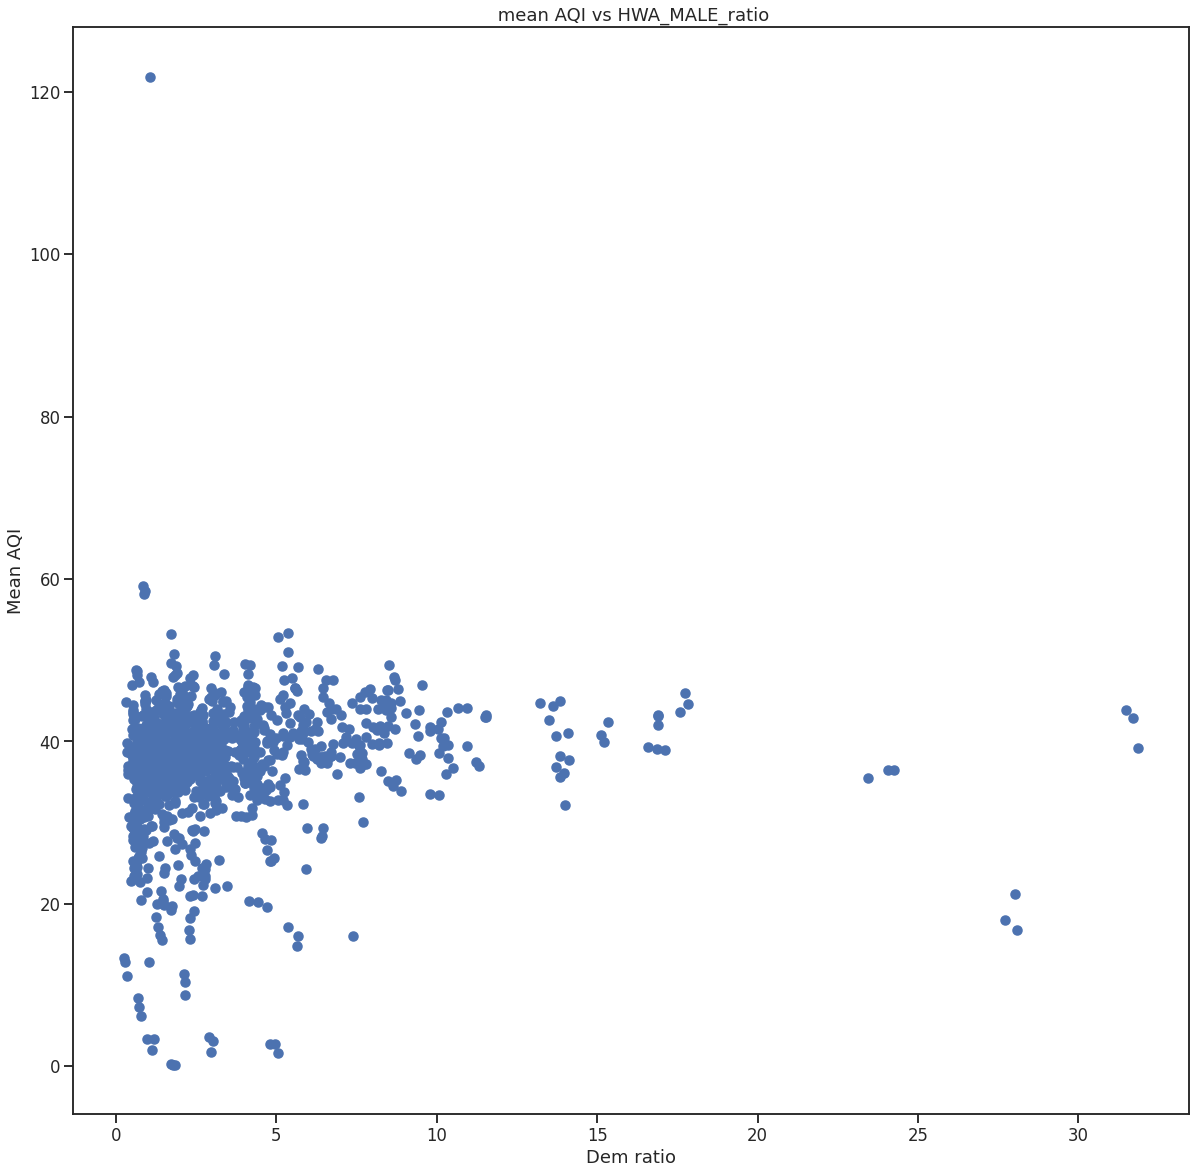

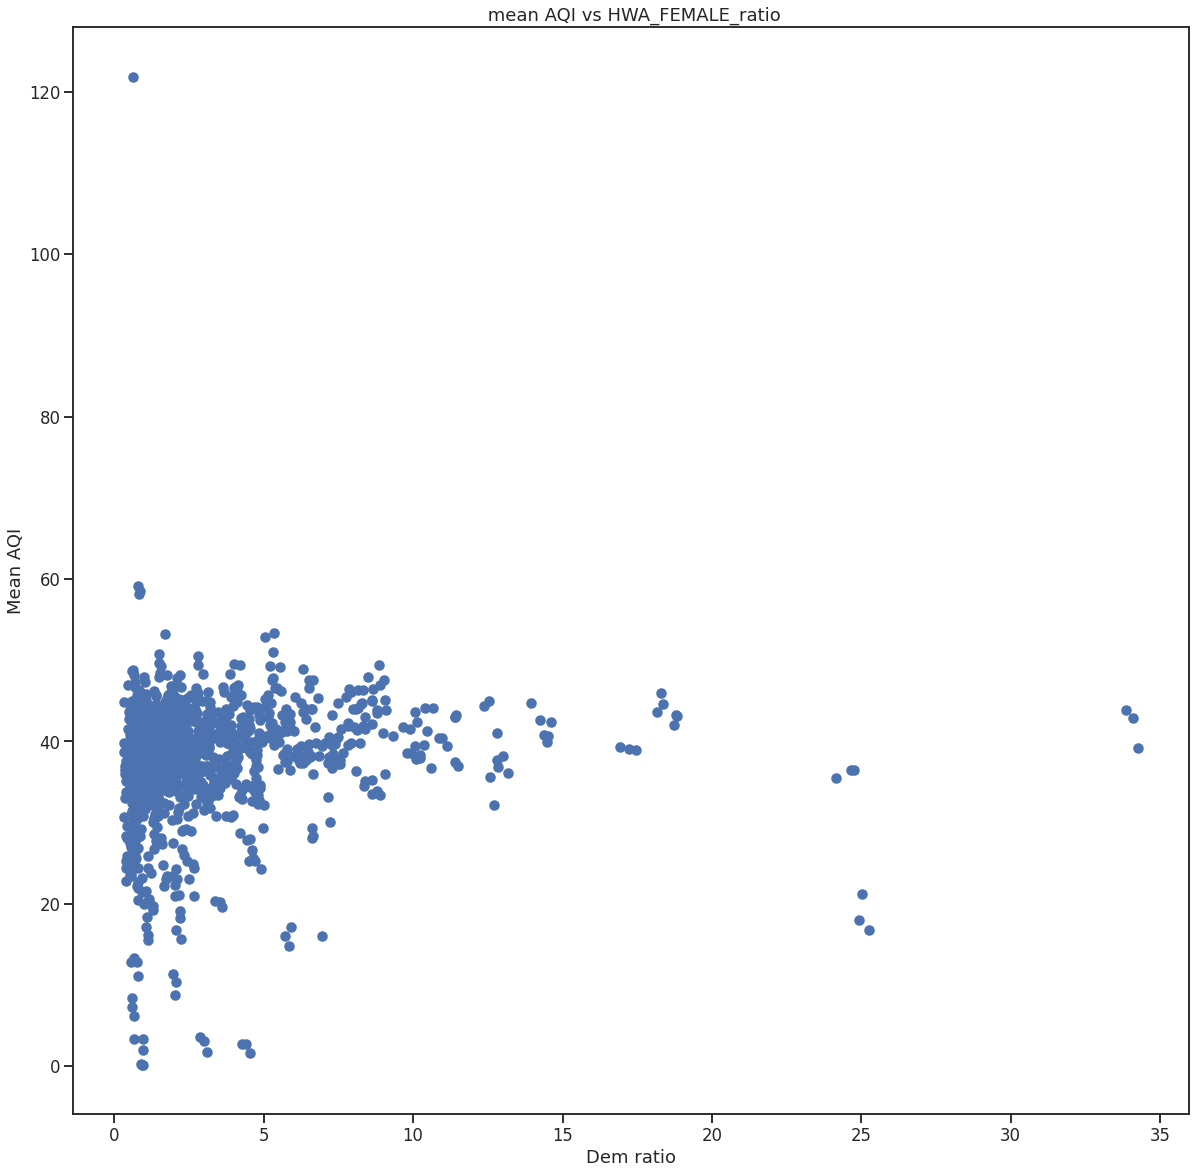

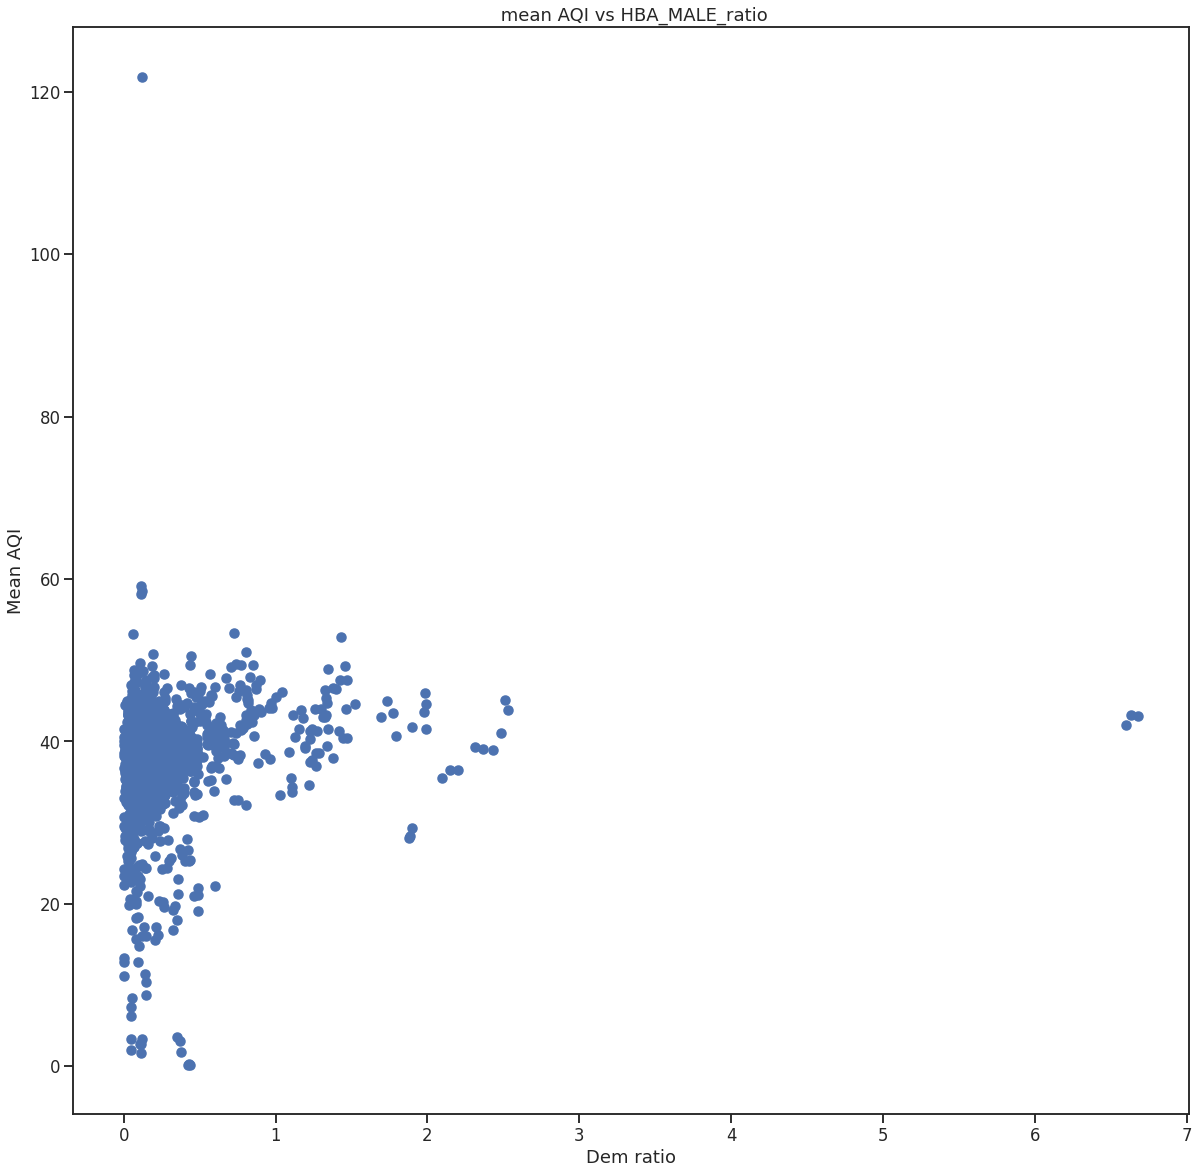

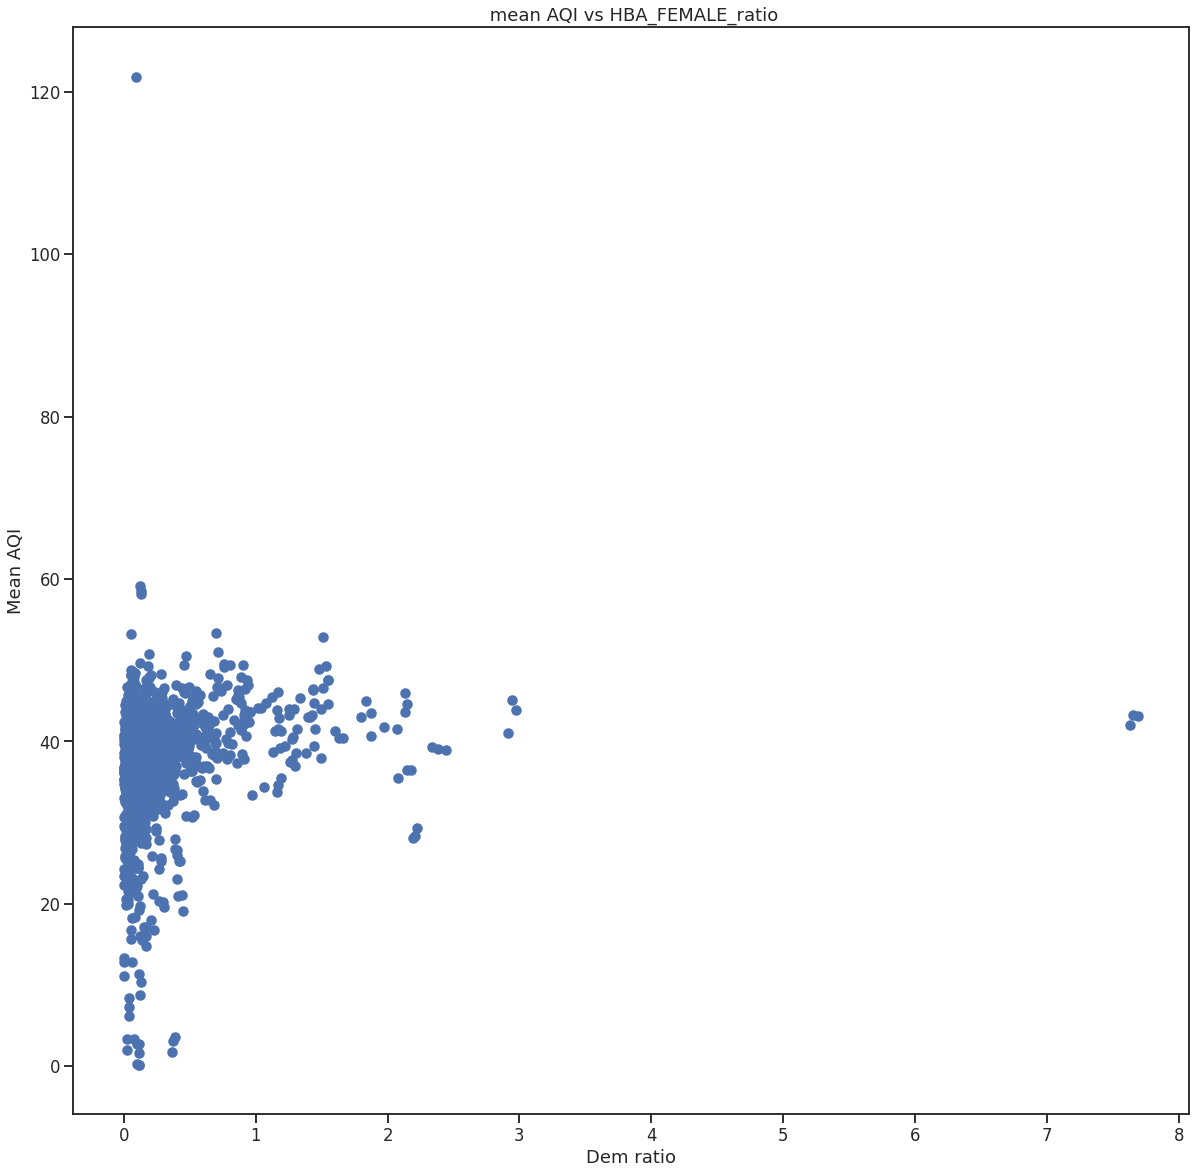

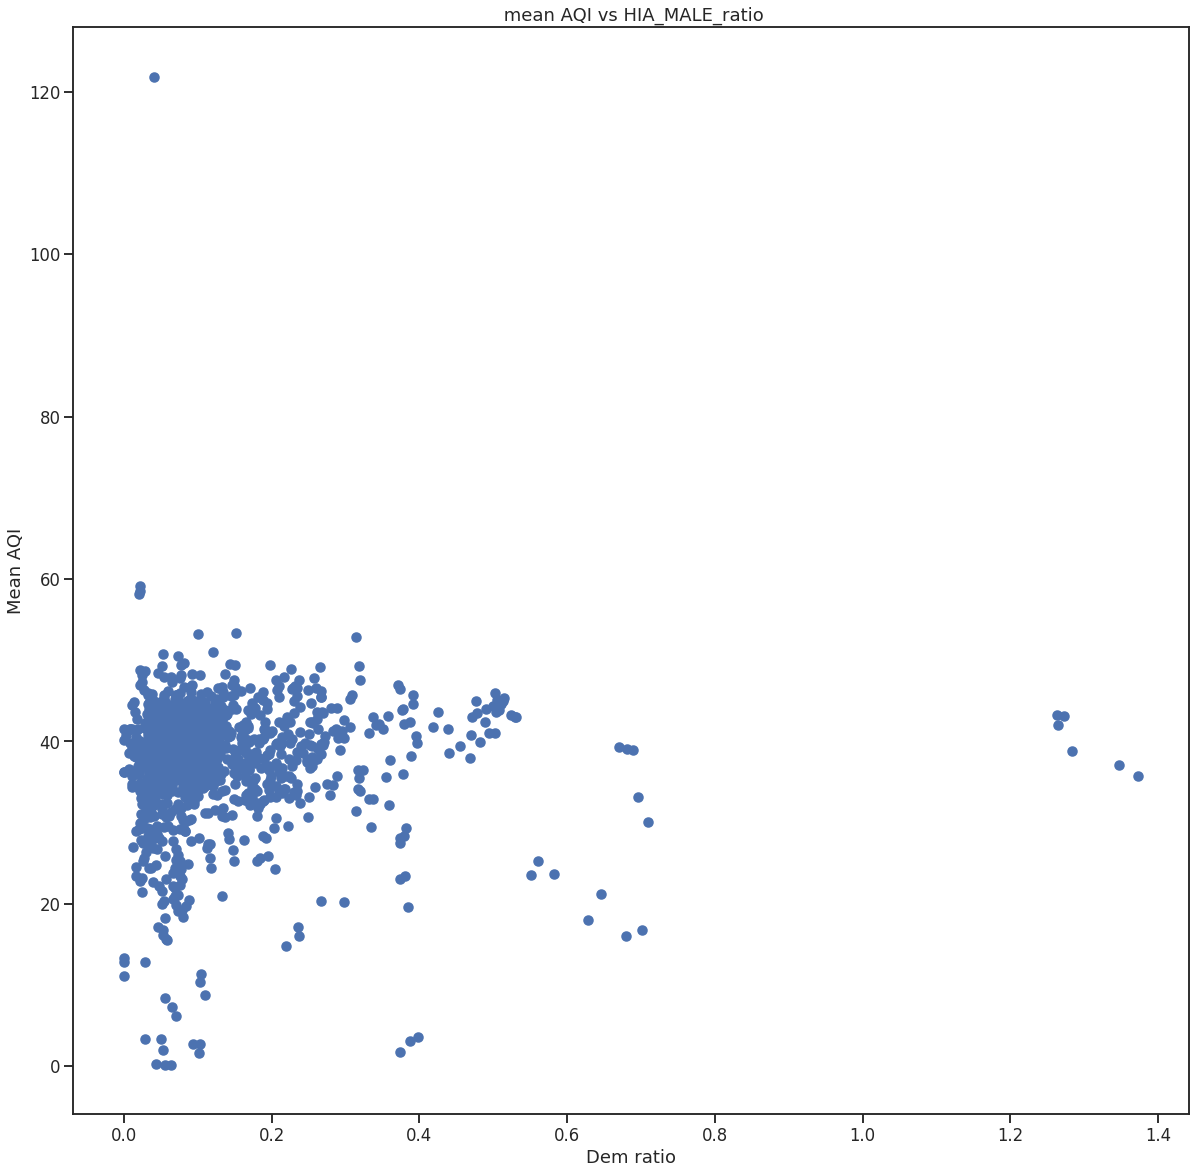

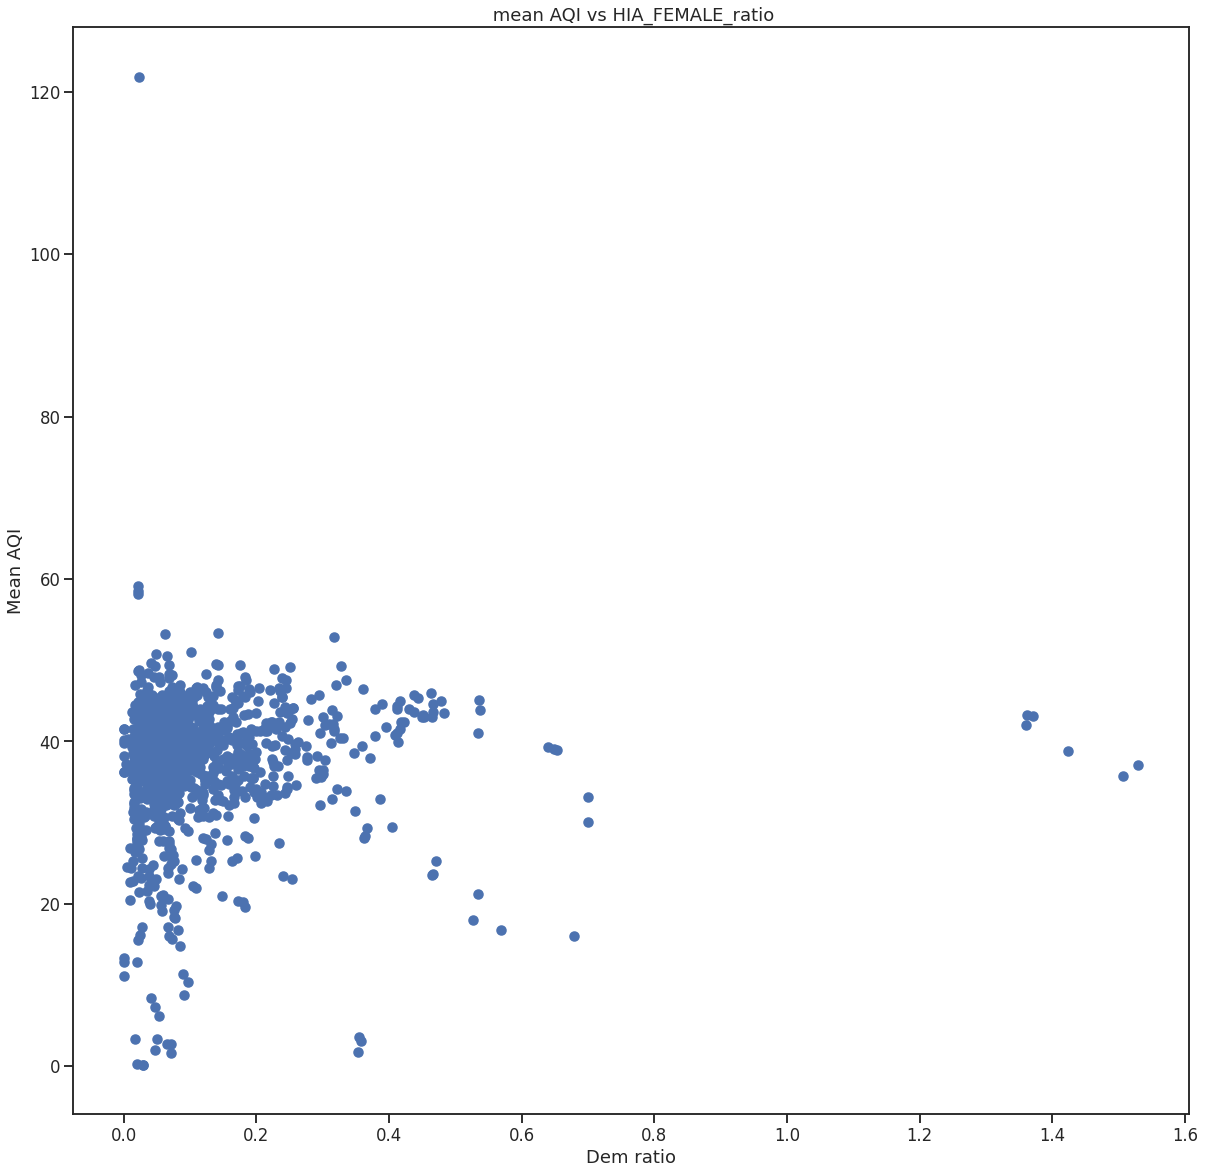

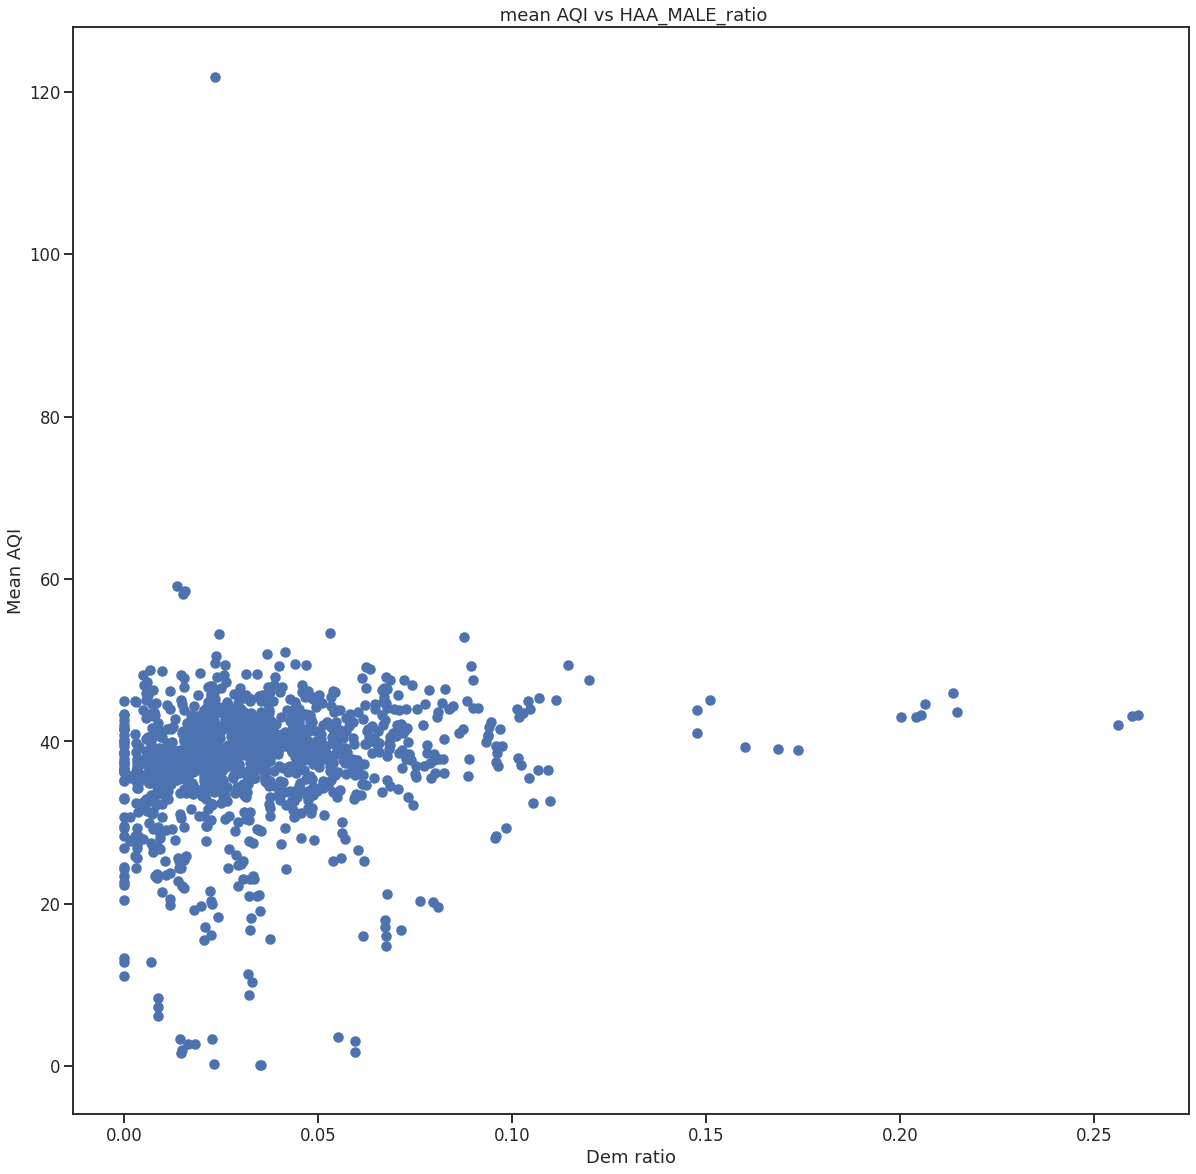

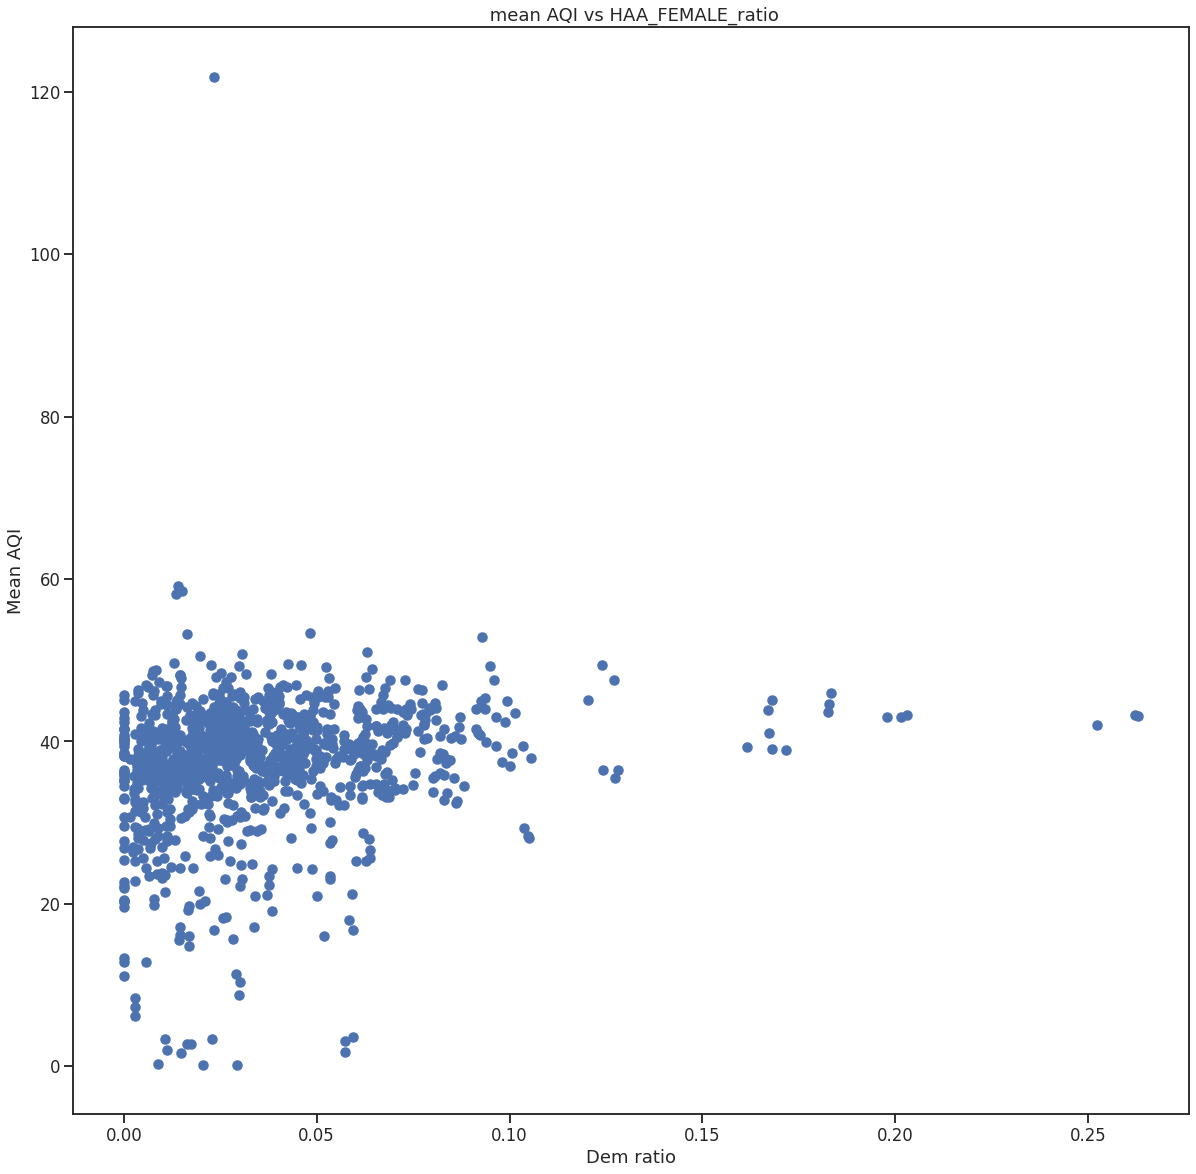

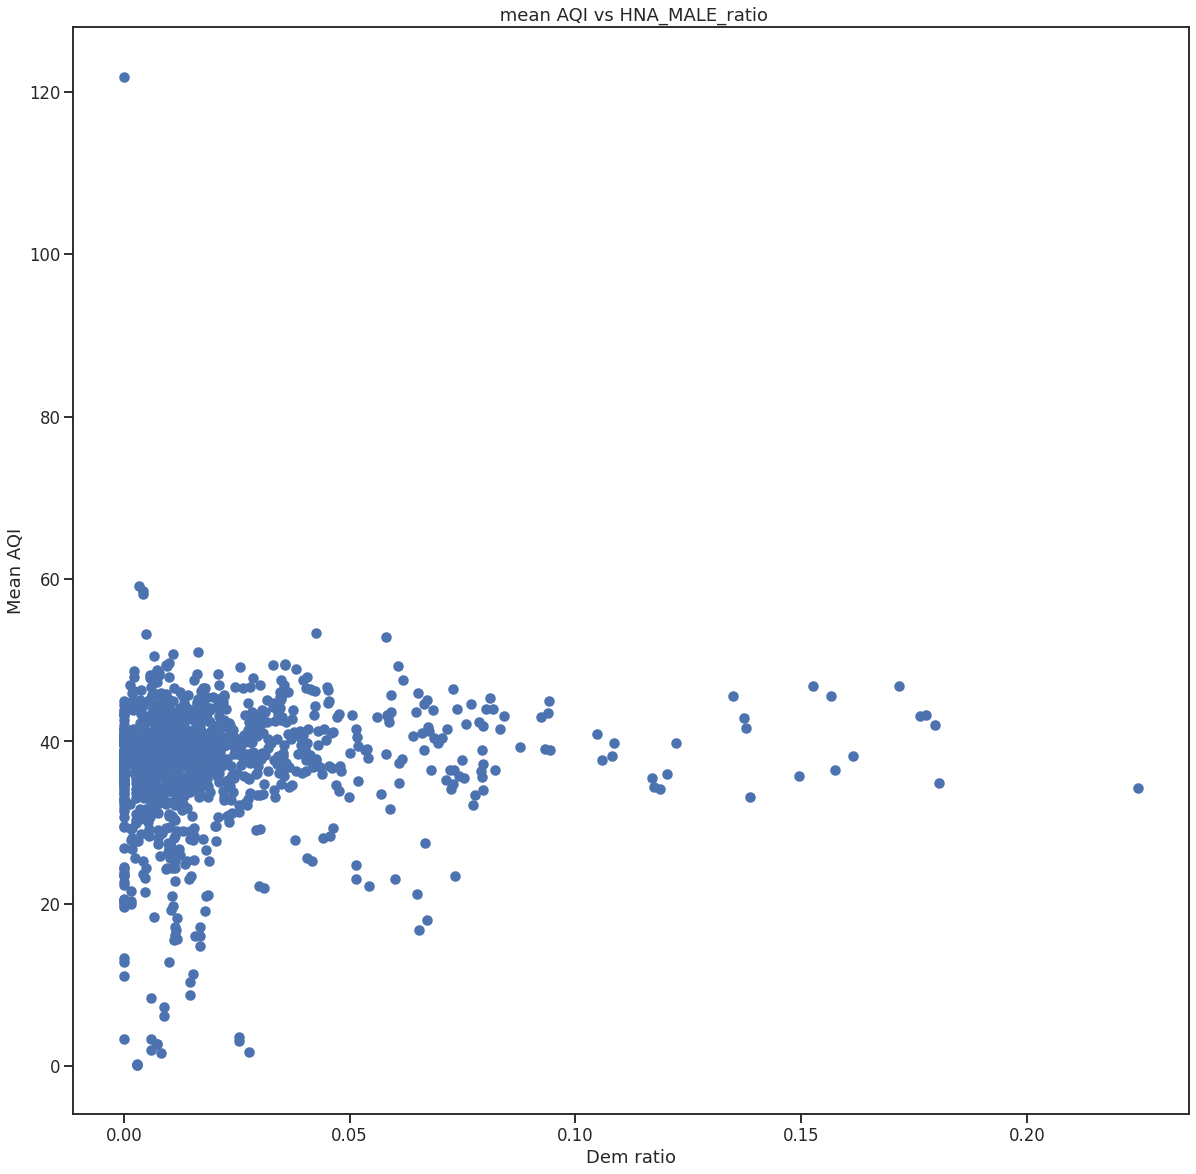

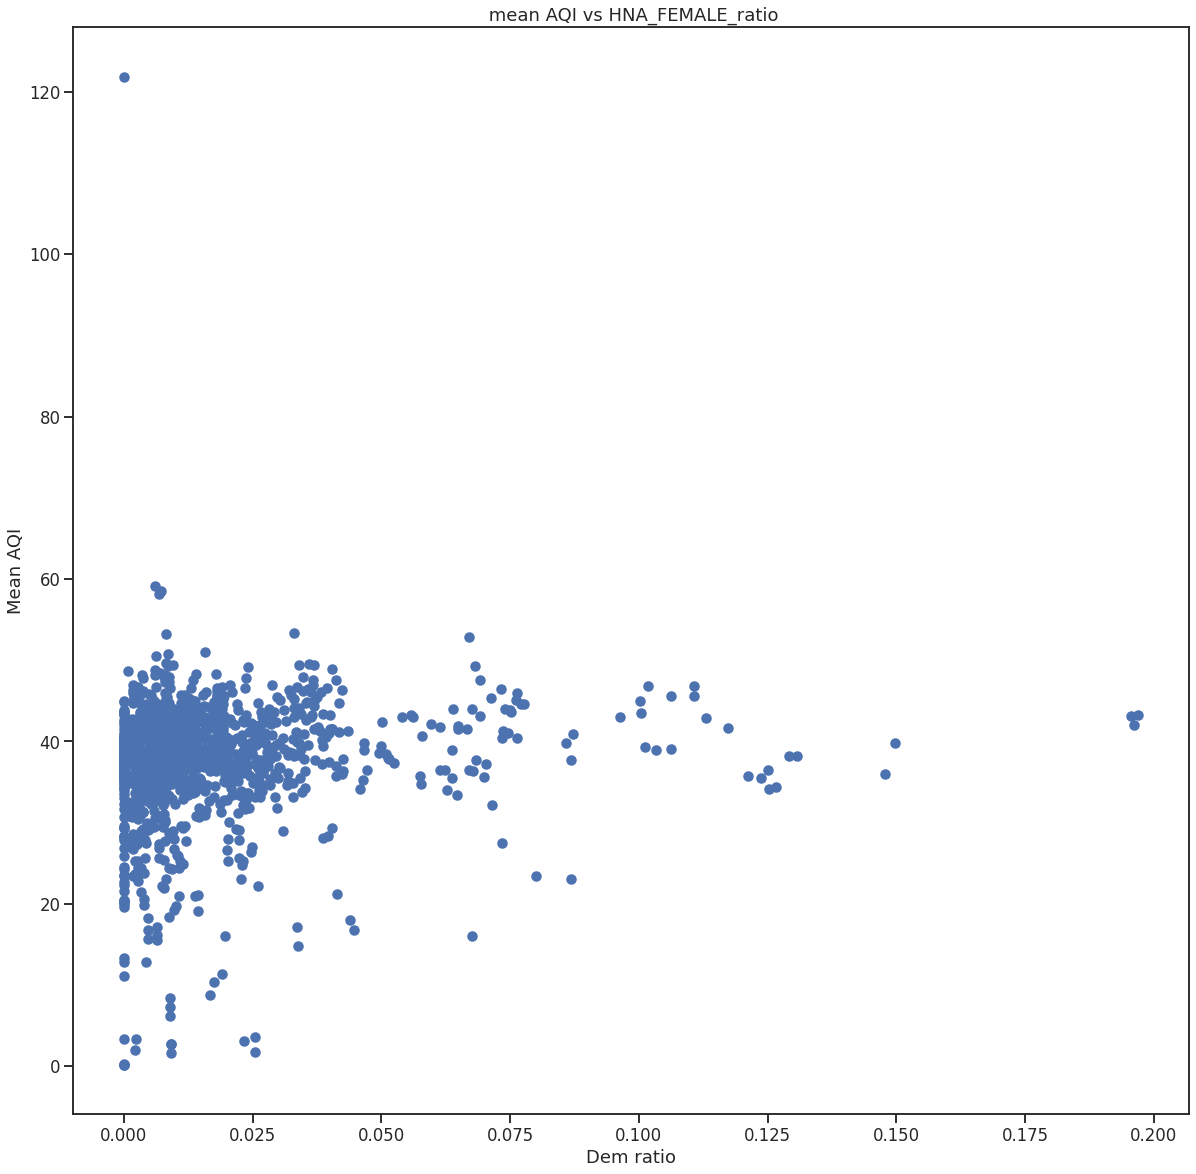

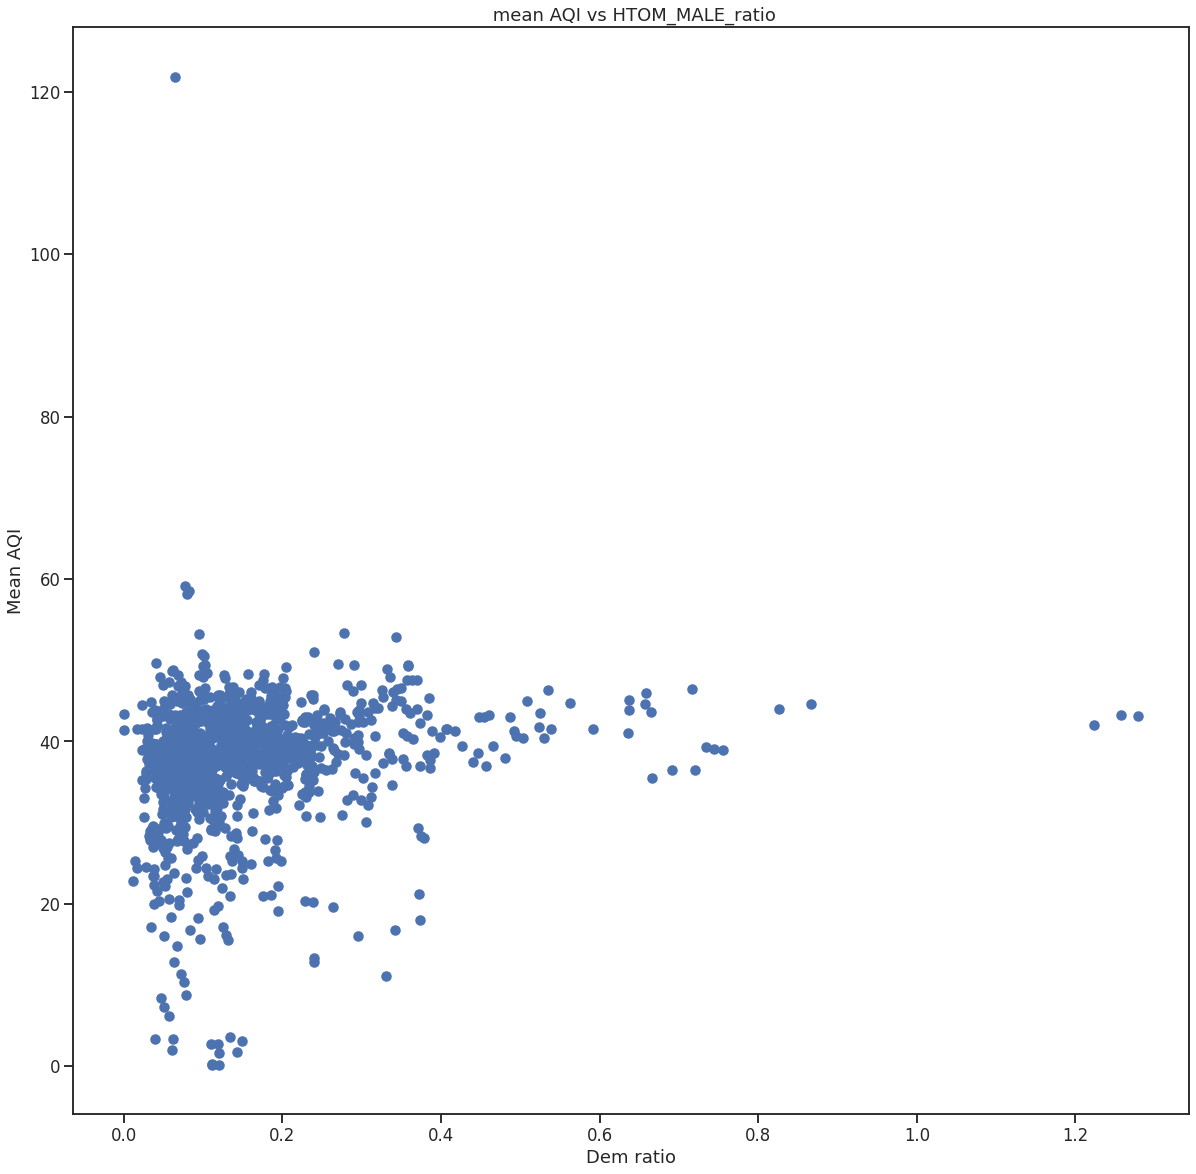

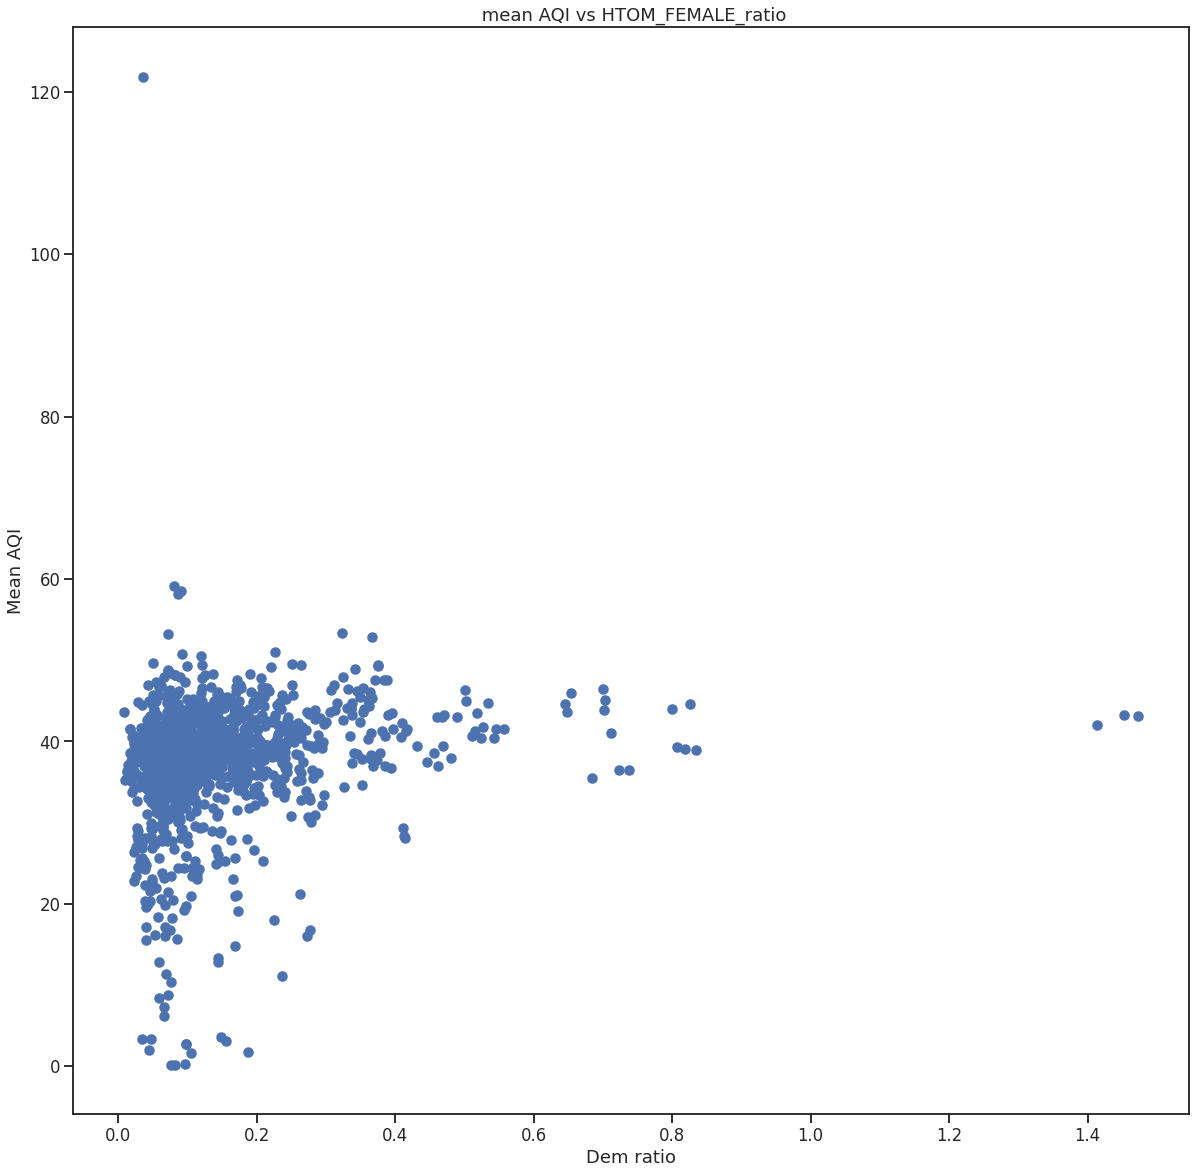

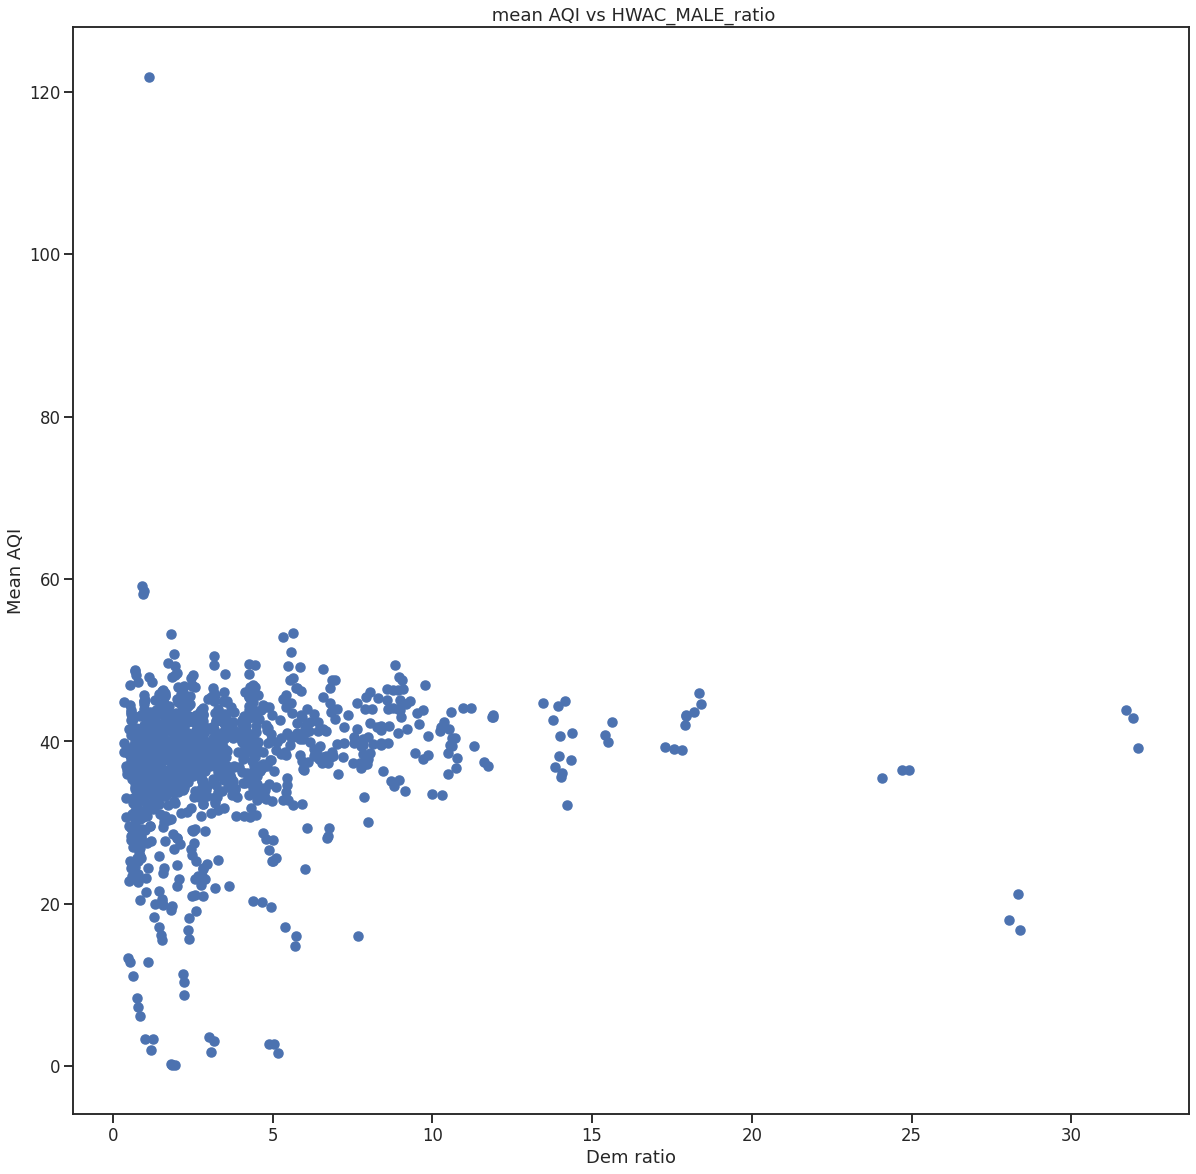

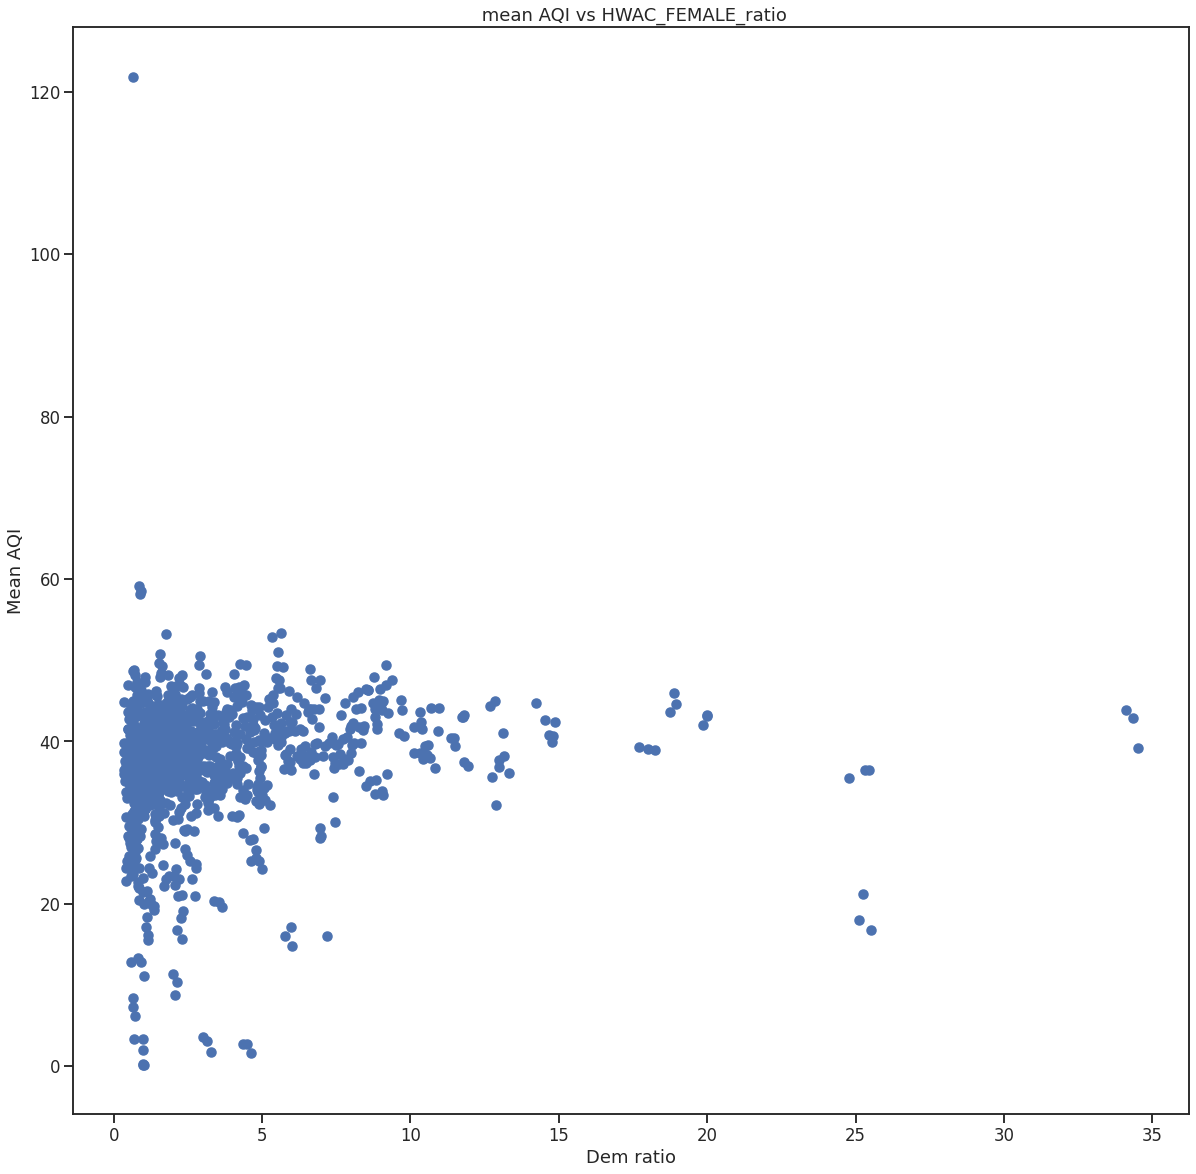

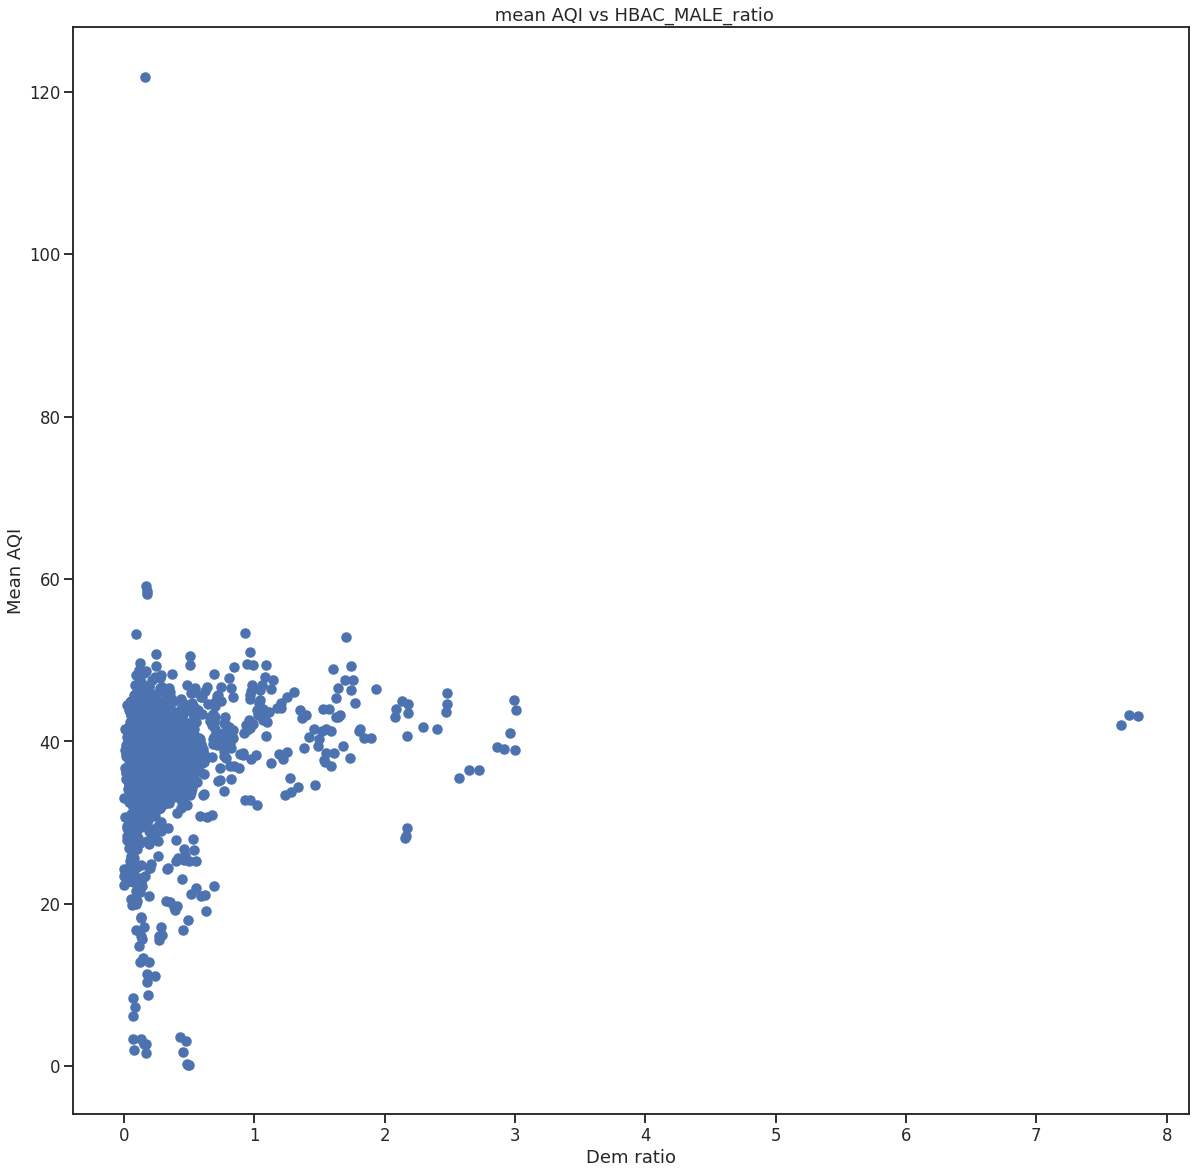

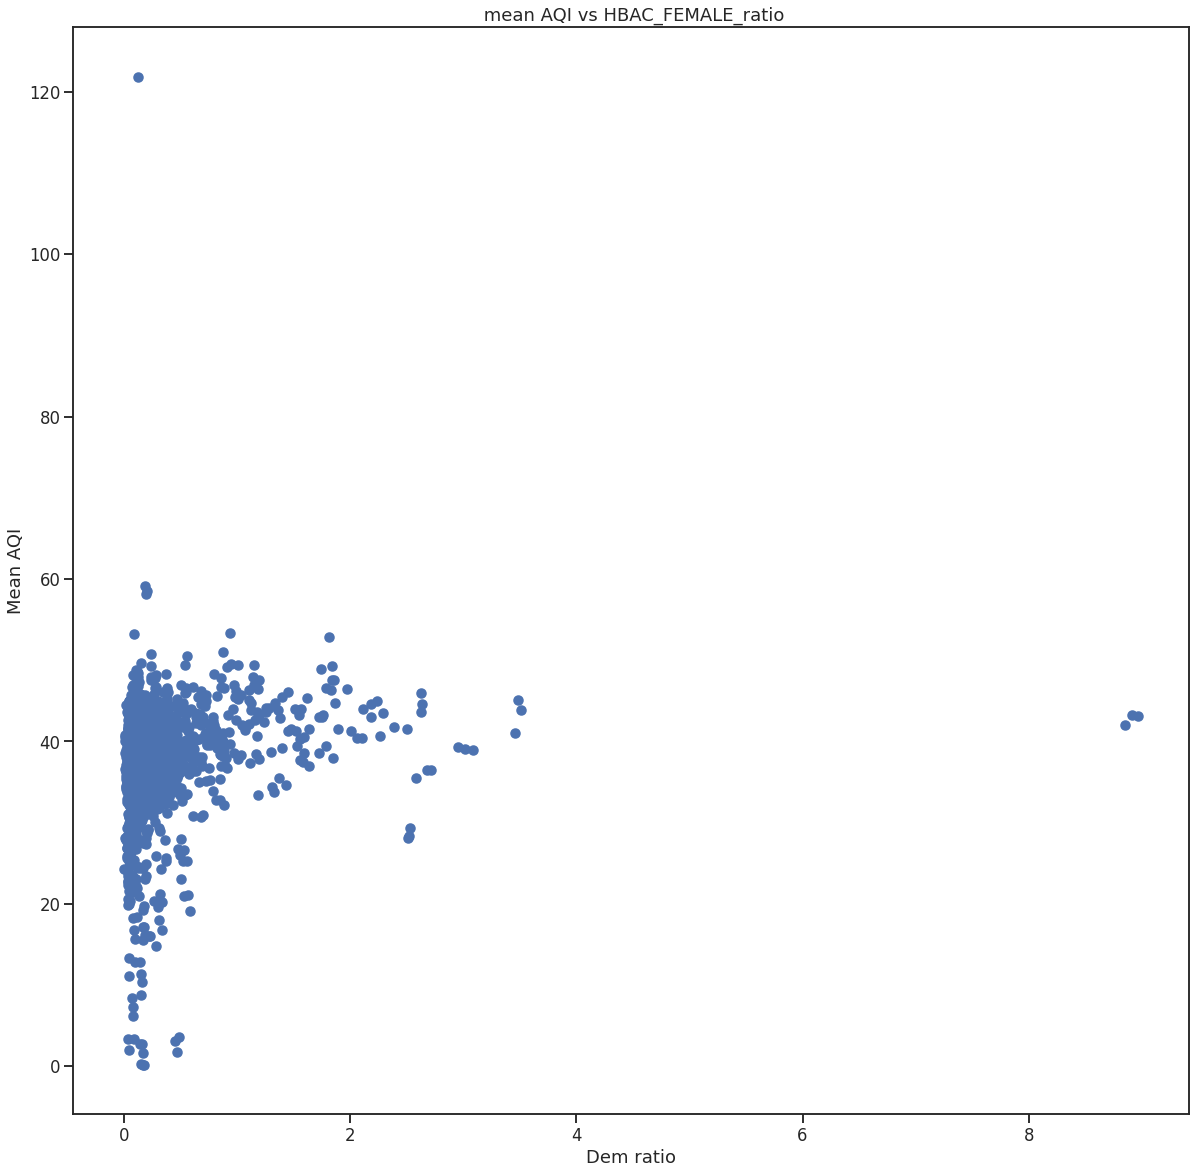

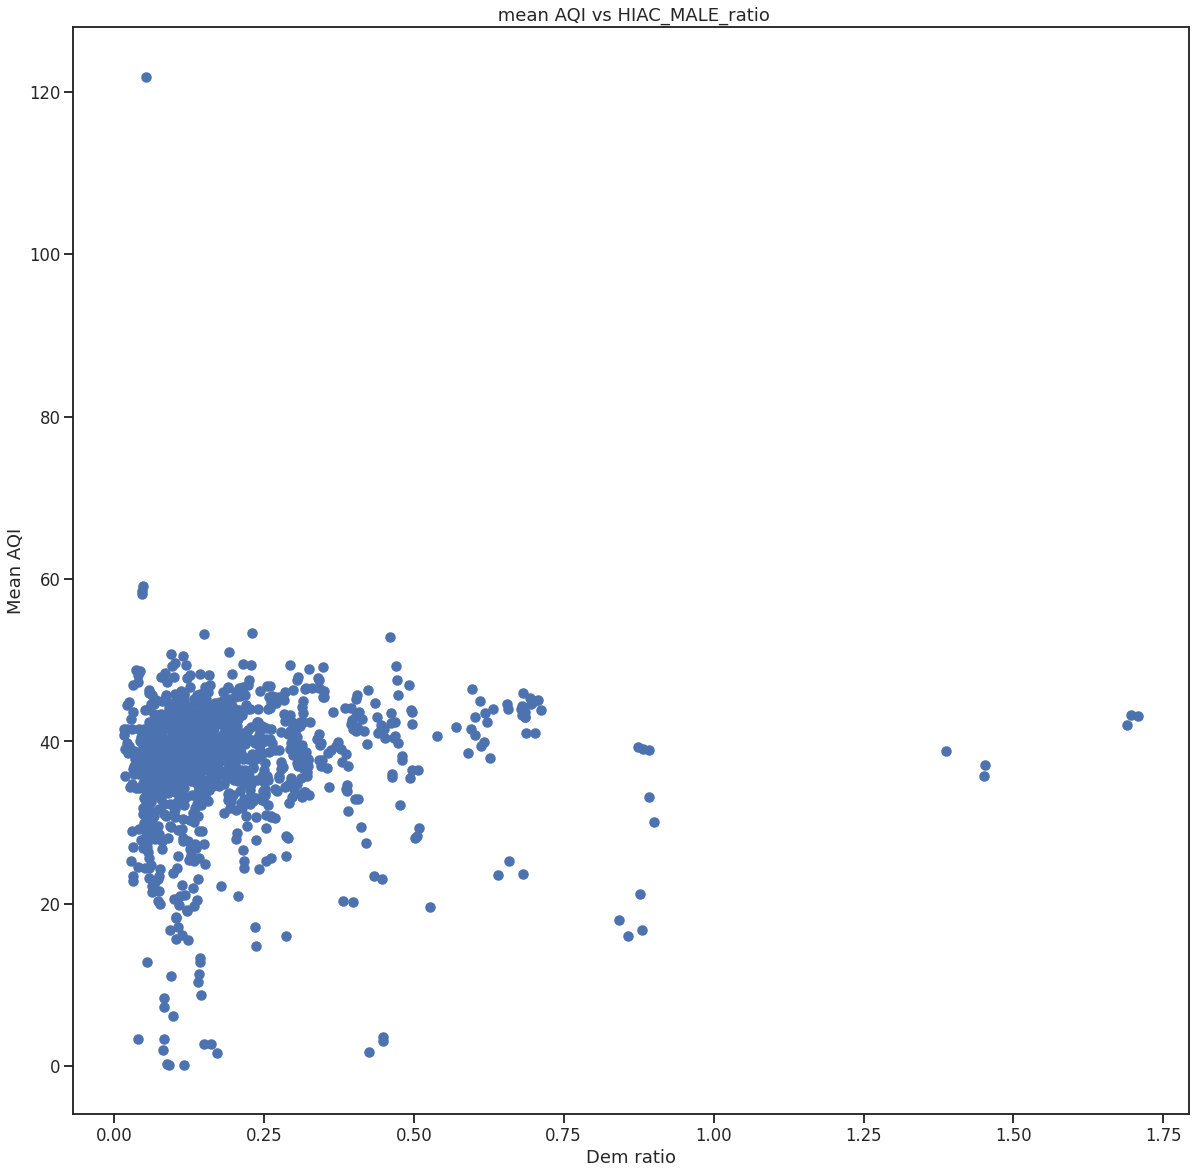

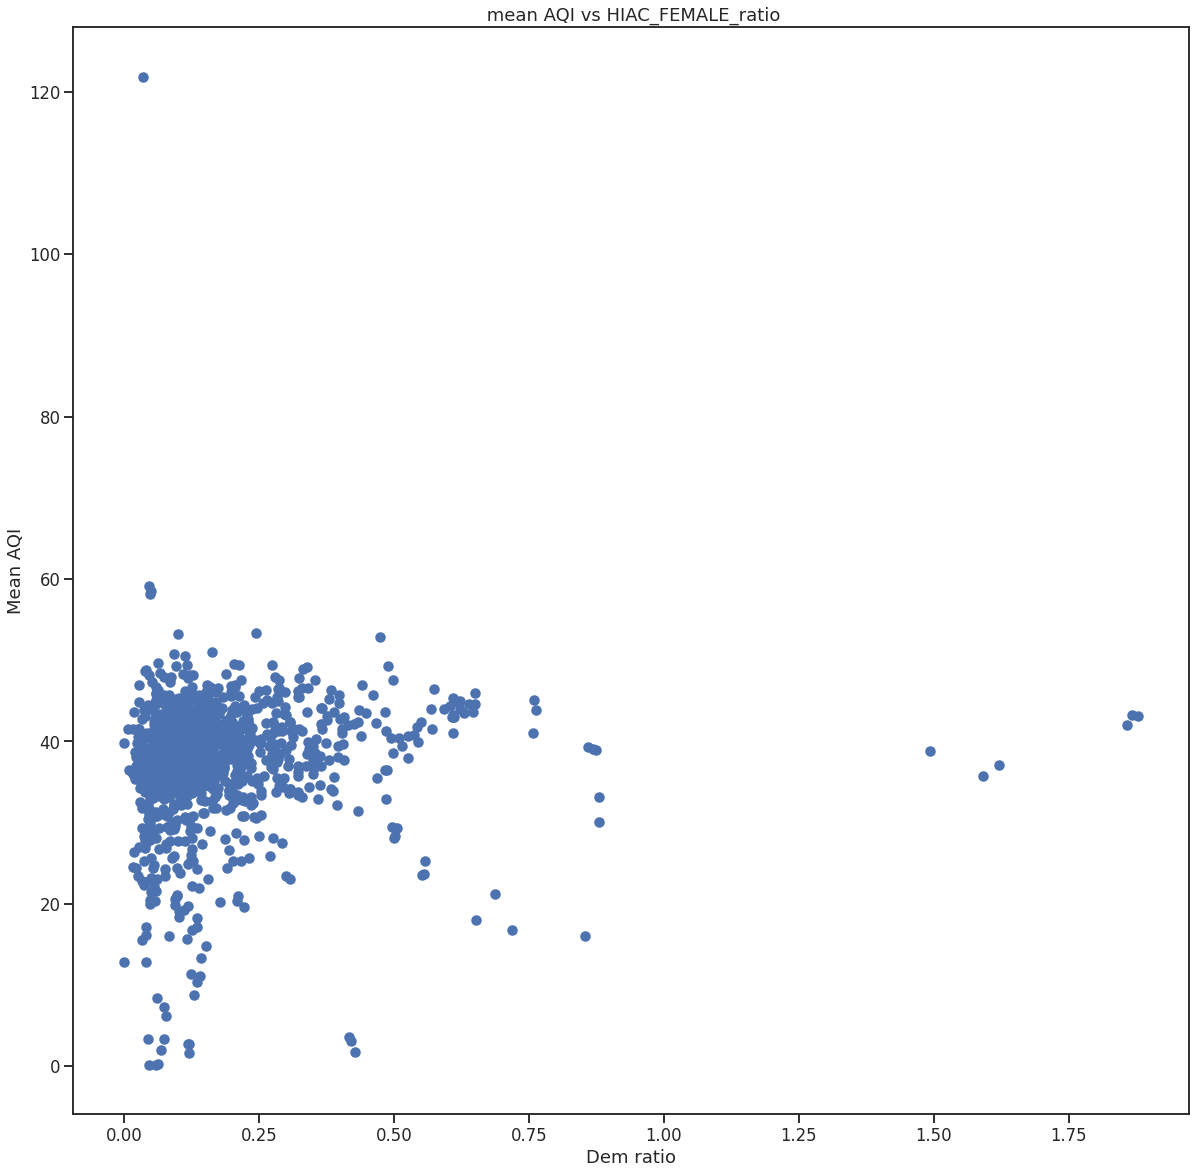

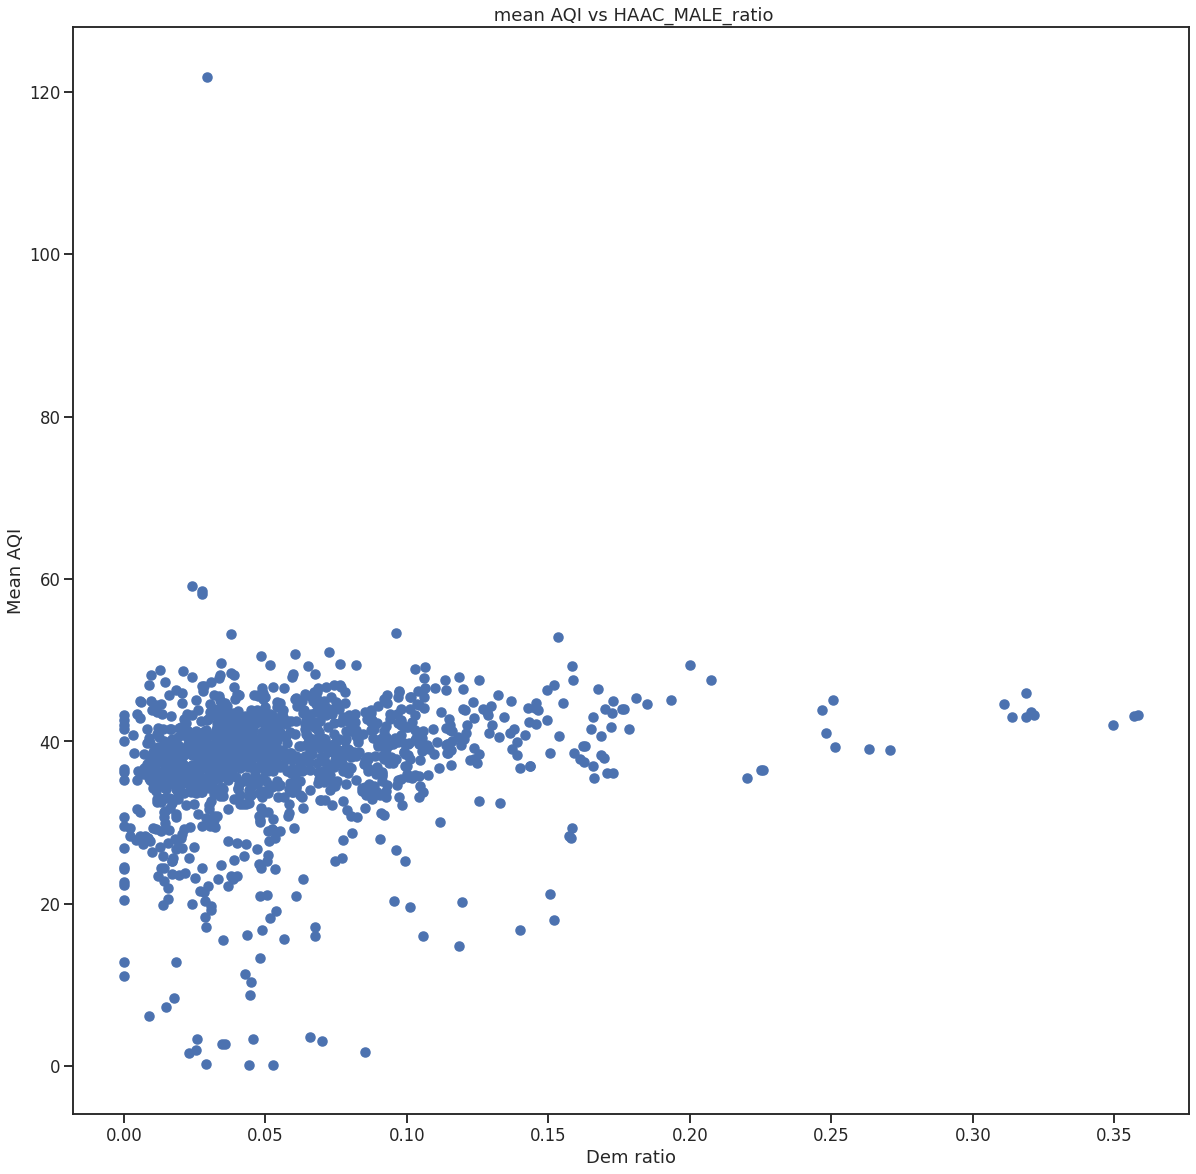

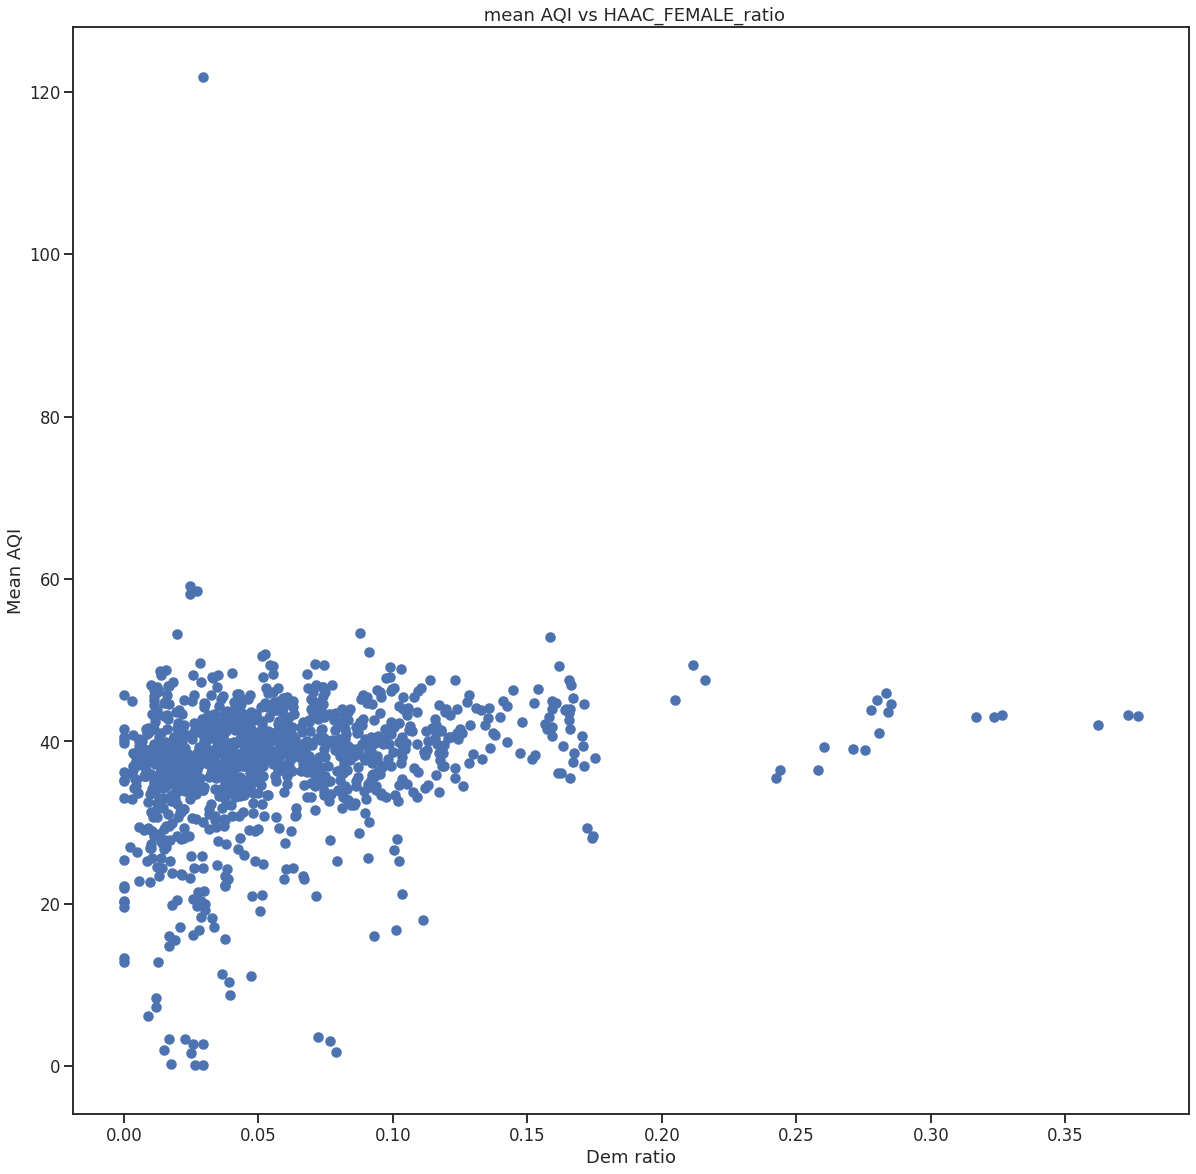

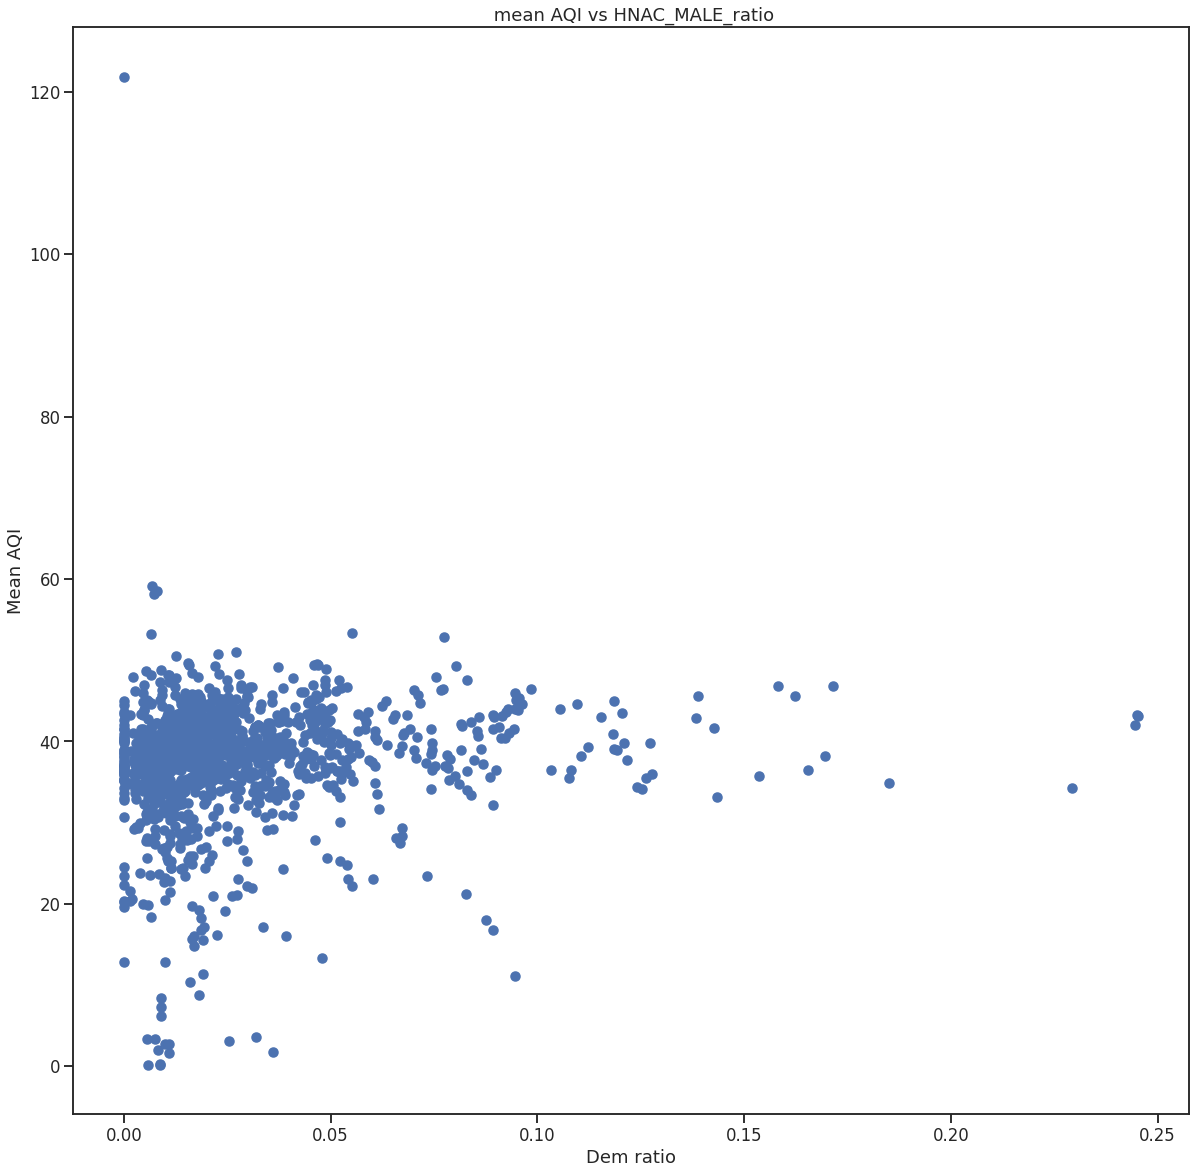

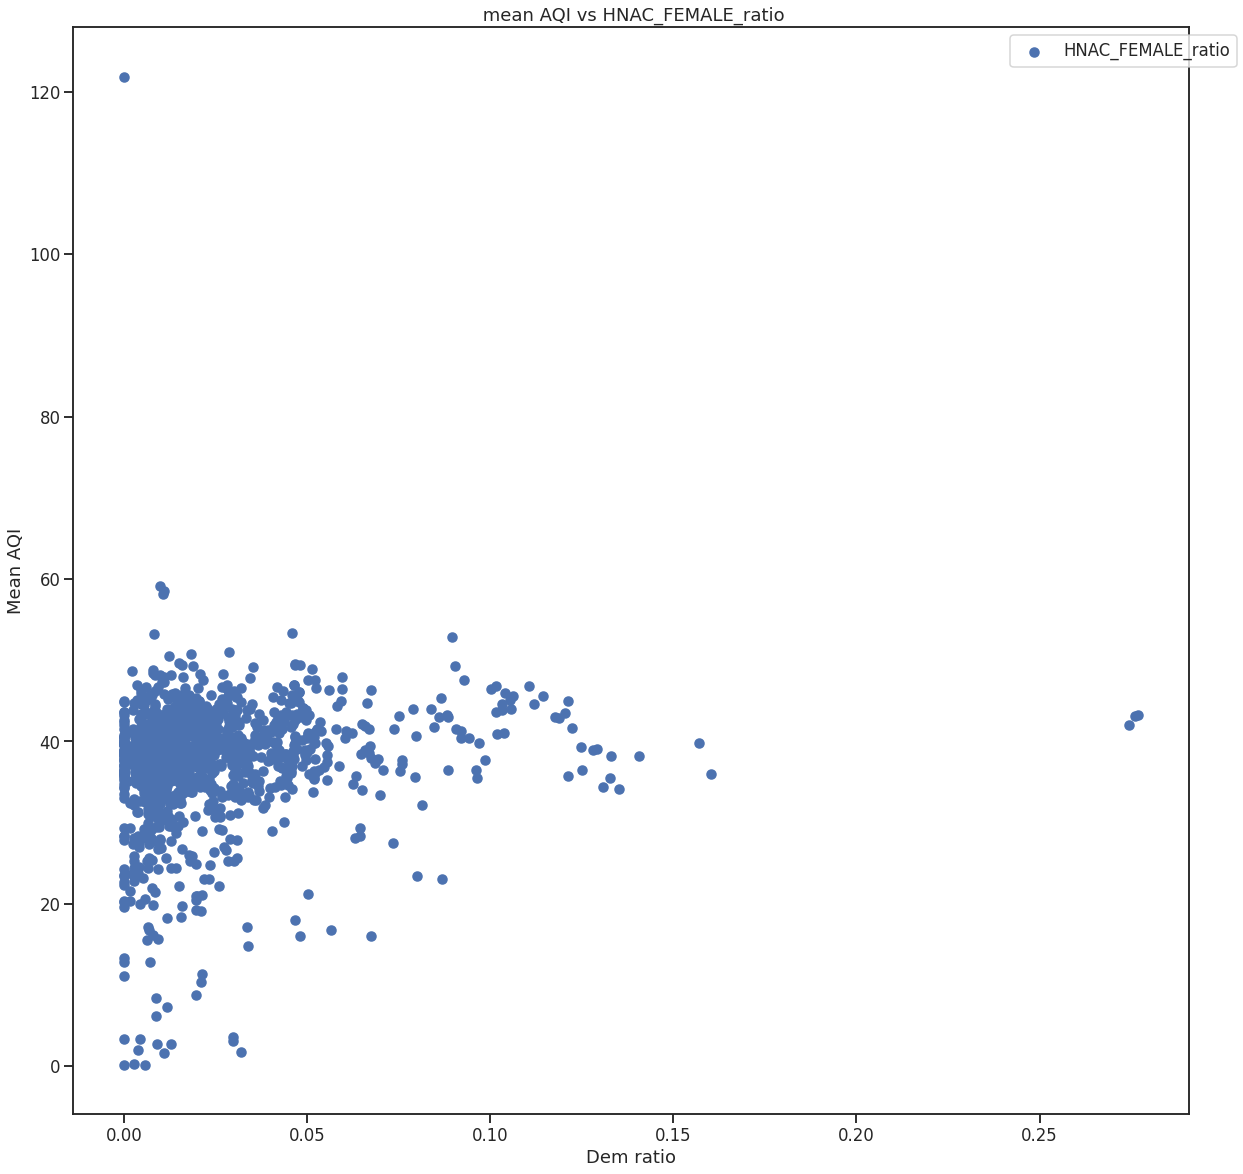

In [30]:
for dem in demographic:
    fig, ax = plt.subplots(figsize=(20,20))

    plt.title(' mean AQI vs ' + dem)
    plt.xlabel('Dem ratio')
    plt.ylabel('Mean AQI')
    ax.scatter(EAST_MID_WEST_avg_aqi_dem_2017_2019[dem], EAST_MID_WEST_avg_aqi_dem_2017_2019['AQI'], label=dem)

ax.legend(bbox_to_anchor=(1.05,1))
plt.show()

/home/wkc/.local/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

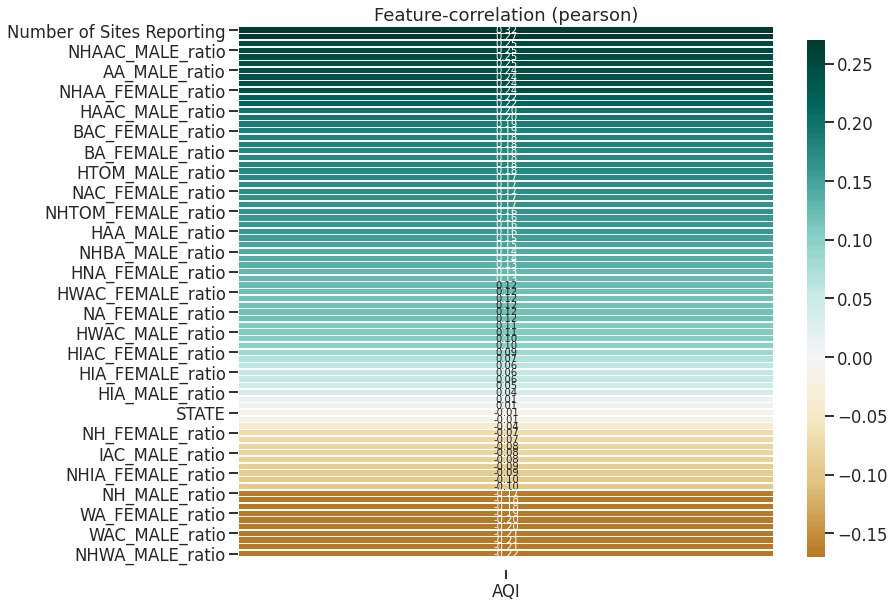

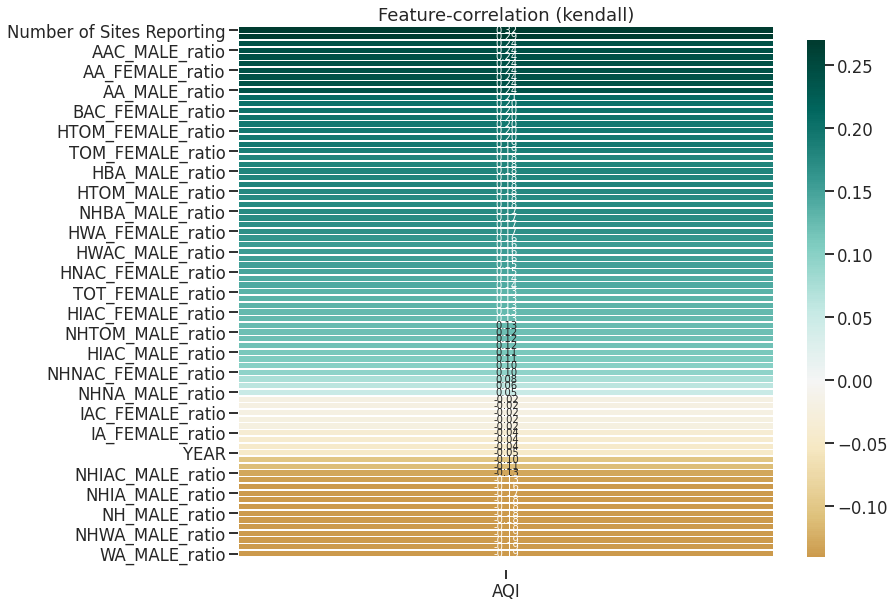

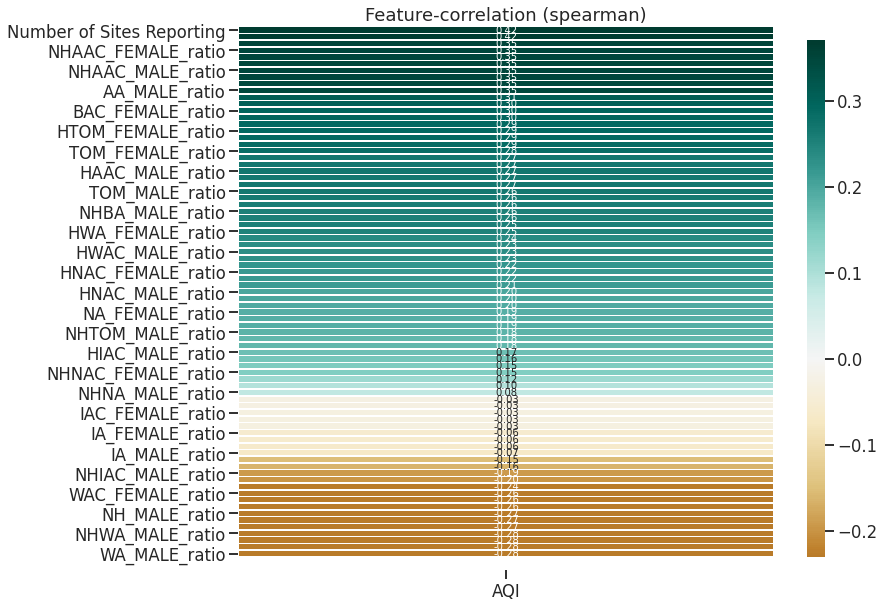

In [31]:
klib.corr_plot(EAST_MID_WEST_avg_aqi_dem_2017_2019, target='AQI', method='pearson')
klib.corr_plot(EAST_MID_WEST_avg_aqi_dem_2017_2019, target='AQI', method='kendall')
klib.corr_plot(EAST_MID_WEST_avg_aqi_dem_2017_2019, target='AQI', method='spearman')

In [32]:
EAST_MID_WEST_avg_aqi_dem_2017_2019.shape

(1185, 82)

# results

* From spearman it is shown that BAC females drops to .32 correlation to even weakers when more states are added
* although the white male negative correlation with spearman is consistent but it decreaes to -.28
* these strenghts are weak

* it seems that including more reocrd data from other years it has reduced r value of correclation for spearman
* 1185 records are used in this analysis

* debate about deciding to tackle a particular pollutant
* also debate to add more features to look at the target
* also need to look at more counties as when averaging aqis and grouping by counties we only get 389 records; even with 3 years added on

* maybe with demographic; a specific pollutant we want to be looking for